In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import json
import numpy as np
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D

{'MedImageInsight-Madeleine': [{'data': {'fold_results': [{'fold': 0, 'num_train_samples': 219, 'num_test_samples': 41, 'best_metrics': {'val_cindex': 0.6414012738853503, 'val_loss': 0.6032830774784088}}, {'fold': 1, 'num_train_samples': 201, 'num_test_samples': 59, 'best_metrics': {'val_cindex': 0.739480198019802, 'val_loss': 0.4995172619819641}}, {'fold': 2, 'num_train_samples': 207, 'num_test_samples': 53, 'best_metrics': {'val_cindex': 0.6769406392694064, 'val_loss': 0.48825331032276154}}, {'fold': 3, 'num_train_samples': 210, 'num_test_samples': 50, 'best_metrics': {'val_cindex': 0.7116538131962297, 'val_loss': 0.34601882100105286}}, {'fold': 4, 'num_train_samples': 203, 'num_test_samples': 57, 'best_metrics': {'val_cindex': 0.5506912442396313, 'val_loss': 0.5792778804898262}}], 'mean_metrics': {'val_cindex': 0.6640334337220839, 'val_loss': 0.5032700702548027}, 'std_metrics': {'val_cindex': 0.06555177696271787, 'val_loss': 0.09027439379058343}}, 'condition': 'FullPathoBench_Missin

IndexError: list index out of range

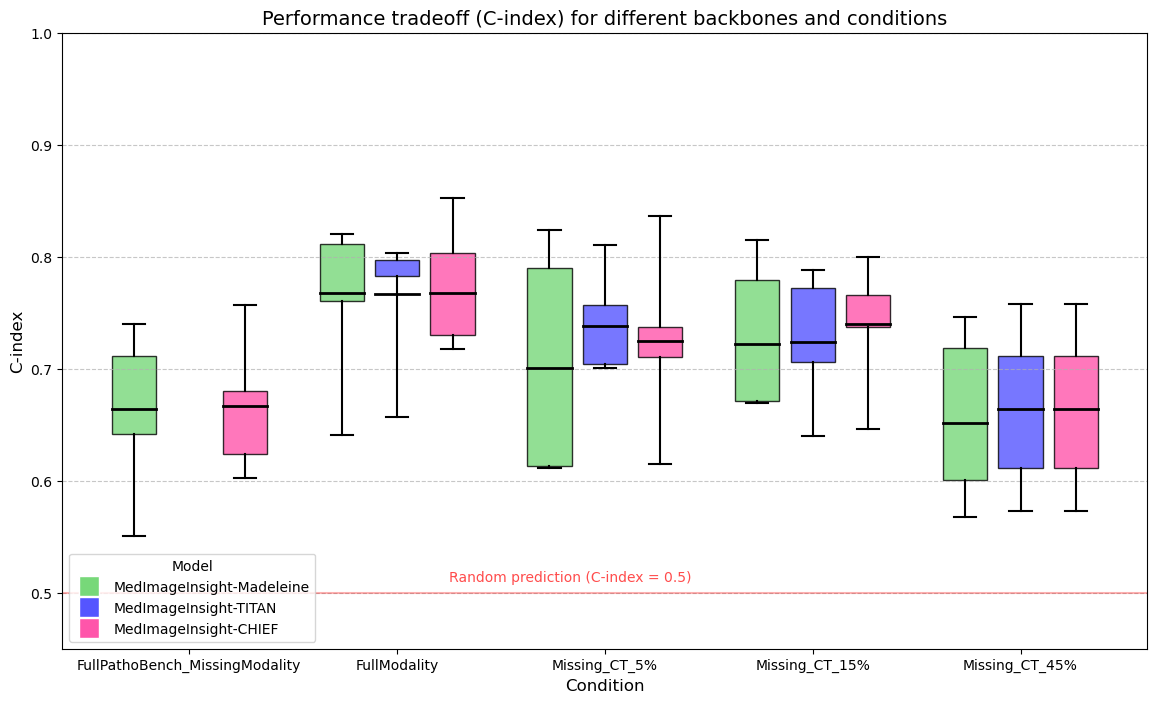

<Figure size 1000x600 with 0 Axes>

In [25]:
# Funzione per processare un singolo file di risultati
def process_result_file(file_content, model_name, condition):
    data = json.loads(file_content) if isinstance(file_content, str) else file_content
    
    # Estrai i valori di C-index da ogni fold
    cindex_values = [fold['best_metrics']['val_cindex'] for fold in data['fold_results']]
    
    # Estrai media e deviazione standard
    mean_cindex = data['mean_metrics']['val_cindex']
    std_cindex = data['std_metrics']['val_cindex']
    
    # Calcola min, max, quartili
    min_val = min(cindex_values)
    max_val = max(cindex_values)
    q1 = np.percentile(cindex_values, 25)
    q3 = np.percentile(cindex_values, 75)
    
    return {
        'Model': model_name,
        'Condition': condition,
        'Mean': mean_cindex,
        'Std': std_cindex,
        'Min': min_val,
        'Max': max_val,
        'Q1': q1,
        'Q3': q3,
        'Values': cindex_values
    }

# Esempio di utilizzo con i dati forniti
# example_data = {
#     "fold_results": [
#         {"fold": 0, "num_train_samples": 74, "num_test_samples": 13, 
#          "best_metrics": {"val_cindex": 0.8243243243243243, "val_loss": 0.10687098652124405}},
#         {"fold": 1, "num_train_samples": 69, "num_test_samples": 18, 
#          "best_metrics": {"val_cindex": 0.8098591549295775, "val_loss": 0.128830224275589}},
#         {"fold": 2, "num_train_samples": 63, "num_test_samples": 24, 
#          "best_metrics": {"val_cindex": 0.812, "val_loss": 0.3680495023727417}},
#         {"fold": 3, "num_train_samples": 66, "num_test_samples": 21, 
#          "best_metrics": {"val_cindex": 0.6461538461538462, "val_loss": 0.04332169145345688}},
#         {"fold": 4, "num_train_samples": 76, "num_test_samples": 11, 
#          "best_metrics": {"val_cindex": 0.6521739130434783, "val_loss": 0.0}}
#     ],
#     "mean_metrics": {"val_cindex": 0.7489022476902452, "val_loss": 0.12941448092460633},
#     "std_metrics": {"val_cindex": 0.08160780020604239, "val_loss": 0.127761731538992}
# }

# Inizializza una lista per raccogliere tutti i risultati
all_results = []

models = {
    "MedImageInsight-Madeleine":[
        {"data": json.load(open("./models/ckpts/CPTACPDA_madeleine_medimsights_fullpathobench/cv_results.json")), "condition": "FullPathoBench_MissingModality"},
        {"data": json.load(open("./models/ckpts/CPTACPDA_madeleine_medimsights_ctpathobench/cv_results.json")), "condition": "FullModality"},
        {"data": json.load(open("./models/ckpts/CPTACPDA_madeleine_medimsights_ctmissing_nvals05/cv_results.json")), "condition": "Missing_CT_5%"},
        {"data": json.load(open("./models/ckpts/CPTACPDA_madeleine_medimsights_ctmissing_nvals15/cv_results.json")), "condition": "Missing_CT_15%"},
        {"data": json.load(open("./models/ckpts/CPTACPDA_madeleine_medimsights_ctmissing_nvals45/cv_results.json")), "condition": "Missing_CT_45%"},
    ],
     "MedImageInsight-TITAN":[
         #{"data": json.load(open("./models/ckpts/")),"condition":"FullPathoBench_MissingModality"},
         {"data": json.load(open("./models/ckpts/CPTACPDA_Titan_MedIMSights_ctonly/cv_results.json")), "condition": "FullModality"},
         {"data": json.load(open("./models/ckpts/CPTACPDA_titan_medimsights_ctmissing_nvals05/cv_results.json")), "condition": "Missing_CT_5%"},
         {"data": json.load(open("./models/ckpts/CPTACPDA_titan_medimsights_ctmissing_nvals15/cv_results.json")), "condition": "Missing_CT_15%"},
         {"data": json.load(open("./models/ckpts/CPTACPDA_titan_medimsights_ctmissing_nvals45/cv_results.json")), "condition": "Missing_CT_45%"},
     ],
     "MedImageInsight-CHIEF":[
         {"data": json.load(open("./models/ckpts/CPTACPDA_chief_medimsights_FullPathobench_New/cv_results.json")), "condition": "FullPathoBench_MissingModality"},
         {"data": json.load(open("./models/ckpts/CPTACPDA_chief_medimsights_CTOnly/cv_results.json")), "condition": "FullModality"},
         {"data": json.load(open("./models/ckpts/CPTACPDA_chief_medimsights_ctmissing_nvals05/cv_results.json")), "condition": "Missing_CT_5%"},
         {"data": json.load(open("./models/ckpts/CPTACPDA_chief_medimsights_ctmissing_nvals15/cv_results.json")), "condition": "Missing_CT_15%"},
         {"data": json.load(open("./models/ckpts/CPTACPDA_chief_medimsights_ctmissing_nvals45/cv_results.json")), "condition": "Missing_CT_45%"},
     ],
}



# Simula più modelli per l'esempio
# In un caso reale, itereresti sui tuoi file di risultati
# models = {
#     "MedImageInsight_Madeleine": [
#         {"data": example_data, "condition": "FullModality"},
#         {"data": {**example_data, "fold_results": [
#             {**fold, "best_metrics": {**fold["best_metrics"], "val_cindex": fold["best_metrics"]["val_cindex"] * 0.95}} 
#             for fold in example_data["fold_results"]]}, "condition": "Missing_CT_5%"},
#         {"data": {**example_data, "fold_results": [
#             {**fold, "best_metrics": {**fold["best_metrics"], "val_cindex": fold["best_metrics"]["val_cindex"] * 0.9}} 
#             for fold in example_data["fold_results"]]}, "condition": "Missing_CT_15%"},
#         {"data": {**example_data, "fold_results": [
#             {**fold, "best_metrics": {**fold["best_metrics"], "val_cindex": fold["best_metrics"]["val_cindex"] * 0.8}} 
#             for fold in example_data["fold_results"]]}, "condition": "Missing_CT_45%"}
#     ],
#     "MedImageInsight_Titan": [
#         {"data": {**example_data, "fold_results": [
#             {**fold, "best_metrics": {**fold["best_metrics"], "val_cindex": fold["best_metrics"]["val_cindex"] * 1.02}} 
#             for fold in example_data["fold_results"]]}, "condition": "FullModality"},
#         {"data": {**example_data, "fold_results": [
#             {**fold, "best_metrics": {**fold["best_metrics"], "val_cindex": fold["best_metrics"]["val_cindex"] * 0.97}} 
#             for fold in example_data["fold_results"]]}, "condition": "Missing_CT_5%"},
#         {"data": {**example_data, "fold_results": [
#             {**fold, "best_metrics": {**fold["best_metrics"], "val_cindex": fold["best_metrics"]["val_cindex"] * 0.92}} 
#             for fold in example_data["fold_results"]]}, "condition": "Missing_CT_15%"},
#         {"data": {**example_data, "fold_results": [
#             {**fold, "best_metrics": {**fold["best_metrics"], "val_cindex": fold["best_metrics"]["val_cindex"] * 0.82}} 
#             for fold in example_data["fold_results"]]}, "condition": "Missing_CT_45%"}
#     ]
# }
print(models)

# Processa tutti i modelli e le loro condizioni
for model_name, conditions in models.items():
    for condition_data in conditions:
        result = process_result_file(condition_data["data"], model_name, condition_data["condition"])
        all_results.append(result)

# Converti in DataFrame per facilitare la manipolazione
df_results = pd.DataFrame(all_results)

# Crea una funzione per disegnare un candlestick
def plot_candlestick(ax, x, stats, width=0.6, colorup='#77d879', colordown='#db3f3f'):
    # Decide colore in base alla performance
    # color = colorup if stats['Mean'] >= 0.7 else colordown
    color = colorup
    # Corpo del candlestick (tra Q1 e Q3)
    body = mpatches.Rectangle(
        xy=(x - width/2, stats['Q1']),
        width=width,
        height=stats['Q3'] - stats['Q1'],
        facecolor=color,
        edgecolor='black',
        alpha=0.8
    )
    ax.add_patch(body)
    
    # Linea centrale (media)
    ax.plot([x - width/2, x + width/2], [stats['Mean'], stats['Mean']], color='black', linewidth=2)
    print(stats)
    # Stoppini (min e max)
    ax.plot([x, x], [stats['Min'], stats['Q1']], color='black', linewidth=1.5)
    ax.plot([x, x], [stats['Q3'], stats['Max']], color='black', linewidth=1.5)
    
    # Linee orizzontali alla fine degli stoppini
    ax.plot([x - width/4, x + width/4], [stats['Min'], stats['Min']], color='black', linewidth=1.5)
    ax.plot([x - width/4, x + width/4], [stats['Max'], stats['Max']], color='black', linewidth=1.5)

# Crea il grafico dei candlestick
plt.figure(figsize=(14, 8))
ax = plt.gca()

# Definisci i colori per ogni modello
model_colors = {
    "MedImageInsight-Madeleine": '#77d879',
    "MedImageInsight-TITAN": '#5555ff',
    "MedImageInsight-CHIEF": '#ff55aa'
}

# Ottieni tutte le condizioni uniche in ordine
conditions = ['FullPathoBench_MissingModality','FullModality', 'Missing_CT_5%', 'Missing_CT_15%', 'Missing_CT_45%']
models_list = list(models.keys())

# Calcola le posizioni x per i candlestick
num_models = len(models_list)
bar_width = 0.8 / num_models
positions = {}

for i, condition in enumerate(conditions):
    for j, model in enumerate(models_list):
        x_pos = i + (j - (num_models - 1) / 2) * bar_width
        positions[(model, condition)] = x_pos

# Disegna i candlestick
for result in all_results:
    model = result['Model']
    condition = result['Condition']
    x_pos = positions[(model, condition)]
    plot_candlestick(ax, x_pos, result, width=bar_width * 0.8, colorup=model_colors[model])

# Personalizza il grafico
plt.title('Performance tradeoff (C-index) for different backbones and conditions', fontsize=14)
plt.xlabel('Condition', fontsize=12)
plt.ylabel('C-index', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylim(0.45, 1.0)  # Adatta questo range in base ai tuoi dati

# Imposta i tick dell'asse x
plt.xticks(range(len(conditions)), conditions)

# Aggiungi una linea orizzontale per C-index = 0.5 (equivalente a predizione casuale)
plt.axhline(y=0.5, color='r', linestyle='-', alpha=0.3)
plt.text(1.25, 0.51, 'Random prediction (C-index = 0.5)', color='r', alpha=0.7)

# Crea la legenda per i modelli
legend_elements = [
    Line2D([0], [0], color='w', marker='s', markersize=15, markerfacecolor=color, label=model)
    for model, color in model_colors.items()
]
plt.legend(handles=legend_elements, title='Model', loc='lower left')

#plt.tight_layout()
plt.savefig('cindex_candlestick_comparison.png', dpi=300)

# Crea anche il grafico di degradazione delle performance
plt.figure(figsize=(10, 6))

# Preparazione dati per il grafico di degradazione
x_values = ['0%', '5%', '15%', '45%']  # Percentuali di missing modality

for model_name in models_list:
    # Estrai il valore baseline (FullModality)
    baseline_data = next(r for r in all_results if r['Model'] == model_name and r['Condition'] == 'FullModality')
    baseline_value = baseline_data['Mean']
    
    # Calcola la percentuale di degradazione per le altre condizioni
    degradation_x = []
    degradation_y = []
    
    for i, condition in enumerate(conditions):
        result = next(r for r in all_results if r['Model'] == model_name and r['Condition'] == condition)
        degradation = (1 - result['Mean'] / baseline_value) * 100  # Percentuale di degradazione
        degradation_x.append(x_values[i])
        degradation_y.append(degradation)
    
    # Plot
    plt.plot(degradation_x, degradation_y, 'o-', label=model_name, color=model_colors[model_name])

plt.title('Percentuale di degradazione rispetto al caso FullModality', fontsize=14)
plt.xlabel('Probabilità di missing CT', fontsize=12)
plt.ylabel('Degradazione percentuale (%)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Modello')
plt.gca().invert_yaxis()  # Inverti l'asse Y per mostrare la degradazione verso il basso

#plt.tight_layout()
plt.savefig('percentage_degradation_candlestick.png', dpi=300)

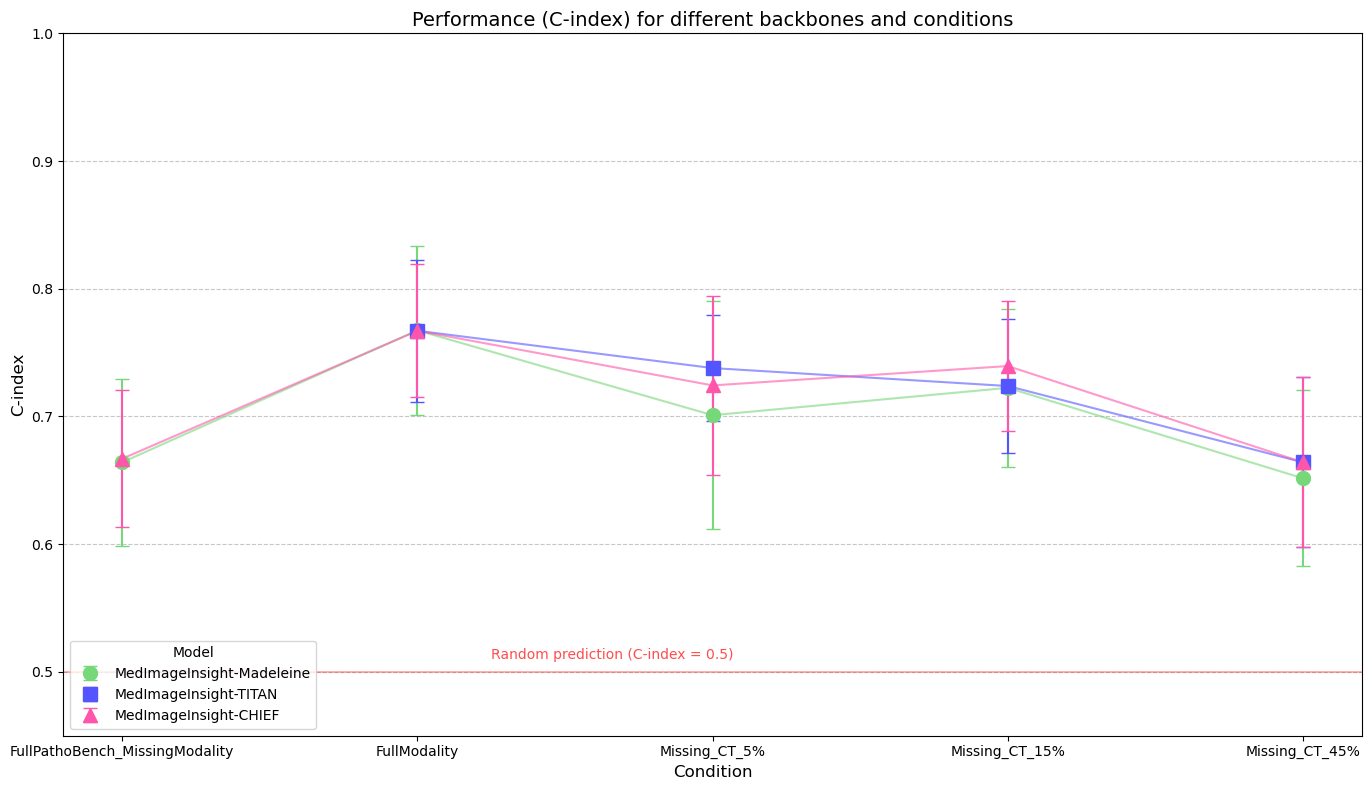

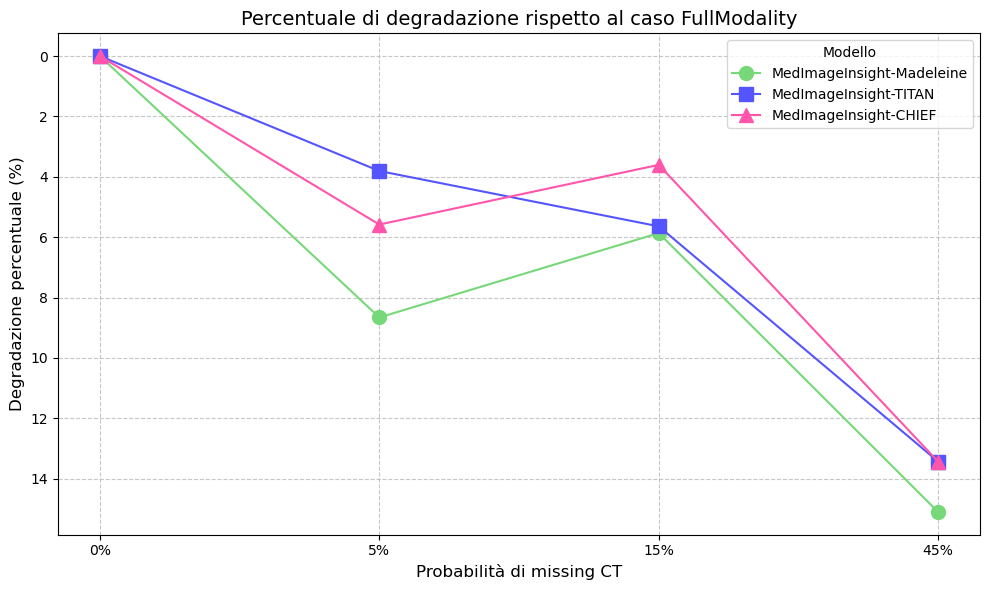

In [26]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# Funzione per processare un singolo file di risultati
def process_result_file(file_content, model_name, condition):
    data = json.loads(file_content) if isinstance(file_content, str) else file_content
    
    # Estrai i valori di C-index da ogni fold
    cindex_values = [fold['best_metrics']['val_cindex'] for fold in data['fold_results']]
    
    # Estrai media e deviazione standard
    mean_cindex = data['mean_metrics']['val_cindex']
    std_cindex = data['std_metrics']['val_cindex']
    
    return {
        'Model': model_name,
        'Condition': condition,
        'Mean': mean_cindex,
        'Std': std_cindex,
        'Values': cindex_values
    }

# Inizializza una lista per raccogliere tutti i risultati
all_results = []

models = {
    "MedImageInsight-Madeleine":[
        {"data": json.load(open("./models/ckpts/CPTACPDA_madeleine_medimsights_fullpathobench/cv_results.json")), "condition": "FullPathoBench_MissingModality"},
        {"data": json.load(open("./models/ckpts/CPTACPDA_madeleine_medimsights_ctpathobench/cv_results.json")), "condition": "FullModality"},
        {"data": json.load(open("./models/ckpts/CPTACPDA_madeleine_medimsights_ctmissing_nvals05/cv_results.json")), "condition": "Missing_CT_5%"},
        {"data": json.load(open("./models/ckpts/CPTACPDA_madeleine_medimsights_ctmissing_nvals15/cv_results.json")), "condition": "Missing_CT_15%"},
        {"data": json.load(open("./models/ckpts/CPTACPDA_madeleine_medimsights_ctmissing_nvals45/cv_results.json")), "condition": "Missing_CT_45%"},
    ],
     "MedImageInsight-TITAN":[
         #{"data": json.load(open("./models/ckpts/")),"condition":"FullPathoBench_MissingModality"},
         {"data": json.load(open("./models/ckpts/CPTACPDA_Titan_MedIMSights_ctonly/cv_results.json")), "condition": "FullModality"},
         {"data": json.load(open("./models/ckpts/CPTACPDA_titan_medimsights_ctmissing_nvals05/cv_results.json")), "condition": "Missing_CT_5%"},
         {"data": json.load(open("./models/ckpts/CPTACPDA_titan_medimsights_ctmissing_nvals15/cv_results.json")), "condition": "Missing_CT_15%"},
         {"data": json.load(open("./models/ckpts/CPTACPDA_titan_medimsights_ctmissing_nvals45/cv_results.json")), "condition": "Missing_CT_45%"},
     ],
     "MedImageInsight-CHIEF":[
         {"data": json.load(open("./models/ckpts/CPTACPDA_chief_medimsights_FullPathobench_New/cv_results.json")), "condition": "FullPathoBench_MissingModality"},
         {"data": json.load(open("./models/ckpts/CPTACPDA_chief_medimsights_CTOnly/cv_results.json")), "condition": "FullModality"},
         {"data": json.load(open("./models/ckpts/CPTACPDA_chief_medimsights_ctmissing_nvals05/cv_results.json")), "condition": "Missing_CT_5%"},
         {"data": json.load(open("./models/ckpts/CPTACPDA_chief_medimsights_ctmissing_nvals15/cv_results.json")), "condition": "Missing_CT_15%"},
         {"data": json.load(open("./models/ckpts/CPTACPDA_chief_medimsights_ctmissing_nvals45/cv_results.json")), "condition": "Missing_CT_45%"},
     ],
}

# Processa tutti i modelli e le loro condizioni
for model_name, conditions in models.items():
    for condition_data in conditions:
        result = process_result_file(condition_data["data"], model_name, condition_data["condition"])
        all_results.append(result)

# Converti in DataFrame per facilitare la manipolazione
df_results = pd.DataFrame(all_results)

# Crea il grafico con punti semplici
plt.figure(figsize=(14, 8))

# Definisci i colori e i marker per ogni modello
model_colors = {
    "MedImageInsight-Madeleine": '#77d879',
    "MedImageInsight-TITAN": '#5555ff',
    "MedImageInsight-CHIEF": '#ff55aa'
}

model_markers = {
    "MedImageInsight-Madeleine": 'o',
    "MedImageInsight-TITAN": 's',
    "MedImageInsight-CHIEF": '^'
}

# Ottieni tutte le condizioni uniche in ordine
conditions = ['FullPathoBench_MissingModality', 'FullModality', 'Missing_CT_5%', 'Missing_CT_15%', 'Missing_CT_45%']
models_list = list(models.keys())

# Per ogni modello, plotta i punti per ciascuna condizione
for model_name in models_list:
    x_values = []
    y_values = []
    y_errors = []
    
    for condition in conditions:
        # Trova il risultato per questo modello e condizione (se esiste)
        result = next((r for r in all_results if r['Model'] == model_name and r['Condition'] == condition), None)
        
        if result:
            x_values.append(conditions.index(condition))
            y_values.append(result['Mean'])
            y_errors.append(result['Std'])
    
    # Plotta i punti con barre di errore
    plt.errorbar(
        x_values, 
        y_values, 
        yerr=y_errors, 
        fmt=model_markers[model_name], 
        color=model_colors[model_name],
        markersize=10,
        capsize=5,
        label=model_name
    )
    
    # Collega i punti con una linea
    plt.plot(x_values, y_values, '-', color=model_colors[model_name], alpha=0.6)

# Personalizza il grafico
plt.title('Performance (C-index) for different backbones and conditions', fontsize=14)
plt.xlabel('Condition', fontsize=12)
plt.ylabel('C-index', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylim(0.45, 1.0)  # Adatta questo range in base ai tuoi dati

# Imposta i tick dell'asse x
plt.xticks(range(len(conditions)), conditions)

# Aggiungi una linea orizzontale per C-index = 0.5 (equivalente a predizione casuale)
plt.axhline(y=0.5, color='r', linestyle='-', alpha=0.3)
plt.text(1.25, 0.51, 'Random prediction (C-index = 0.5)', color='r', alpha=0.7)

# Aggiungi la legenda
plt.legend(title='Model', loc='lower left')

plt.tight_layout()
plt.savefig('cindex_points_comparison.png', dpi=300)

# Crea anche il grafico di degradazione delle performance
plt.figure(figsize=(10, 6))

# Preparazione dati per il grafico di degradazione
x_values = ['0%', '5%', '15%', '45%']  # Percentuali di missing modality

for model_name in models_list:
    # Estrai il valore baseline (FullModality)
    baseline_data = next((r for r in all_results if r['Model'] == model_name and r['Condition'] == 'FullModality'), None)
    if baseline_data:
        baseline_value = baseline_data['Mean']
        
        # Calcola la percentuale di degradazione per le altre condizioni
        degradation_x = []
        degradation_y = []
        
        for condition, x_label in zip(['FullModality', 'Missing_CT_5%', 'Missing_CT_15%', 'Missing_CT_45%'], x_values):
            result = next((r for r in all_results if r['Model'] == model_name and r['Condition'] == condition), None)
            if result:
                degradation = (1 - result['Mean'] / baseline_value) * 100  # Percentuale di degradazione
                degradation_x.append(x_label)
                degradation_y.append(degradation)
        
        # Plot con punti e linee
        plt.plot(degradation_x, degradation_y, marker=model_markers[model_name], 
                 color=model_colors[model_name], markersize=10, label=model_name)

plt.title('Percentuale di degradazione rispetto al caso FullModality', fontsize=14)
plt.xlabel('Probabilità di missing CT', fontsize=12)
plt.ylabel('Degradazione percentuale (%)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Modello')
plt.gca().invert_yaxis()  # Inverti l'asse Y per mostrare la degradazione verso il basso

plt.tight_layout()
plt.savefig('percentage_degradation_points.png', dpi=300)

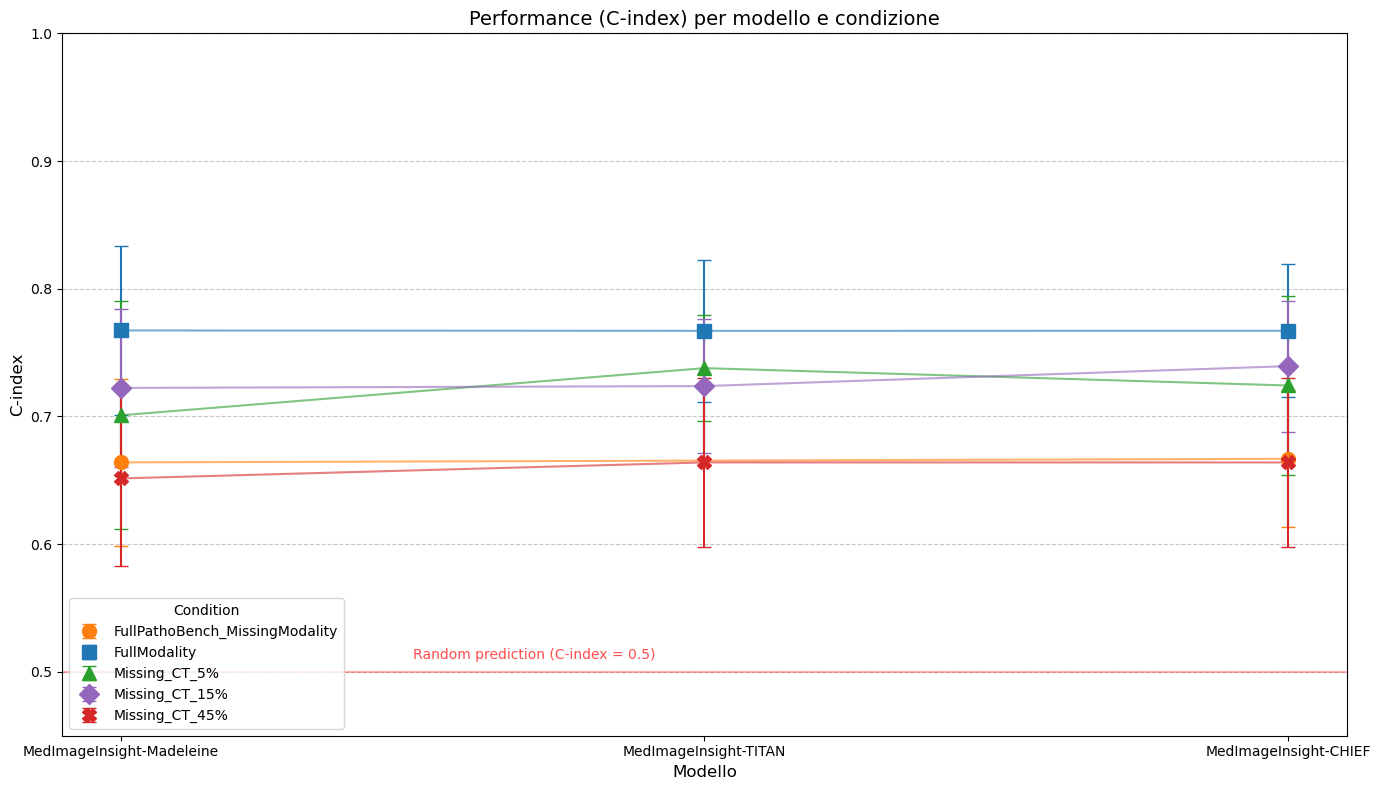

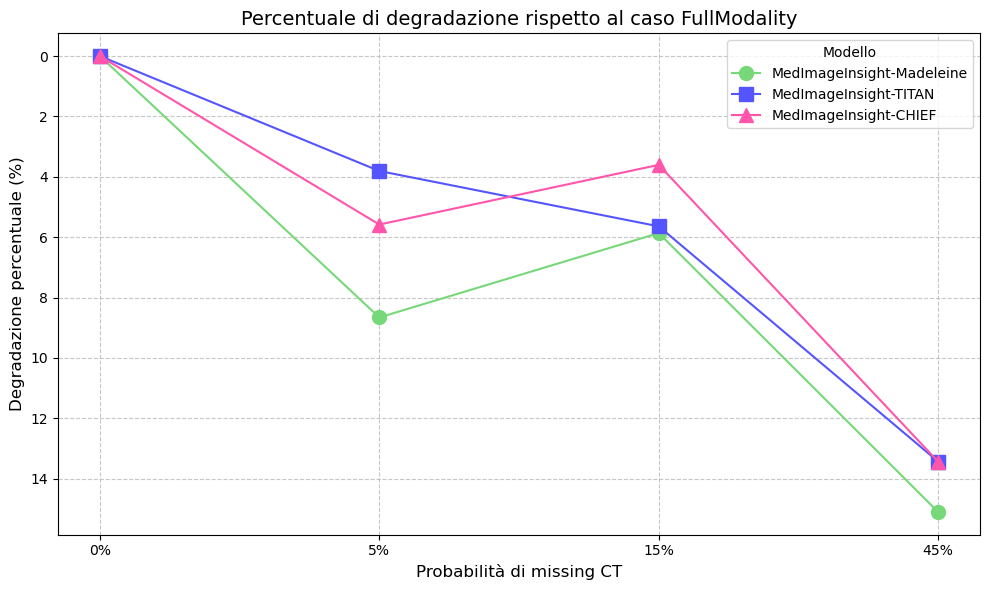

In [27]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# Funzione per processare un singolo file di risultati
def process_result_file(file_content, model_name, condition):
    data = json.loads(file_content) if isinstance(file_content, str) else file_content
    
    # Estrai i valori di C-index da ogni fold
    cindex_values = [fold['best_metrics']['val_cindex'] for fold in data['fold_results']]
    
    # Estrai media e deviazione standard
    mean_cindex = data['mean_metrics']['val_cindex']
    std_cindex = data['std_metrics']['val_cindex']
    
    return {
        'Model': model_name,
        'Condition': condition,
        'Mean': mean_cindex,
        'Std': std_cindex,
        'Values': cindex_values
    }

# Inizializza una lista per raccogliere tutti i risultati
all_results = []

models = {
    "MedImageInsight-Madeleine":[
        {"data": json.load(open("./models/ckpts/CPTACPDA_madeleine_medimsights_fullpathobench/cv_results.json")), "condition": "FullPathoBench_MissingModality"},
        {"data": json.load(open("./models/ckpts/CPTACPDA_madeleine_medimsights_ctpathobench/cv_results.json")), "condition": "FullModality"},
        {"data": json.load(open("./models/ckpts/CPTACPDA_madeleine_medimsights_ctmissing_nvals05/cv_results.json")), "condition": "Missing_CT_5%"},
        {"data": json.load(open("./models/ckpts/CPTACPDA_madeleine_medimsights_ctmissing_nvals15/cv_results.json")), "condition": "Missing_CT_15%"},
        {"data": json.load(open("./models/ckpts/CPTACPDA_madeleine_medimsights_ctmissing_nvals45/cv_results.json")), "condition": "Missing_CT_45%"},
    ],
     "MedImageInsight-TITAN":[
         #{"data": json.load(open("./models/ckpts/")),"condition":"FullPathoBench_MissingModality"},
         {"data": json.load(open("./models/ckpts/CPTACPDA_Titan_MedIMSights_ctonly/cv_results.json")), "condition": "FullModality"},
         {"data": json.load(open("./models/ckpts/CPTACPDA_titan_medimsights_ctmissing_nvals05/cv_results.json")), "condition": "Missing_CT_5%"},
         {"data": json.load(open("./models/ckpts/CPTACPDA_titan_medimsights_ctmissing_nvals15/cv_results.json")), "condition": "Missing_CT_15%"},
         {"data": json.load(open("./models/ckpts/CPTACPDA_titan_medimsights_ctmissing_nvals45/cv_results.json")), "condition": "Missing_CT_45%"},
     ],
     "MedImageInsight-CHIEF":[
         {"data": json.load(open("./models/ckpts/CPTACPDA_chief_medimsights_FullPathobench_New/cv_results.json")), "condition": "FullPathoBench_MissingModality"},
         {"data": json.load(open("./models/ckpts/CPTACPDA_chief_medimsights_CTOnly/cv_results.json")), "condition": "FullModality"},
         {"data": json.load(open("./models/ckpts/CPTACPDA_chief_medimsights_ctmissing_nvals05/cv_results.json")), "condition": "Missing_CT_5%"},
         {"data": json.load(open("./models/ckpts/CPTACPDA_chief_medimsights_ctmissing_nvals15/cv_results.json")), "condition": "Missing_CT_15%"},
         {"data": json.load(open("./models/ckpts/CPTACPDA_chief_medimsights_ctmissing_nvals45/cv_results.json")), "condition": "Missing_CT_45%"},
     ],
}

# Processa tutti i modelli e le loro condizioni
for model_name, conditions in models.items():
    for condition_data in conditions:
        result = process_result_file(condition_data["data"], model_name, condition_data["condition"])
        all_results.append(result)

# Converti in DataFrame per facilitare la manipolazione
df_results = pd.DataFrame(all_results)

# Crea il grafico con punti semplici
plt.figure(figsize=(14, 8))

# Definisci i colori e i marker per ogni condizione
condition_colors = {
    "FullPathoBench_MissingModality": '#FF7F0E',  # arancione
    "FullModality": '#1F77B4',  # blu
    "Missing_CT_5%": '#2CA02C',  # verde
    "Missing_CT_15%": '#9467BD',  # viola
    "Missing_CT_45%": '#D62728'   # rosso
}

condition_markers = {
    "FullPathoBench_MissingModality": 'o',
    "FullModality": 's',
    "Missing_CT_5%": '^',
    "Missing_CT_15%": 'D',
    "Missing_CT_45%": 'X'
}

# Ottieni tutte le condizioni uniche in ordine
conditions = ['FullPathoBench_MissingModality', 'FullModality', 'Missing_CT_5%', 'Missing_CT_15%', 'Missing_CT_45%']
models_list = list(models.keys())

# Configurazioni per la disposizione dei modelli
model_positions = {
    "MedImageInsight-Madeleine": 0,
    "MedImageInsight-TITAN": 1,
    "MedImageInsight-CHIEF": 2
}

# Larghezza totale per raggruppamento
total_width = 1.0
# Offset per separare ogni condizione all'interno del gruppo di modelli
condition_offset = total_width / (len(conditions) + 1)

# Per ogni condizione, plotta i punti per ciascun modello
for condition in conditions:
    x_values = []
    y_values = []
    y_errors = []
    model_names = []
    
    for model_name in models_list:
        # Trova il risultato per questo modello e condizione (se esiste)
        result = next((r for r in all_results if r['Model'] == model_name and r['Condition'] == condition), None)
        
        if result:
            # Posizione base del modello + offset per la condizione
            pos = model_positions[model_name]
            x_values.append(pos)
            y_values.append(result['Mean'])
            y_errors.append(result['Std'])
            model_names.append(model_name)
    
    # Plotta i punti con barre di errore
    plt.errorbar(
        x_values, 
        y_values, 
        yerr=y_errors, 
        fmt=condition_markers[condition], 
        color=condition_colors[condition],
        markersize=10,
        capsize=5,
        label=condition
    )
    
    # Aggiungi linee di connessione tra punti della stessa condizione
    if len(x_values) > 1:
        plt.plot(x_values, y_values, '-', color=condition_colors[condition], alpha=0.6)

# Personalizza il grafico
plt.title('Performance (C-index) per modello e condizione', fontsize=14)
plt.xlabel('Modello', fontsize=12)
plt.ylabel('C-index', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylim(0.45, 1.0)  # Adatta questo range in base ai tuoi dati

# Imposta i tick dell'asse x
plt.xticks(range(len(models_list)), models_list)

# Aggiungi una linea orizzontale per C-index = 0.5 (equivalente a predizione casuale)
plt.axhline(y=0.5, color='r', linestyle='-', alpha=0.3)
plt.text(0.5, 0.51, 'Random prediction (C-index = 0.5)', color='r', alpha=0.7)

# Aggiungi la legenda
plt.legend(title='Condition', loc='lower left')

plt.tight_layout()
plt.savefig('cindex_points_by_model.png', dpi=300)

# Crea anche il grafico di degradazione delle performance
plt.figure(figsize=(10, 6))

# Definisci i colori per ogni modello
model_colors = {
    "MedImageInsight-Madeleine": '#77d879',
    "MedImageInsight-TITAN": '#5555ff',
    "MedImageInsight-CHIEF": '#ff55aa'
}

model_markers = {
    "MedImageInsight-Madeleine": 'o',
    "MedImageInsight-TITAN": 's',
    "MedImageInsight-CHIEF": '^'
}

# Preparazione dati per il grafico di degradazione
x_values = ['0%', '5%', '15%', '45%']  # Percentuali di missing modality

for model_name in models_list:
    # Estrai il valore baseline (FullModality)
    baseline_data = next((r for r in all_results if r['Model'] == model_name and r['Condition'] == 'FullModality'), None)
    if baseline_data:
        baseline_value = baseline_data['Mean']
        
        # Calcola la percentuale di degradazione per le altre condizioni
        degradation_x = []
        degradation_y = []
        
        for condition, x_label in zip(['FullModality', 'Missing_CT_5%', 'Missing_CT_15%', 'Missing_CT_45%'], x_values):
            result = next((r for r in all_results if r['Model'] == model_name and r['Condition'] == condition), None)
            if result:
                degradation = (1 - result['Mean'] / baseline_value) * 100  # Percentuale di degradazione
                degradation_x.append(x_label)
                degradation_y.append(degradation)
        
        # Plot con punti e linee
        plt.plot(degradation_x, degradation_y, marker=model_markers[model_name], 
                 color=model_colors[model_name], markersize=10, label=model_name)

plt.title('Percentuale di degradazione rispetto al caso FullModality', fontsize=14)
plt.xlabel('Probabilità di missing CT', fontsize=12)
plt.ylabel('Degradazione percentuale (%)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Modello')
plt.gca().invert_yaxis()  # Inverti l'asse Y per mostrare la degradazione verso il basso

plt.tight_layout()
plt.savefig('percentage_degradation_points.png', dpi=300)

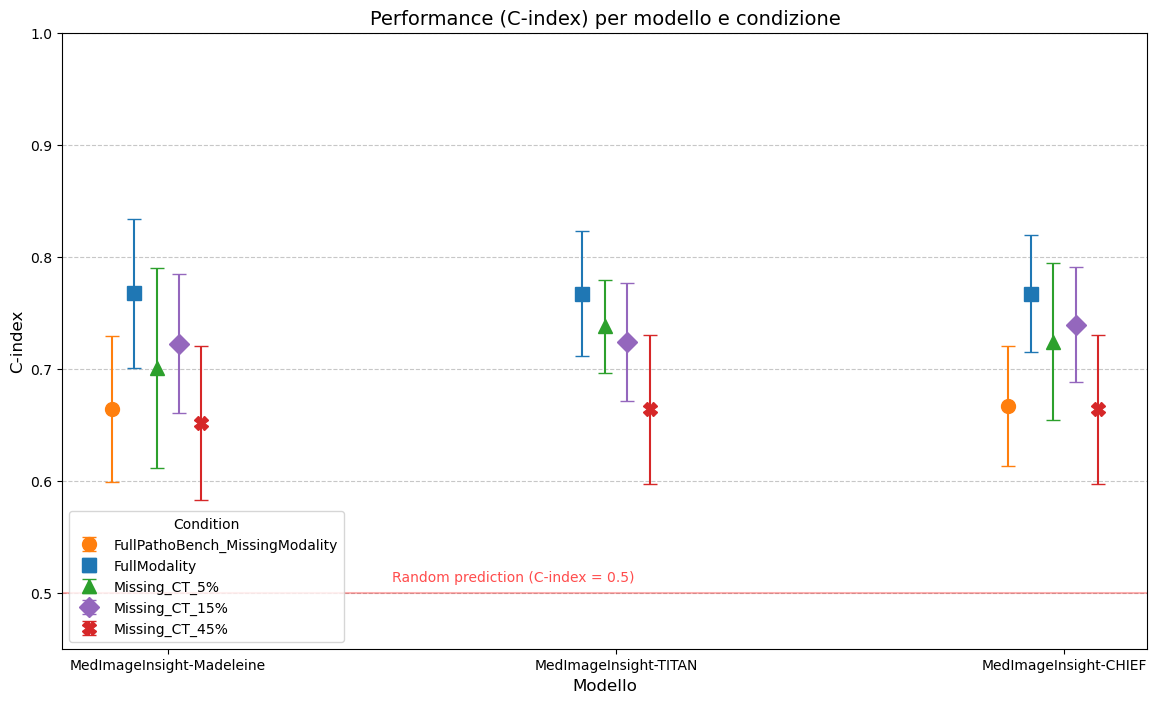

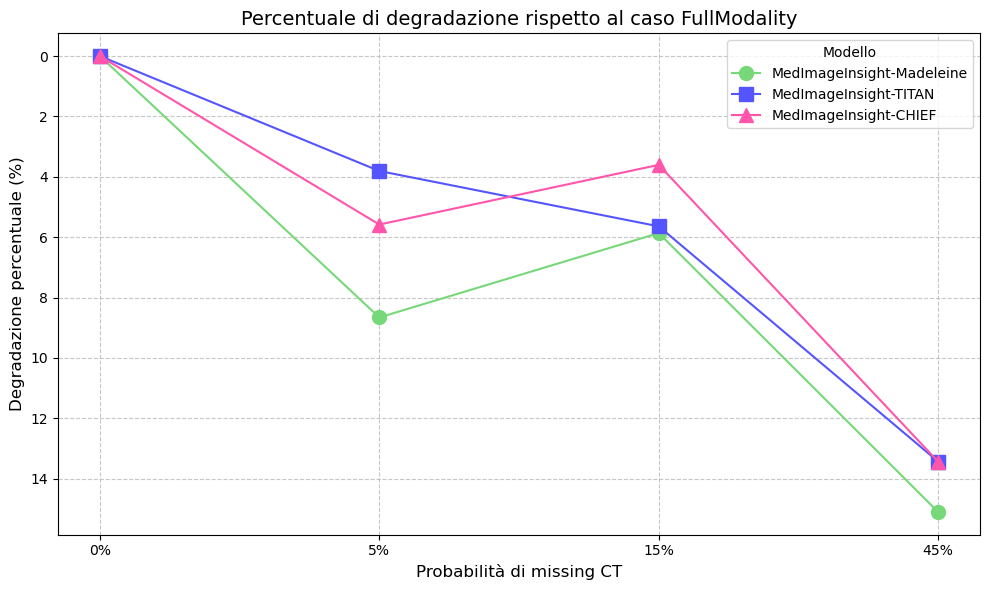

In [ ]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# Funzione per processare un singolo file di risultati
def process_result_file(file_content, model_name, condition):
    data = json.loads(file_content) if isinstance(file_content, str) else file_content

    # Estrai i valori di C-index da ogni fold
    cindex_values = [fold['best_metrics']['val_cindex'] for fold in data['fold_results']]

    # Estrai media e deviazione standard
    mean_cindex = data['mean_metrics']['val_cindex']
    std_cindex = data['std_metrics']['val_cindex']

    return {
        'Model': model_name,
        'Condition': condition,
        'Mean': mean_cindex,
        'Std': std_cindex,
        'Values': cindex_values
    }

# Inizializza una lista per raccogliere tutti i risultati
all_results = []

models = {
    "MedImageInsight-Madeleine": [
        {"data": json.load(open("./models/ckpts/CPTACPDA_madeleine_medimsights_fullpathobench/cv_results.json")), "condition": "FullPathoBench_MissingModality"},
        {"data": json.load(open("./models/ckpts/CPTACPDA_madeleine_medimsights_ctpathobench/cv_results.json")), "condition": "FullModality"},
        {"data": json.load(open("./models/ckpts/CPTACPDA_madeleine_medimsights_ctmissing_nvals05/cv_results.json")), "condition": "Missing_CT_5%"},
        {"data": json.load(open("./models/ckpts/CPTACPDA_madeleine_medimsights_ctmissing_nvals15/cv_results.json")), "condition": "Missing_CT_15%"},
        {"data": json.load(open("./models/ckpts/CPTACPDA_madeleine_medimsights_ctmissing_nvals45/cv_results.json")), "condition": "Missing_CT_45%"},
    ],
    "MedImageInsight-TITAN": [
        {"data": json.load(open("./models/ckpts/CPTACPDA_Titan_MedIMSights_ctonly/cv_results.json")), "condition": "FullModality"},
        {"data": json.load(open("./models/ckpts/CPTACPDA_titan_medimsights_ctmissing_nvals05/cv_results.json")), "condition": "Missing_CT_5%"},
        {"data": json.load(open("./models/ckpts/CPTACPDA_titan_medimsights_ctmissing_nvals15/cv_results.json")), "condition": "Missing_CT_15%"},
        {"data": json.load(open("./models/ckpts/CPTACPDA_titan_medimsights_ctmissing_nvals45/cv_results.json")), "condition": "Missing_CT_45%"},
    ],
    "MedImageInsight-CHIEF": [
        {"data": json.load(open("./models/ckpts/CPTACPDA_chief_medimsights_FullPathobench_New/cv_results.json")), "condition": "FullPathoBench_MissingModality"},
        {"data": json.load(open("./models/ckpts/CPTACPDA_chief_medimsights_CTOnly/cv_results.json")), "condition": "FullModality"},
        {"data": json.load(open("./models/ckpts/CPTACPDA_chief_medimsights_ctmissing_nvals05/cv_results.json")), "condition": "Missing_CT_5%"},
        {"data": json.load(open("./models/ckpts/CPTACPDA_chief_medimsights_ctmissing_nvals15/cv_results.json")), "condition": "Missing_CT_15%"},
        {"data": json.load(open("./models/ckpts/CPTACPDA_chief_medimsights_ctmissing_nvals45/cv_results.json")), "condition": "Missing_CT_45%"},
    ],
}

# Processa tutti i modelli e le loro condizioni
for model_name, conditions in models.items():
    for condition_data in conditions:
        result = process_result_file(condition_data["data"], model_name, condition_data["condition"])
        all_results.append(result)

# Converti in DataFrame per facilitare la manipolazione
df_results = pd.DataFrame(all_results)

# Crea il grafico con punti semplici
plt.figure(figsize=(14, 8))

# Definisci i colori e i marker per ogni condizione
condition_colors = {
    "FullPathoBench_MissingModality": '#FF7F0E',
    "FullModality": '#1F77B4',
    "Missing_CT_5%": '#2CA02C',
    "Missing_CT_15%": '#9467BD',
    "Missing_CT_45%": '#D62728'
}

condition_markers = {
    "FullPathoBench_MissingModality": 'o',
    "FullModality": 's',
    "Missing_CT_5%": '^',
    "Missing_CT_15%": 'D',
    "Missing_CT_45%": 'X'
}

# Ottieni tutte le condizioni uniche in ordine
conditions = ['FullPathoBench_MissingModality', 'FullModality', 'Missing_CT_5%', 'Missing_CT_15%', 'Missing_CT_45%']
models_list = list(models.keys())

# Jitter per evitare sovrapposizione
jitter_strength = 0.35

# Plot dei punti con jitter e senza connessione tra modelli
for i, model_name in enumerate(models_list):
    for j, condition in enumerate(conditions):
        result = next((r for r in all_results if r['Model'] == model_name and r['Condition'] == condition), None)
        if result:
            x_pos = i + (j - len(conditions)/2) * jitter_strength / len(conditions)
            plt.errorbar(
                x_pos,
                result['Mean'],
                yerr=result['Std'],
                fmt=condition_markers[condition],
                color=condition_colors[condition],
                markersize=10,
                capsize=5,
                label=condition if i == 0 else None  # Evita duplicati in legenda
            )

# Personalizza il grafico
plt.title('Performance (C-index) per modello e condizione', fontsize=14)
plt.xlabel('Modello', fontsize=12)
plt.ylabel('C-index', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylim(0.45, 1.0)

# Imposta i tick dell'asse x
plt.xticks(range(len(models_list)), models_list)

# Linea orizzontale per la baseline (random)
plt.axhline(y=0.5, color='r', linestyle='-', alpha=0.3)
plt.text(0.5, 0.51, 'Random prediction (C-index = 0.5)', color='r', alpha=0.7)

# Aggiungi la legenda
plt.legend(title='Condition', loc='lower left')

#plt.tight_layout()
plt.savefig('cindex_points_by_model.png', dpi=300)

# --------------------------
# Grafico di degradazione
# --------------------------

plt.figure(figsize=(10, 6))

# Definisci i colori per ogni modello
model_colors = {
    "MedImageInsight-Madeleine": '#77d879',
    "MedImageInsight-TITAN": '#5555ff',
    "MedImageInsight-CHIEF": '#ff55aa'
}

model_markers = {
    "MedImageInsight-Madeleine": 'o',
    "MedImageInsight-TITAN": 's',
    "MedImageInsight-CHIEF": '^'
}

# Preparazione dati per il grafico di degradazione
x_labels = ['0%', '5%', '15%', '45%']
condition_order = ['FullModality', 'Missing_CT_5%', 'Missing_CT_15%', 'Missing_CT_45%']

for model_name in models_list:
    baseline_data = next((r for r in all_results if r['Model'] == model_name and r['Condition'] == 'FullModality'), None)
    if baseline_data:
        baseline_value = baseline_data['Mean']
        degradation_y = []
        for cond in condition_order:
            result = next((r for r in all_results if r['Model'] == model_name and r['Condition'] == cond), None)
            if result:
                degradation = (1 - result['Mean'] / baseline_value) * 100
                degradation_y.append(degradation)
        plt.plot(x_labels, degradation_y, marker=model_markers[model_name],
                 color=model_colors[model_name], markersize=10, label=model_name)

plt.title('Percentuale di degradazione rispetto al caso FullModality', fontsize=14)
plt.xlabel('Probabilità di missing CT', fontsize=12)
plt.ylabel('Degradazione percentuale (%)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Modello')
plt.gca().invert_yaxis()

plt.tight_layout()
plt.savefig('percentage_degradation_points.png', dpi=300)


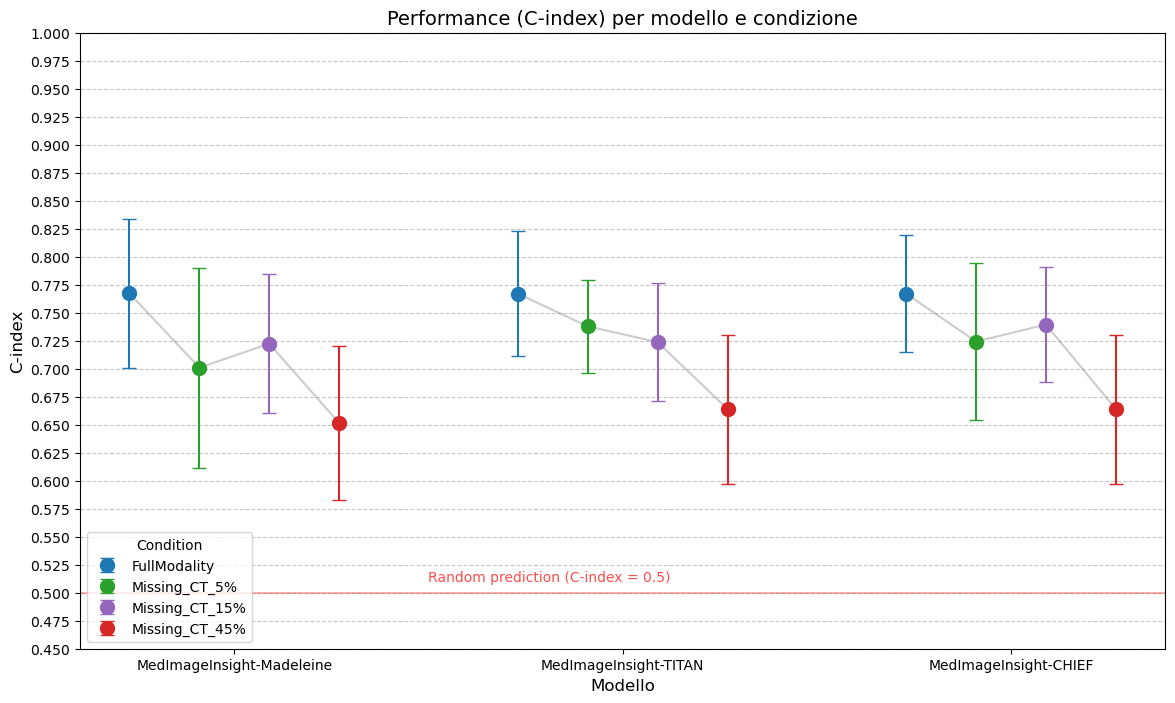

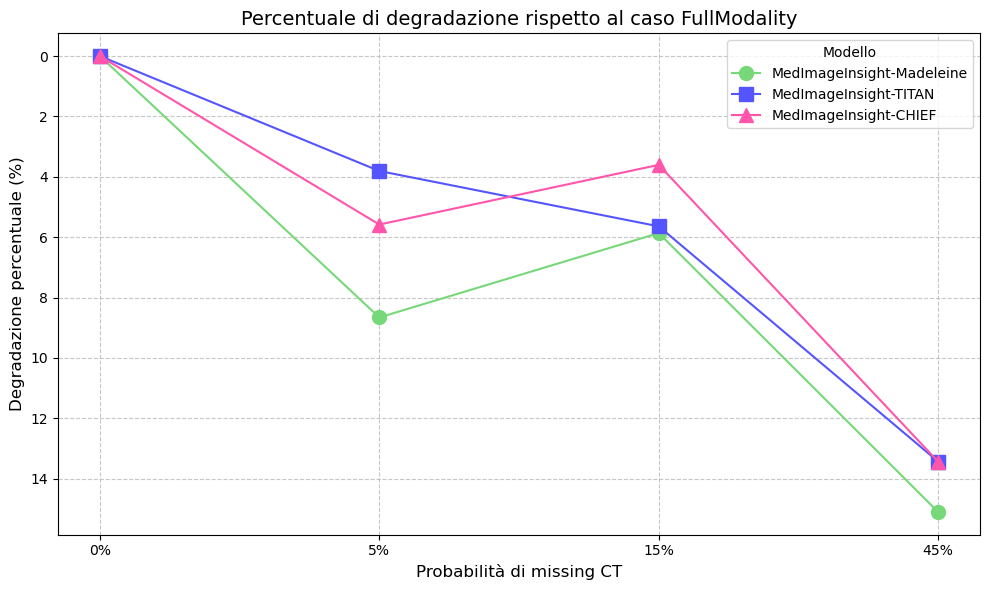

In [39]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# Funzione per processare un singolo file di risultati
def process_result_file(file_content, model_name, condition):
    data = json.loads(file_content) if isinstance(file_content, str) else file_content

    cindex_values = [fold['best_metrics']['val_cindex'] for fold in data['fold_results']]
    mean_cindex = data['mean_metrics']['val_cindex']
    std_cindex = data['std_metrics']['val_cindex']

    return {
        'Model': model_name,
        'Condition': condition,
        'Mean': mean_cindex,
        'Std': std_cindex,
        'Values': cindex_values
    }

# Inizializza una lista per raccogliere tutti i risultati
all_results = []

models = {
    "MedImageInsight-Madeleine": [
        #{"data": json.load(open("./models/ckpts/CPTACPDA_madeleine_medimsights_fullpathobench/cv_results.json")), "condition": "FullPathoBench_MissingModality"},
        {"data": json.load(open("./models/ckpts/CPTACPDA_madeleine_medimsights_ctpathobench/cv_results.json")), "condition": "FullModality"},
        {"data": json.load(open("./models/ckpts/CPTACPDA_madeleine_medimsights_ctmissing_nvals05/cv_results.json")), "condition": "Missing_CT_5%"},
        {"data": json.load(open("./models/ckpts/CPTACPDA_madeleine_medimsights_ctmissing_nvals15/cv_results.json")), "condition": "Missing_CT_15%"},
        {"data": json.load(open("./models/ckpts/CPTACPDA_madeleine_medimsights_ctmissing_nvals45/cv_results.json")), "condition": "Missing_CT_45%"},
    ],
    "MedImageInsight-TITAN": [
        {"data": json.load(open("./models/ckpts/CPTACPDA_Titan_MedIMSights_ctonly/cv_results.json")), "condition": "FullModality"},
        {"data": json.load(open("./models/ckpts/CPTACPDA_titan_medimsights_ctmissing_nvals05/cv_results.json")), "condition": "Missing_CT_5%"},
        {"data": json.load(open("./models/ckpts/CPTACPDA_titan_medimsights_ctmissing_nvals15/cv_results.json")), "condition": "Missing_CT_15%"},
        {"data": json.load(open("./models/ckpts/CPTACPDA_titan_medimsights_ctmissing_nvals45/cv_results.json")), "condition": "Missing_CT_45%"},
    ],
    "MedImageInsight-CHIEF": [
        #{"data": json.load(open("./models/ckpts/CPTACPDA_chief_medimsights_FullPathobench_New/cv_results.json")), "condition": "FullPathoBench_MissingModality"},
        {"data": json.load(open("./models/ckpts/CPTACPDA_chief_medimsights_CTOnly/cv_results.json")), "condition": "FullModality"},
        {"data": json.load(open("./models/ckpts/CPTACPDA_chief_medimsights_ctmissing_nvals05/cv_results.json")), "condition": "Missing_CT_5%"},
        {"data": json.load(open("./models/ckpts/CPTACPDA_chief_medimsights_ctmissing_nvals15/cv_results.json")), "condition": "Missing_CT_15%"},
        {"data": json.load(open("./models/ckpts/CPTACPDA_chief_medimsights_ctmissing_nvals45/cv_results.json")), "condition": "Missing_CT_45%"},
    ],
}

for model_name, conditions in models.items():
    for condition_data in conditions:
        result = process_result_file(condition_data["data"], model_name, condition_data["condition"])
        all_results.append(result)

df_results = pd.DataFrame(all_results)

# -------------------------
# PLOT 1: C-Index per model
# -------------------------
plt.figure(figsize=(14, 8))

condition_colors = {
    "FullPathoBench_MissingModality": '#FF7F0E',
    "FullModality": '#1F77B4',
    "Missing_CT_5%": '#2CA02C',
    "Missing_CT_15%": '#9467BD',
    "Missing_CT_45%": '#D62728'
}

condition_markers = {
    "FullPathoBench_MissingModality": 'o',
    "FullModality": 'o',
    "Missing_CT_5%": 'o',
    "Missing_CT_15%": 'o',
    "Missing_CT_45%": 'o'
}

conditions = ['FullPathoBench_MissingModality', 'FullModality', 'Missing_CT_5%', 'Missing_CT_15%', 'Missing_CT_45%']
models_list = list(models.keys())
model_positions = {model: i for i, model in enumerate(models_list)}
jitter_strength = 0.9

# Keep track of legend labels
plotted_conditions = set()

# For each model, plot lines across conditions (with jittered x)
for model_idx, model_name in enumerate(models_list):
    x_vals = []
    y_vals = []
    y_errs = []
    for cond_idx, condition in enumerate(conditions):
        result = next((r for r in all_results if r['Model'] == model_name and r['Condition'] == condition), None)
        if result:
            jitter = (cond_idx - len(conditions)/2) * (jitter_strength / len(conditions))
            x = model_idx + jitter
            x_vals.append(x)
            y_vals.append(result['Mean'])
            y_errs.append(result['Std'])

            label = condition if condition not in plotted_conditions else None
            plt.errorbar(
                x, result['Mean'], yerr=result['Std'],
                fmt=condition_markers[condition],
                color=condition_colors[condition],
                markersize=10, capsize=5,
                label=label
            )
            plotted_conditions.add(condition)

    # Plot connecting line for this model only
    if len(x_vals) > 1:
        plt.plot(x_vals, y_vals, linestyle='-', color='gray', alpha=0.4)

plt.title('Performance (C-index) per modello e condizione', fontsize=14)
plt.xlabel('Modello', fontsize=12)
plt.ylabel('C-index', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylim(0.45, 1.0)
plt.yticks(np.arange(0.45,1.01,0.025))
plt.xticks(range(len(models_list)), models_list)
plt.axhline(y=0.5, color='r', linestyle='-', alpha=0.3)
plt.text(0.5, 0.51, 'Random prediction (C-index = 0.5)', color='r', alpha=0.7)
plt.legend(title='Condition', loc='lower left')
#plt.tight_layout()
plt.savefig('cindex_points_by_model.png', dpi=300)

# ----------------------------
# PLOT 2: Degradazione percentuale
# ----------------------------
plt.figure(figsize=(10, 6))

model_colors = {
    "MedImageInsight-Madeleine": '#77d879',
    "MedImageInsight-TITAN": '#5555ff',
    "MedImageInsight-CHIEF": '#ff55aa'
}

model_markers = {
    "MedImageInsight-Madeleine": 'o',
    "MedImageInsight-TITAN": 's',
    "MedImageInsight-CHIEF": '^'
}

x_labels = ['0%', '5%', '15%', '45%']
condition_order = ['FullModality', 'Missing_CT_5%', 'Missing_CT_15%', 'Missing_CT_45%']

for model_name in models_list:
    baseline_data = next((r for r in all_results if r['Model'] == model_name and r['Condition'] == 'FullModality'), None)
    if baseline_data:
        baseline_value = baseline_data['Mean']
        degradation_y = []
        for cond in condition_order:
            result = next((r for r in all_results if r['Model'] == model_name and r['Condition'] == cond), None)
            if result:
                degradation = (1 - result['Mean'] / baseline_value) * 100
                degradation_y.append(degradation)
        plt.plot(x_labels, degradation_y, marker=model_markers[model_name],
                 color=model_colors[model_name], markersize=10, label=model_name)

plt.title('Percentuale di degradazione rispetto al caso FullModality', fontsize=14)
plt.xlabel('Probabilità di missing CT', fontsize=12)
plt.ylabel('Degradazione percentuale (%)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Modello')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig('percentage_degradation_points.png', dpi=300)


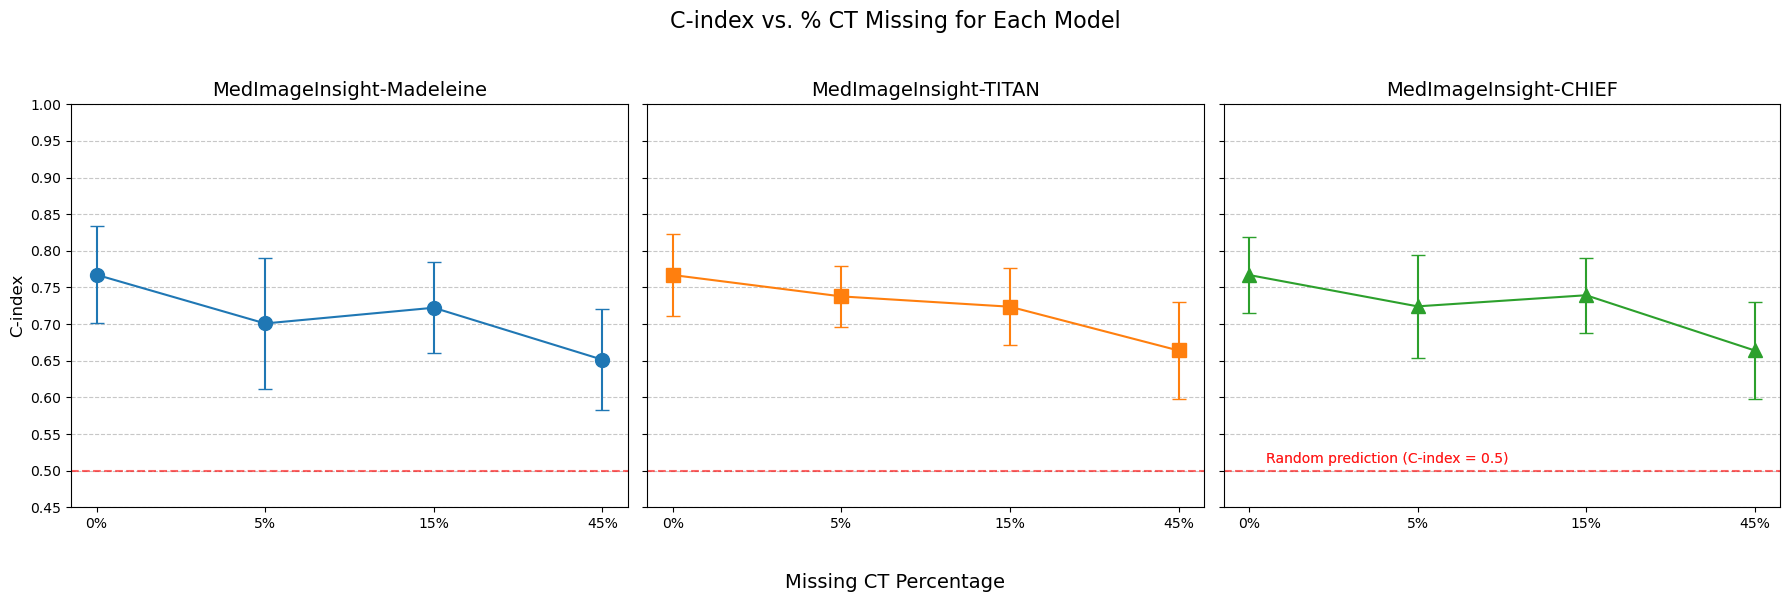

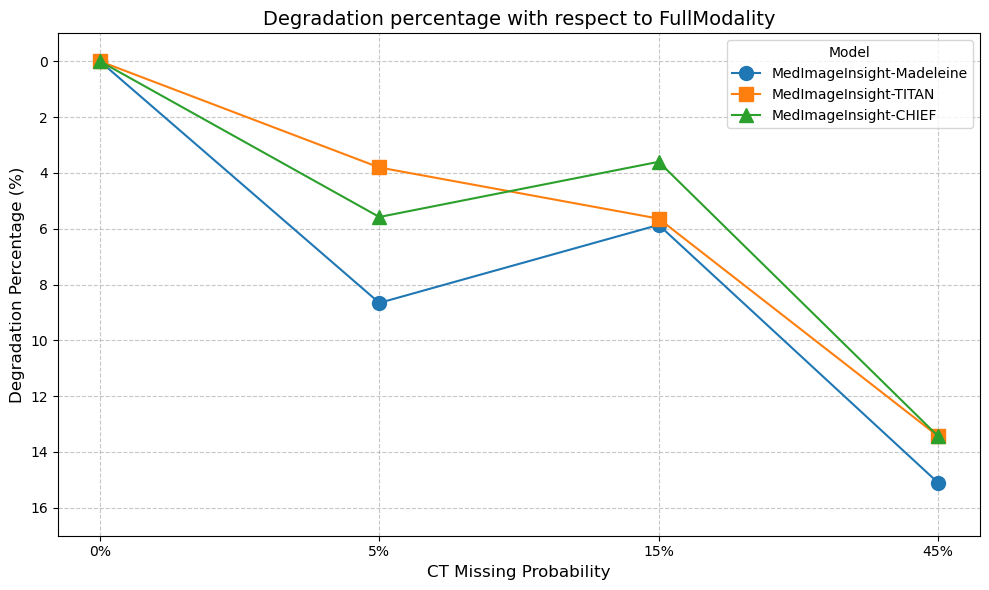

In [15]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# --- Function to process result JSON ---
def process_result_file(file_content, model_name, condition):
    data = json.loads(file_content) if isinstance(file_content, str) else file_content
    cindex_values = [fold['best_metrics']['val_cindex'] for fold in data['fold_results']]
    return {
        'Model': model_name,
        'Condition': condition,
        'Mean': data['mean_metrics']['val_cindex'],
        'Std': data['std_metrics']['val_cindex'],
        'Values': cindex_values
    }

# --- Define model results ---
models = {
    "MedImageInsight-Madeleine": [
        {"data": json.load(open("./models/ckpts/CPTACPDA_madeleine_medimsights_ctpathobench/cv_results.json")), "condition": "FullModality"},
        {"data": json.load(open("./models/ckpts/CPTACPDA_madeleine_medimsights_ctmissing_nvals05/cv_results.json")), "condition": "Missing_CT_5%"},
        {"data": json.load(open("./models/ckpts/CPTACPDA_madeleine_medimsights_ctmissing_nvals15/cv_results.json")), "condition": "Missing_CT_15%"},
        {"data": json.load(open("./models/ckpts/CPTACPDA_madeleine_medimsights_ctmissing_nvals45/cv_results.json")), "condition": "Missing_CT_45%"},
    ],
    "MedImageInsight-TITAN": [
        {"data": json.load(open("./models/ckpts/CPTACPDA_Titan_MedIMSights_ctonly/cv_results.json")), "condition": "FullModality"},
        {"data": json.load(open("./models/ckpts/CPTACPDA_titan_medimsights_ctmissing_nvals05/cv_results.json")), "condition": "Missing_CT_5%"},
        {"data": json.load(open("./models/ckpts/CPTACPDA_titan_medimsights_ctmissing_nvals15/cv_results.json")), "condition": "Missing_CT_15%"},
        {"data": json.load(open("./models/ckpts/CPTACPDA_titan_medimsights_ctmissing_nvals45/cv_results.json")), "condition": "Missing_CT_45%"},
    ],
    "MedImageInsight-CHIEF": [
        {"data": json.load(open("./models/ckpts/CPTACPDA_chief_medimsights_CTOnly/cv_results.json")), "condition": "FullModality"},
        {"data": json.load(open("./models/ckpts/CPTACPDA_chief_medimsights_ctmissing_nvals05/cv_results.json")), "condition": "Missing_CT_5%"},
        {"data": json.load(open("./models/ckpts/CPTACPDA_chief_medimsights_ctmissing_nvals15/cv_results.json")), "condition": "Missing_CT_15%"},
        {"data": json.load(open("./models/ckpts/CPTACPDA_chief_medimsights_ctmissing_nvals45/cv_results.json")), "condition": "Missing_CT_45%"},
    ],
}

# --- Process all results ---
all_results = []
for model_name, entries in models.items():
    for entry in entries:
        result = process_result_file(entry['data'], model_name, entry['condition'])
        all_results.append(result)

df_results = pd.DataFrame(all_results)

# --- Plotting ---
condition_order = ['FullModality', 'Missing_CT_5%', 'Missing_CT_15%', 'Missing_CT_45%']
x_labels = ['0%', '5%', '15%', '45%']
x_vals = np.arange(len(x_labels))

fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
markers = ['o', 's', '^']
models_list = list(models.keys())

for i, model_name in enumerate(models_list):
    ax = axs[i]
    means, stds = [], []

    for cond in condition_order:
        row = next((r for r in all_results if r['Model'] == model_name and r['Condition'] == cond), None)
        if row:
            means.append(row['Mean'])
            stds.append(row['Std'])
        else:
            means.append(np.nan)
            stds.append(0)

    # Connect dots and add error bars
    ax.plot(x_vals, means, color=colors[i], linestyle='-', marker=markers[i], markersize=10, label=model_name)
    ax.errorbar(x_vals, means, yerr=stds, fmt='none', capsize=5, color=colors[i])

    # Titles and axes
    ax.set_title(model_name, fontsize=14)
    ax.set_xticks(x_vals)
    ax.set_xticklabels(x_labels)
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    ax.set_ylim(0.45, 1.0)
    ax.set_yticks(np.arange(0.45, 1.01, 0.05))

    # Add red horizontal line with label only once
    if i == 0:
        ax.axhline(y=0.5, color='red', linestyle='--', label='Random prediction (C-index = 0.5)', alpha=0.6)
        ax.set_ylabel('C-index', fontsize=12)
    else:
        ax.axhline(y=0.5, color='red', linestyle='--', alpha=0.6)
        plt.text(0.1, 0.51, 'Random prediction (C-index = 0.5)', color='r', alpha=0.7)


# Final touches
fig.suptitle('C-index vs. % CT Missing for Each Model', fontsize=16)
fig.supxlabel('Missing CT Percentage', fontsize=14)
#axs[0].legend(loc='lower left', fontsize=10)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('cindex_subplots_with_lines.png', dpi=300)
plt.show()

# ----------------------------
# PLOT 2: Degradazione percentuale
# ----------------------------
plt.figure(figsize=(10, 6))

model_colors = {
    "MedImageInsight-Madeleine": '#1f77b4',
    "MedImageInsight-TITAN": '#ff7f0e',
    "MedImageInsight-CHIEF": '#2ca02c'
}

model_markers = {
    "MedImageInsight-Madeleine": 'o',
    "MedImageInsight-TITAN": 's',
    "MedImageInsight-CHIEF": '^'
}

x_labels = ['0%', '5%', '15%', '45%']
condition_order = ['FullModality', 'Missing_CT_5%', 'Missing_CT_15%', 'Missing_CT_45%']

for model_name in models_list:
    baseline_data = next((r for r in all_results if r['Model'] == model_name and r['Condition'] == 'FullModality'), None)
    if baseline_data:
        baseline_value = baseline_data['Mean']
        degradation_y = []
        for cond in condition_order:
            result = next((r for r in all_results if r['Model'] == model_name and r['Condition'] == cond), None)
            if result:
                degradation = (1 - result['Mean'] / baseline_value) * 100
                degradation_y.append(degradation)
            
        plt.plot(x_labels, degradation_y, marker=model_markers[model_name],
                 color=model_colors[model_name], markersize=10, label=model_name)

plt.title('Degradation percentage with respect to FullModality', fontsize=14)
plt.xlabel('CT Missing Probability', fontsize=12)
plt.ylabel('Degradation Percentage (%)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Model')
plt.ylim([-1,17])
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig('percentage_degradation_points.png', dpi=300)


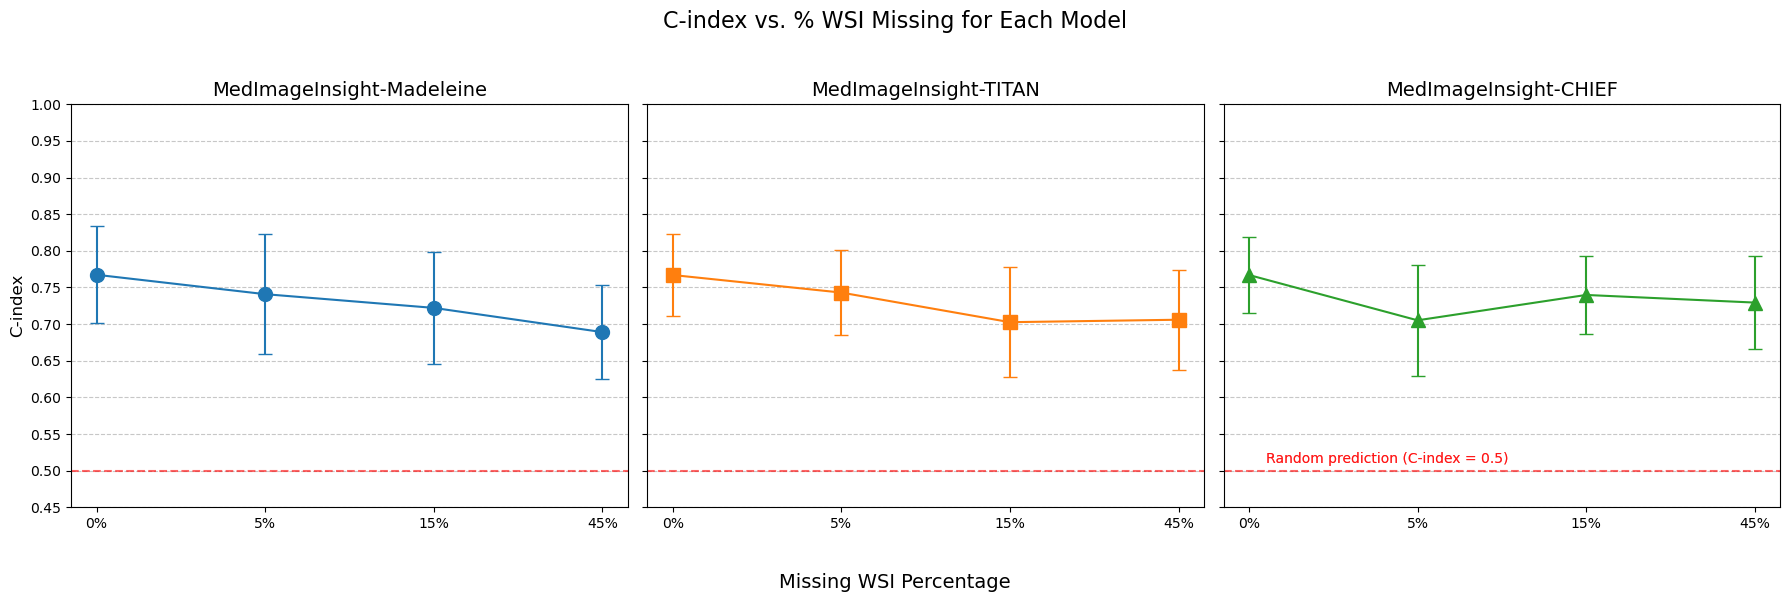

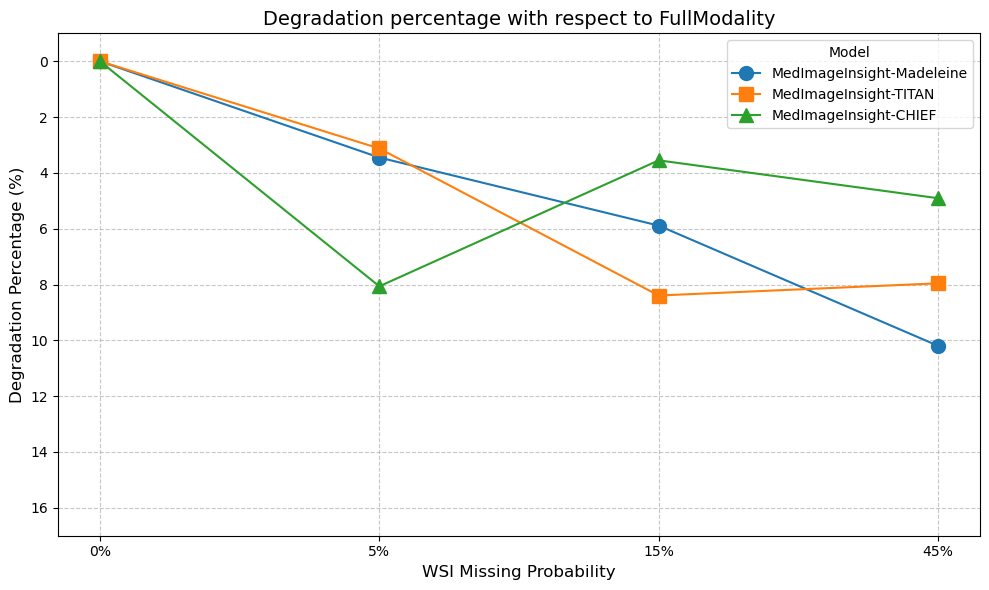

In [14]:
# Andamento performance con wsi missing
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# --- Function to process result JSON ---
def process_result_file(file_content, model_name, condition):
    data = json.loads(file_content) if isinstance(file_content, str) else file_content
    cindex_values = [fold['best_metrics']['val_cindex'] for fold in data['fold_results']]
    return {
        'Model': model_name,
        'Condition': condition,
        'Mean': data['mean_metrics']['val_cindex'],
        'Std': data['std_metrics']['val_cindex'],
        'Values': cindex_values
    }

# --- Define model results ---
models = {
    "MedImageInsight-Madeleine": [
        {"data": json.load(open("./models/ckpts/CPTACPDA_madeleine_medimsights_ctpathobench/cv_results.json")), "condition": "FullModality"},
        {"data": json.load(open("./models/ckpts/CPTACPDA_madeleine_medimsights_wsimissing_nvals05/cv_results.json")), "condition": "Missing_WSI_5%"},
        {"data": json.load(open("./models/ckpts/CPTACPDA_madeleine_medimsights_wsimissing_nvals15/cv_results.json")), "condition": "Missing_WSI_15%"},
        {"data": json.load(open("./models/ckpts/CPTACPDA_madeleine_medimsights_wsimissing_nvals45/cv_results.json")), "condition": "Missing_WSI_45%"},
    ],
    "MedImageInsight-TITAN": [
        {"data": json.load(open("./models/ckpts/CPTACPDA_Titan_MedIMSights_ctonly/cv_results.json")), "condition": "FullModality"},
        {"data": json.load(open("./models/ckpts/CPTACPDA_titan_medimsights_wsimissing_nvals05/cv_results.json")), "condition": "Missing_WSI_5%"},
        {"data": json.load(open("./models/ckpts/CPTACPDA_titan_medimsights_wsimissing_nvals15/cv_results.json")), "condition": "Missing_WSI_15%"},
        {"data": json.load(open("./models/ckpts/CPTACPDA_titan_medimsights_wsimissing_nvals45/cv_results.json")), "condition": "Missing_WSI_45%"},
    ],
    "MedImageInsight-CHIEF": [
        {"data": json.load(open("./models/ckpts/CPTACPDA_chief_medimsights_CTOnly/cv_results.json")), "condition": "FullModality"},
        {"data": json.load(open("./models/ckpts/CPTACPDA_chief_medimsights_wsimissing_nvals05/cv_results.json")), "condition": "Missing_WSI_5%"},
        {"data": json.load(open("./models/ckpts/CPTACPDA_chief_medimsights_wsimissing_nvals15/cv_results.json")), "condition": "Missing_WSI_15%"},
        {"data": json.load(open("./models/ckpts/CPTACPDA_chief_medimsights_wsimissing_nvals45/cv_results.json")), "condition": "Missing_WSI_45%"},
    ],
}

# --- Process all results ---
all_results = []
for model_name, entries in models.items():
    for entry in entries:
        result = process_result_file(entry['data'], model_name, entry['condition'])
        all_results.append(result)

df_results = pd.DataFrame(all_results)

# --- Plotting ---
condition_order = ['FullModality', 'Missing_WSI_5%', 'Missing_WSI_15%', 'Missing_WSI_45%']
x_labels = ['0%', '5%', '15%', '45%']
x_vals = np.arange(len(x_labels))

fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
markers = ['o', 's', '^']
models_list = list(models.keys())

for i, model_name in enumerate(models_list):
    ax = axs[i]
    means, stds = [], []

    for cond in condition_order:
        row = next((r for r in all_results if r['Model'] == model_name and r['Condition'] == cond), None)
        if row:
            means.append(row['Mean'])
            stds.append(row['Std'])
        else:
            means.append(np.nan)
            stds.append(0)

    # Connect dots and add error bars
    ax.plot(x_vals, means, color=colors[i], linestyle='-', marker=markers[i], markersize=10, label=model_name)
    ax.errorbar(x_vals, means, yerr=stds, fmt='none', capsize=5, color=colors[i])

    # Titles and axes
    ax.set_title(model_name, fontsize=14)
    ax.set_xticks(x_vals)
    ax.set_xticklabels(x_labels)
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    ax.set_ylim(0.45, 1.0)
    ax.set_yticks(np.arange(0.45, 1.01, 0.05))

    # Add red horizontal line with label only once
    if i == 0:
        ax.axhline(y=0.5, color='red', linestyle='--', label='Random prediction (C-index = 0.5)', alpha=0.6)
        ax.set_ylabel('C-index', fontsize=12)
    else:
        ax.axhline(y=0.5, color='red', linestyle='--', alpha=0.6)
        plt.text(0.1, 0.51, 'Random prediction (C-index = 0.5)', color='r', alpha=0.7)


# Final touches
fig.suptitle('C-index vs. % WSI Missing for Each Model', fontsize=16)
fig.supxlabel('Missing WSI Percentage', fontsize=14)
#axs[0].legend(loc='lower left', fontsize=10)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('cindex_subplots_with_lines.png', dpi=300)
plt.show()


# ----------------------------
# PLOT 2: Degradazione percentuale
# ----------------------------
plt.figure(figsize=(10, 6))

model_colors = {
    "MedImageInsight-Madeleine": '#1f77b4',
    "MedImageInsight-TITAN": '#ff7f0e',
    "MedImageInsight-CHIEF": '#2ca02c'
}

model_markers = {
    "MedImageInsight-Madeleine": 'o',
    "MedImageInsight-TITAN": 's',
    "MedImageInsight-CHIEF": '^'
}

x_labels = ['0%', '5%', '15%', '45%']
condition_order = ['FullModality', 'Missing_WSI_5%', 'Missing_WSI_15%', 'Missing_WSI_45%']

for model_name in models_list:
    baseline_data = next((r for r in all_results if r['Model'] == model_name and r['Condition'] == 'FullModality'), None)
    if baseline_data:
        baseline_value = baseline_data['Mean']
        degradation_y = []
        for cond in condition_order:
            result = next((r for r in all_results if r['Model'] == model_name and r['Condition'] == cond), None)
            if result:
                degradation = (1 - result['Mean'] / baseline_value) * 100
                degradation_y.append(degradation)
            
        plt.plot(x_labels, degradation_y, marker=model_markers[model_name],
                 color=model_colors[model_name], markersize=10, label=model_name)

plt.title('Degradation percentage with respect to FullModality', fontsize=14)
plt.xlabel('WSI Missing Probability', fontsize=12)
plt.ylabel('Degradation Percentage (%)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Model')
plt.ylim([-1,17])
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig('percentage_degradation_points.png', dpi=300)

In [ ]:
# Confronto con le baseline su CT Full Modality e Full Pathobench


### Plot of Framework with deeper histopathology adapter with skip connections
This model worked best with internal dimensionalities all of: 256

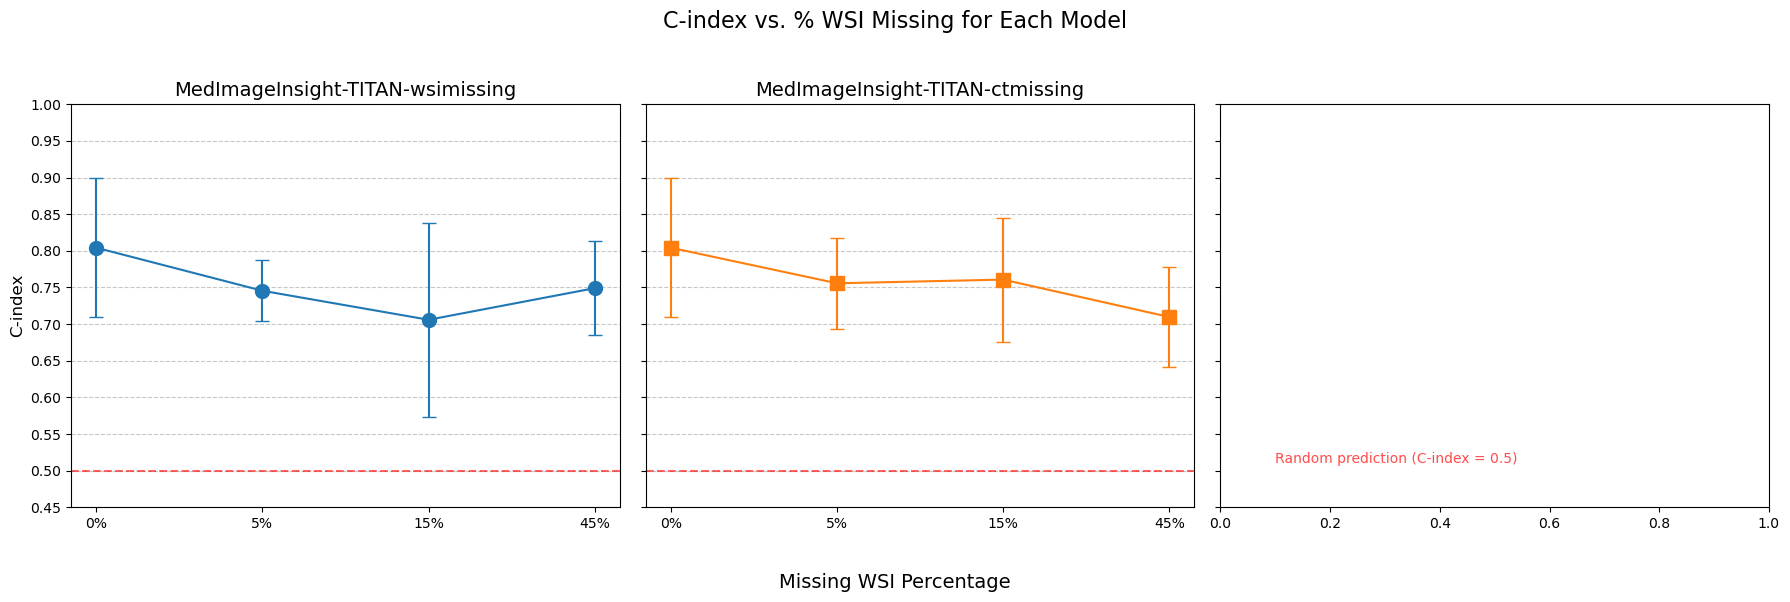

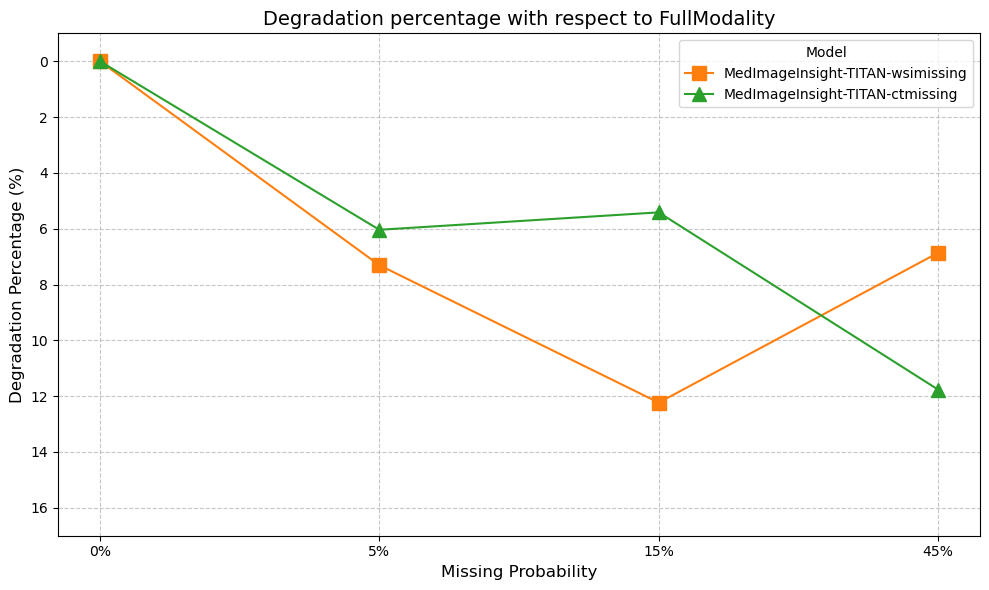

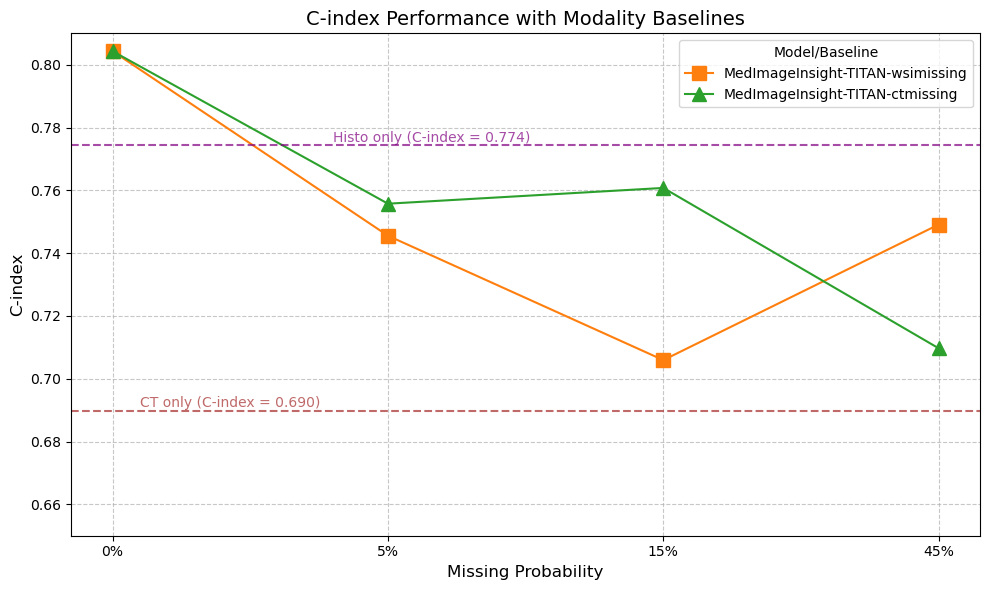

In [18]:
# Andamento performance con wsi missing
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# --- Function to process result JSON ---
def process_result_file(file_content, model_name, condition):
    data = json.loads(file_content) if isinstance(file_content, str) else file_content
    cindex_values = [fold['best_metrics']['val_cindex'] for fold in data['fold_results']]
    return {
        'Model': model_name,
        'Condition': condition,
        'Mean': data['mean_metrics']['val_cindex'],
        'Std': data['std_metrics']['val_cindex'],
        'Values': cindex_values
    }

# --- Define model results ---
models = {
    # "MedImageInsight-Madeleine": [
    #     {"data": json.load(open("./models/ckpts/CPTACPDA_madeleine_medimsights_ctpathobench/cv_results.json")), "condition": "FullModality"},
    #     {"data": json.load(open("./models/ckpts/CPTACPDA_madeleine_medimsights_wsimissing_nvals05/cv_results.json")), "condition": "Missing_WSI_5%"},
    #     {"data": json.load(open("./models/ckpts/CPTACPDA_madeleine_medimsights_wsimissing_nvals15/cv_results.json")), "condition": "Missing_WSI_15%"},
    #     {"data": json.load(open("./models/ckpts/CPTACPDA_madeleine_medimsights_wsimissing_nvals45/cv_results.json")), "condition": "Missing_WSI_45%"},
    # ],
    "MedImageInsight-TITAN-wsimissing": [
        {"data": json.load(open("./models/ckpts/CPTACPDA_medimsight_titan_CTOnly_NEWMODEL2.6Skip/cv_results.json")), "condition": "FullModality"},
        {"data": json.load(open("./models/ckpts/CPTACPDA_medimsights_titan_wsimissing_nvals05_NEWMODEL2.6Skip/cv_results.json")), "condition": "Missing_WSI_5%"},
        {"data": json.load(open("./models/ckpts/CPTACPDA_medimsights_titan_wsimissing_nvals15_NEWMODEL2.6Skip/cv_results.json")), "condition": "Missing_WSI_15%"},
        {"data": json.load(open("./models/ckpts/CPTACPDA_medimsights_titan_wsimissing_nvals45_NEWMODEL2.6Skip/cv_results.json")), "condition": "Missing_WSI_45%"},
    ],
    "MedImageInsight-TITAN-ctmissing": [
        {"data": json.load(open("./models/ckpts/CPTACPDA_medimsight_titan_CTOnly_NEWMODEL2.6Skip/cv_results.json")), "condition": "FullModality"},
        {"data": json.load(open("./models/ckpts/CPTACPDA_medimsights_titan_ctmissing_nvals05_NEWMODEL2.6Skip/cv_results.json")), "condition": "Missing_WSI_5%"},
        {"data": json.load(open("./models/ckpts/CPTACPDA_medimsights_titan_ctmissing_nvals15_NEWMODEL2.6Skip/cv_results.json")), "condition": "Missing_WSI_15%"},
        {"data": json.load(open("./models/ckpts/CPTACPDA_medimsights_titan_ctmissing_nvals45_NEWMODEL2.6Skip/cv_results.json")), "condition": "Missing_WSI_45%"},
    ],
}

# --- Process all results ---
all_results = []
for model_name, entries in models.items():
    for entry in entries:
        result = process_result_file(entry['data'], model_name, entry['condition'])
        all_results.append(result)

df_results = pd.DataFrame(all_results)

# --- Plotting ---
condition_order = ['FullModality', 'Missing_WSI_5%', 'Missing_WSI_15%', 'Missing_WSI_45%']
x_labels = ['0%', '5%', '15%', '45%']
x_vals = np.arange(len(x_labels))

fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
markers = ['o', 's', '^']
models_list = list(models.keys())

for i, model_name in enumerate(models_list):
    ax = axs[i]
    means, stds = [], []

    for cond in condition_order:
        row = next((r for r in all_results if r['Model'] == model_name and r['Condition'] == cond), None)
        if row:
            means.append(row['Mean'])
            stds.append(row['Std'])
        else:
            means.append(np.nan)
            stds.append(0)

    # Connect dots and add error bars
    ax.plot(x_vals, means, color=colors[i], linestyle='-', marker=markers[i], markersize=10, label=model_name)
    ax.errorbar(x_vals, means, yerr=stds, fmt='none', capsize=5, color=colors[i])

    # Titles and axes
    ax.set_title(model_name, fontsize=14)
    ax.set_xticks(x_vals)
    ax.set_xticklabels(x_labels)
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    ax.set_ylim(0.45, 1.0)
    ax.set_yticks(np.arange(0.45, 1.01, 0.05))

    # Add red horizontal line with label only once
    if i == 0:
        ax.axhline(y=0.5, color='red', linestyle='--', label='Random prediction (C-index = 0.5)', alpha=0.6)
        ax.set_ylabel('C-index', fontsize=12)
    else:
        ax.axhline(y=0.5, color='red', linestyle='--', alpha=0.6)
        plt.text(0.1, 0.51, 'Random prediction (C-index = 0.5)', color='r', alpha=0.7)


# Final touches
fig.suptitle('C-index vs. % WSI Missing for Each Model', fontsize=16)
fig.supxlabel('Missing WSI Percentage', fontsize=14)
#axs[0].legend(loc='lower left', fontsize=10)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('cindex_subplots_with_lines.png', dpi=300)
plt.show()


# ----------------------------
# PLOT 2: Degradazione percentuale
# ----------------------------
plt.figure(figsize=(10, 6))

model_colors = {
    #"MedImageInsight-Madeleine": '#1f77b4',
    "MedImageInsight-TITAN-wsimissing": '#ff7f0e',
    "MedImageInsight-TITAN-ctmissing": '#2ca02c'
}

model_markers = {
    #"MedImageInsight-Madeleine": 'o',
    "MedImageInsight-TITAN-wsimissing": 's',
    "MedImageInsight-TITAN-ctmissing": '^'
}

x_labels = ['0%', '5%', '15%', '45%']
condition_order = ['FullModality', 'Missing_WSI_5%', 'Missing_WSI_15%', 'Missing_WSI_45%']

for model_name in models_list:
    baseline_data = next((r for r in all_results if r['Model'] == model_name and r['Condition'] == 'FullModality'), None)
    if baseline_data:
        baseline_value = baseline_data['Mean']
        degradation_y = []
        for cond in condition_order:
            result = next((r for r in all_results if r['Model'] == model_name and r['Condition'] == cond), None)
            if result:
                degradation = (1 - result['Mean'] / baseline_value) * 100
                degradation_y.append(degradation)
            
        plt.plot(x_labels, degradation_y, marker=model_markers[model_name],
                 color=model_colors[model_name], markersize=10, label=model_name)

plt.title('Degradation percentage with respect to FullModality', fontsize=14)
plt.xlabel('Missing Probability', fontsize=12)
plt.ylabel('Degradation Percentage (%)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Model')
plt.ylim([-1,17])
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig('percentage_degradation_points.png', dpi=300)
# ----------------------------
# PLOT 3: Actual C-index performance with baselines (no std)
# ----------------------------
plt.figure(figsize=(10, 6))

# Define baseline values from pathobench
histo_only_cindex = 0.7743257840573744
ct_only_cindex = 0.6898782308029501

# Plot actual C-index values
for model_name in models_list:
    cindex_values = []
    
    for cond in condition_order:
        result = next((r for r in all_results if r['Model'] == model_name and r['Condition'] == cond), None)
        if result:
            cindex_values.append(result['Mean'])
    
    plt.plot(x_labels, cindex_values, marker=model_markers[model_name],
             color=model_colors[model_name], markersize=10, label=model_name)

# Add baseline dotted lines
plt.axhline(y=histo_only_cindex, color='purple', linestyle='--', alpha=0.7)
plt.text(0.8, histo_only_cindex +0.001, f'Histo only (C-index = {histo_only_cindex:.3f})', color='purple', alpha=0.7)

plt.axhline(y=ct_only_cindex, color='brown', linestyle='--', alpha=0.7)
plt.text(0.1, ct_only_cindex +0.001, f'CT only (C-index = {ct_only_cindex:.3f})', color='brown', alpha=0.7)

plt.title('C-index Performance with Modality Baselines', fontsize=14)
plt.xlabel('Missing Probability', fontsize=12)
plt.ylabel('C-index', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Model/Baseline')
plt.ylim([0.65, 0.81])
plt.tight_layout()
plt.savefig('cindex_with_baselines.png', dpi=300)

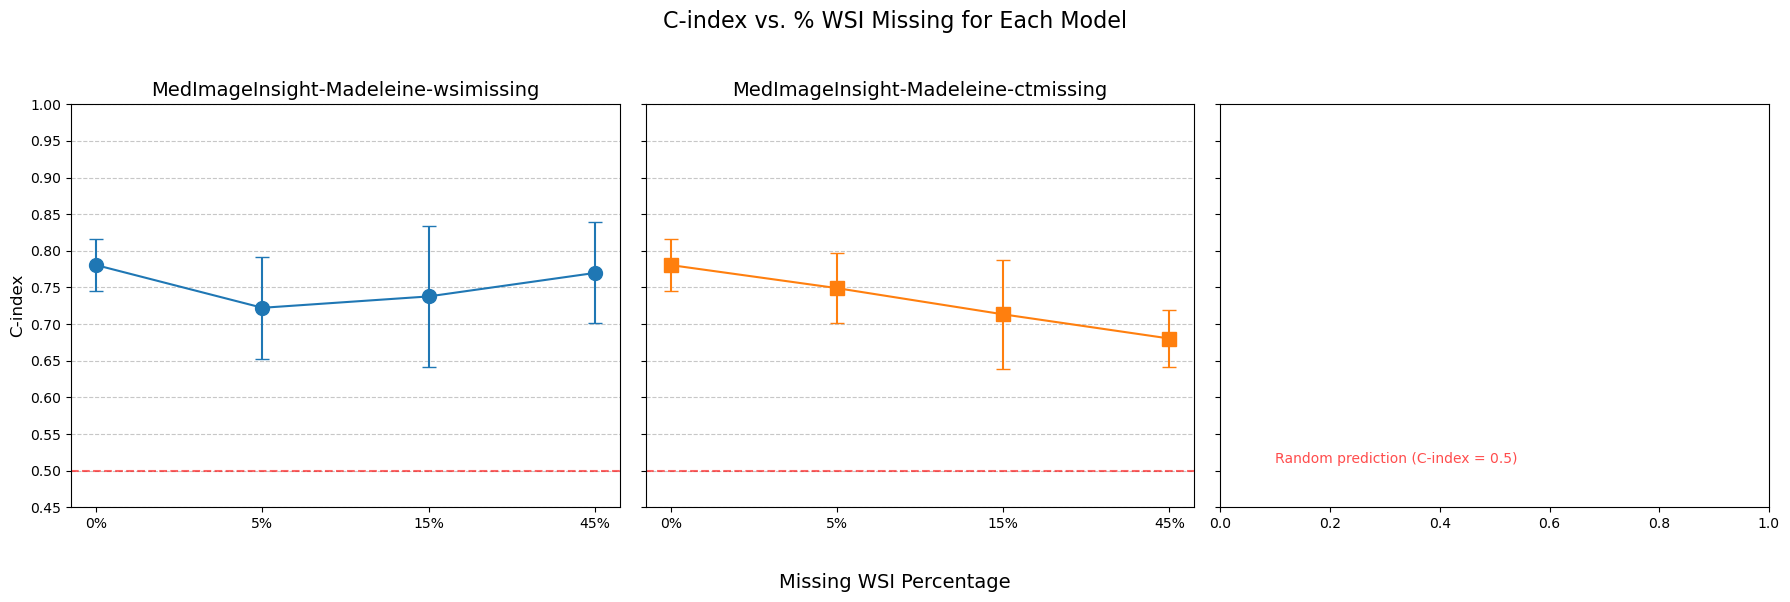

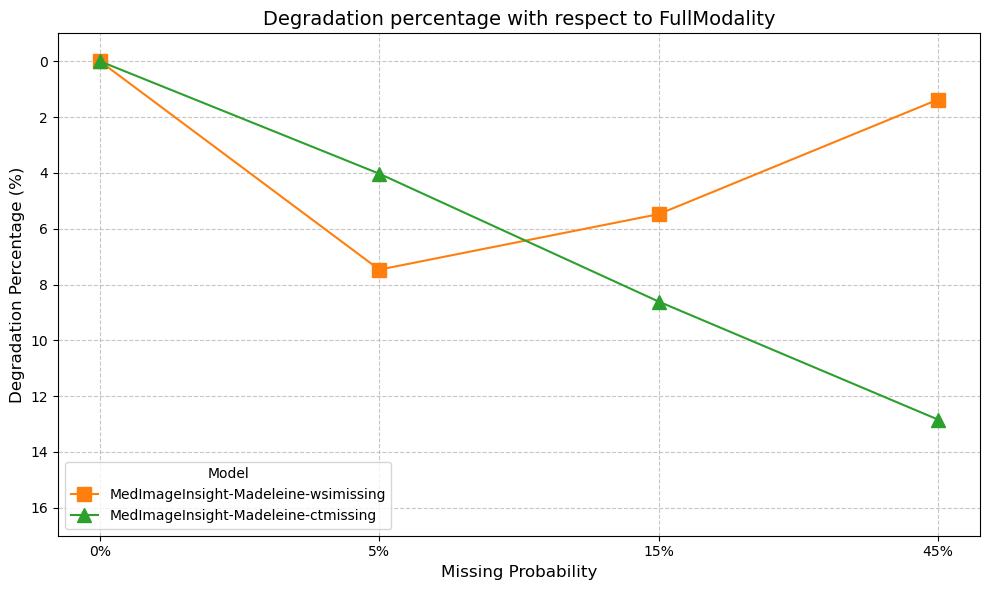

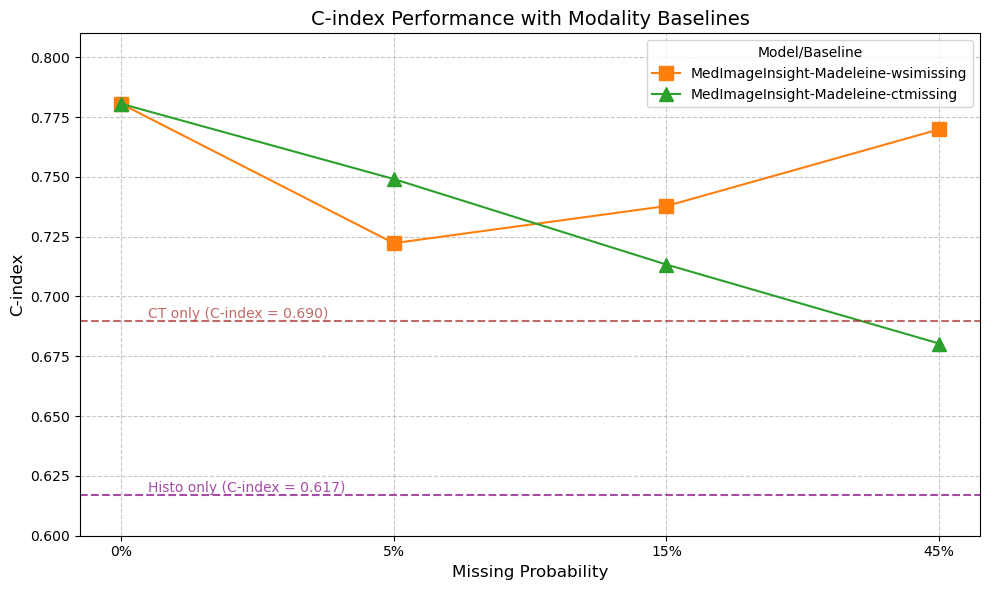

In [26]:
# Andamento performance con wsi missing
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# --- Function to process result JSON ---
def process_result_file(file_content, model_name, condition):
    data = json.loads(file_content) if isinstance(file_content, str) else file_content
    cindex_values = [fold['best_metrics']['val_cindex'] for fold in data['fold_results']]
    return {
        'Model': model_name,
        'Condition': condition,
        'Mean': data['mean_metrics']['val_cindex'],
        'Std': data['std_metrics']['val_cindex'],
        'Values': cindex_values
    }

# --- Define model results ---
models = {
    # "MedImageInsight-Madeleine": [
    #     {"data": json.load(open("./models/ckpts/CPTACPDA_madeleine_medimsights_ctpathobench/cv_results.json")), "condition": "FullModality"},
    #     {"data": json.load(open("./models/ckpts/CPTACPDA_madeleine_medimsights_wsimissing_nvals05/cv_results.json")), "condition": "Missing_WSI_5%"},
    #     {"data": json.load(open("./models/ckpts/CPTACPDA_madeleine_medimsights_wsimissing_nvals15/cv_results.json")), "condition": "Missing_WSI_15%"},
    #     {"data": json.load(open("./models/ckpts/CPTACPDA_madeleine_medimsights_wsimissing_nvals45/cv_results.json")), "condition": "Missing_WSI_45%"},
    # ],
    "MedImageInsight-Madeleine-wsimissing": [
        {"data": json.load(open("./models/ckpts/CPTACPDA_medimsights_madeleine_ctonly_NEWMODEL2.6Skip/cv_results.json")), "condition": "FullModality"},
        {"data": json.load(open("./models/ckpts/CPTACPDA_medimsights_madeleine_wsimissing_nvals05_NEWMODEL2.6Skip/cv_results.json")), "condition": "Missing_WSI_5%"},
        {"data": json.load(open("./models/ckpts/CPTACPDA_medimsights_madeleine_wsimissing_nvals15_NEWMODEL2.6Skip/cv_results.json")), "condition": "Missing_WSI_15%"},
        {"data": json.load(open("./models/ckpts/CPTACPDA_medimsights_madeleine_wsimissing_nvals45_NEWMODEL2.6Skip/cv_results.json")), "condition": "Missing_WSI_45%"},
    ],
    "MedImageInsight-Madeleine-ctmissing": [
        {"data": json.load(open("./models/ckpts/CPTACPDA_medimsights_madeleine_ctonly_NEWMODEL2.6Skip/cv_results.json")), "condition": "FullModality"},
        {"data": json.load(open("./models/ckpts/CPTACPDA_medimsights_madeleine_ctmissing_nvals05_NEWMODEL2.6Skip/cv_results.json")), "condition": "Missing_WSI_5%"},
        {"data": json.load(open("./models/ckpts/CPTACPDA_medimsights_madeleine_ctmissing_nvals15_NEWMODEL2.6Skip/cv_results.json")), "condition": "Missing_WSI_15%"},
        {"data": json.load(open("./models/ckpts/CPTACPDA_medimsights_madeleine_ctmissing_nvals45_NEWMODEL2.6Skip/cv_results.json")), "condition": "Missing_WSI_45%"},
    ],
}

# --- Process all results ---
all_results = []
for model_name, entries in models.items():
    for entry in entries:
        result = process_result_file(entry['data'], model_name, entry['condition'])
        all_results.append(result)

df_results = pd.DataFrame(all_results)

# --- Plotting ---
condition_order = ['FullModality', 'Missing_WSI_5%', 'Missing_WSI_15%', 'Missing_WSI_45%']
x_labels = ['0%', '5%', '15%', '45%']
x_vals = np.arange(len(x_labels))

fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
markers = ['o', 's', '^']
models_list = list(models.keys())

for i, model_name in enumerate(models_list):
    ax = axs[i]
    means, stds = [], []

    for cond in condition_order:
        row = next((r for r in all_results if r['Model'] == model_name and r['Condition'] == cond), None)
        if row:
            means.append(row['Mean'])
            stds.append(row['Std'])
        else:
            means.append(np.nan)
            stds.append(0)

    # Connect dots and add error bars
    ax.plot(x_vals, means, color=colors[i], linestyle='-', marker=markers[i], markersize=10, label=model_name)
    ax.errorbar(x_vals, means, yerr=stds, fmt='none', capsize=5, color=colors[i])

    # Titles and axes
    ax.set_title(model_name, fontsize=14)
    ax.set_xticks(x_vals)
    ax.set_xticklabels(x_labels)
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    ax.set_ylim(0.45, 1.0)
    ax.set_yticks(np.arange(0.45, 1.01, 0.05))

    # Add red horizontal line with label only once
    if i == 0:
        ax.axhline(y=0.5, color='red', linestyle='--', label='Random prediction (C-index = 0.5)', alpha=0.6)
        ax.set_ylabel('C-index', fontsize=12)
    else:
        ax.axhline(y=0.5, color='red', linestyle='--', alpha=0.6)
        plt.text(0.1, 0.51, 'Random prediction (C-index = 0.5)', color='r', alpha=0.7)


# Final touches
fig.suptitle('C-index vs. % WSI Missing for Each Model', fontsize=16)
fig.supxlabel('Missing WSI Percentage', fontsize=14)
#axs[0].legend(loc='lower left', fontsize=10)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('cindex_subplots_with_lines.png', dpi=300)
plt.show()


# ----------------------------
# PLOT 2: Degradazione percentuale
# ----------------------------
plt.figure(figsize=(10, 6))

model_colors = {
    #"MedImageInsight-Madeleine": '#1f77b4',
    "MedImageInsight-Madeleine-wsimissing": '#ff7f0e',
    "MedImageInsight-Madeleine-ctmissing": '#2ca02c'
}

model_markers = {
    #"MedImageInsight-Madeleine": 'o',
    "MedImageInsight-Madeleine-wsimissing": 's',
    "MedImageInsight-Madeleine-ctmissing": '^'
}

x_labels = ['0%', '5%', '15%', '45%']
condition_order = ['FullModality', 'Missing_WSI_5%', 'Missing_WSI_15%', 'Missing_WSI_45%']

for model_name in models_list:
    baseline_data = next((r for r in all_results if r['Model'] == model_name and r['Condition'] == 'FullModality'), None)
    if baseline_data:
        baseline_value = baseline_data['Mean']
        degradation_y = []
        for cond in condition_order:
            result = next((r for r in all_results if r['Model'] == model_name and r['Condition'] == cond), None)
            if result:
                degradation = (1 - result['Mean'] / baseline_value) * 100
                degradation_y.append(degradation)
            
        plt.plot(x_labels, degradation_y, marker=model_markers[model_name],
                 color=model_colors[model_name], markersize=10, label=model_name)

plt.title('Degradation percentage with respect to FullModality', fontsize=14)
plt.xlabel('Missing Probability', fontsize=12)
plt.ylabel('Degradation Percentage (%)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Model')
plt.ylim([-1,17])
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig('percentage_degradation_points.png', dpi=300)
# ----------------------------
# PLOT 3: Actual C-index performance with baselines (no std)
# ----------------------------
plt.figure(figsize=(10, 6))

# Define baseline values from pathobench
histo_only_cindex = 0.6171147936166379
ct_only_cindex = 0.6898782308029501

# Plot actual C-index values
for model_name in models_list:
    cindex_values = []
    
    for cond in condition_order:
        result = next((r for r in all_results if r['Model'] == model_name and r['Condition'] == cond), None)
        if result:
            cindex_values.append(result['Mean'])
    
    plt.plot(x_labels, cindex_values, marker=model_markers[model_name],
             color=model_colors[model_name], markersize=10, label=model_name)

# Add baseline dotted lines
plt.axhline(y=histo_only_cindex, color='purple', linestyle='--', alpha=0.7)
plt.text(0.1, histo_only_cindex +0.001, f'Histo only (C-index = {histo_only_cindex:.3f})', color='purple', alpha=0.7)

plt.axhline(y=ct_only_cindex, color='brown', linestyle='--', alpha=0.7)
plt.text(0.1, ct_only_cindex +0.001, f'CT only (C-index = {ct_only_cindex:.3f})', color='brown', alpha=0.7)

plt.title('C-index Performance with Modality Baselines', fontsize=14)
plt.xlabel('Missing Probability', fontsize=12)
plt.ylabel('C-index', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Model/Baseline')
plt.ylim([0.60, 0.81])
plt.tight_layout()
plt.savefig('cindex_with_baselines.png', dpi=300)

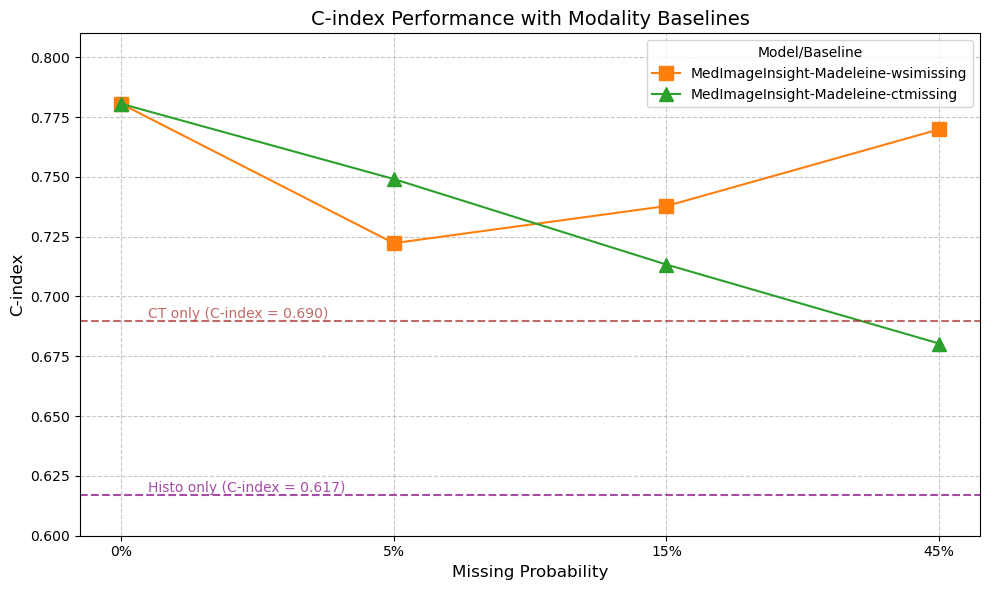

In [3]:
# Andamento performance con wsi missing
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# --- Function to process result JSON ---
def process_result_file(file_content, model_name, condition):
    data = json.loads(file_content) if isinstance(file_content, str) else file_content
    cindex_values = [fold['best_metrics']['val_cindex'] for fold in data['fold_results']]
    return {
        'Model': model_name,
        'Condition': condition,
        'Mean': data['mean_metrics']['val_cindex'],
        'Std': data['std_metrics']['val_cindex'],
        'Values': cindex_values
    }

# --- Define model results ---
models = {
    # "MedImageInsight-Madeleine": [
    #     {"data": json.load(open("./models/ckpts/CPTACPDA_madeleine_medimsights_ctpathobench/cv_results.json")), "condition": "FullModality"},
    #     {"data": json.load(open("./models/ckpts/CPTACPDA_madeleine_medimsights_wsimissing_nvals05/cv_results.json")), "condition": "Missing_WSI_5%"},
    #     {"data": json.load(open("./models/ckpts/CPTACPDA_madeleine_medimsights_wsimissing_nvals15/cv_results.json")), "condition": "Missing_WSI_15%"},
    #     {"data": json.load(open("./models/ckpts/CPTACPDA_madeleine_medimsights_wsimissing_nvals45/cv_results.json")), "condition": "Missing_WSI_45%"},
    # ],
    "MedImageInsight-Madeleine-wsimissing": [
        {"data": json.load(open("./models/ckpts/CPTACPDA_medimsights_madeleine_ctonly_NEWMODEL2.6Skip/cv_results.json")), "condition": "FullModality"},
        {"data": json.load(open("./models/ckpts/CPTACPDA_medimsights_madeleine_wsimissing_nvals05_NEWMODEL2.6Skip/cv_results.json")), "condition": "Missing_WSI_5%"},
        {"data": json.load(open("./models/ckpts/CPTACPDA_medimsights_madeleine_wsimissing_nvals15_NEWMODEL2.6Skip/cv_results.json")), "condition": "Missing_WSI_15%"},
        {"data": json.load(open("./models/ckpts/CPTACPDA_medimsights_madeleine_wsimissing_nvals45_NEWMODEL2.6Skip/cv_results.json")), "condition": "Missing_WSI_45%"},
    ],
    "MedImageInsight-Madeleine-ctmissing": [
        {"data": json.load(open("./models/ckpts/CPTACPDA_medimsights_madeleine_ctonly_NEWMODEL2.6Skip/cv_results.json")), "condition": "FullModality"},
        {"data": json.load(open("./models/ckpts/CPTACPDA_medimsights_madeleine_ctmissing_nvals05_NEWMODEL2.6Skip/cv_results.json")), "condition": "Missing_WSI_5%"},
        {"data": json.load(open("./models/ckpts/CPTACPDA_medimsights_madeleine_ctmissing_nvals15_NEWMODEL2.6Skip/cv_results.json")), "condition": "Missing_WSI_15%"},
        {"data": json.load(open("./models/ckpts/CPTACPDA_medimsights_madeleine_ctmissing_nvals45_NEWMODEL2.6Skip/cv_results.json")), "condition": "Missing_WSI_45%"},
    ],
}

# --- Process all results ---
all_results = []
for model_name, entries in models.items():
    for entry in entries:
        result = process_result_file(entry['data'], model_name, entry['condition'])
        all_results.append(result)

df_results = pd.DataFrame(all_results)

condition_order = ['FullModality', 'Missing_WSI_5%', 'Missing_WSI_15%', 'Missing_WSI_45%']
x_labels = ['0%', '5%', '15%', '45%']
x_vals = np.arange(len(x_labels))

#fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
markers = ['o', 's', '^']
models_list = list(models.keys())

model_colors = {
    #"MedImageInsight-Madeleine": '#1f77b4',
    "MedImageInsight-Madeleine-wsimissing": '#ff7f0e',
    "MedImageInsight-Madeleine-ctmissing": '#2ca02c'
}

model_markers = {
    #"MedImageInsight-Madeleine": 'o',
    "MedImageInsight-Madeleine-wsimissing": 's',
    "MedImageInsight-Madeleine-ctmissing": '^'
}

x_labels = ['0%', '5%', '15%', '45%']
condition_order = ['FullModality', 'Missing_WSI_5%', 'Missing_WSI_15%', 'Missing_WSI_45%']


# ----------------------------
# PLOT 3: Actual C-index performance with baselines (no std)
# ----------------------------
plt.figure(figsize=(10, 6))

# Define baseline values from pathobench
histo_only_cindex = 0.6171147936166379
ct_only_cindex = 0.6898782308029501

# Plot actual C-index values
for model_name in models_list:
    cindex_values = []
    
    for cond in condition_order:
        result = next((r for r in all_results if r['Model'] == model_name and r['Condition'] == cond), None)
        if result:
            cindex_values.append(result['Mean'])
    
    plt.plot(x_labels, cindex_values, marker=model_markers[model_name],
             color=model_colors[model_name], markersize=10, label=model_name)

# Add baseline dotted lines
plt.axhline(y=histo_only_cindex, color='purple', linestyle='--', alpha=0.7)
plt.text(0.1, histo_only_cindex +0.001, f'Histo only (C-index = {histo_only_cindex:.3f})', color='purple', alpha=0.7)

plt.axhline(y=ct_only_cindex, color='brown', linestyle='--', alpha=0.7)
plt.text(0.1, ct_only_cindex +0.001, f'CT only (C-index = {ct_only_cindex:.3f})', color='brown', alpha=0.7)

plt.title('C-index Performance with Modality Baselines', fontsize=14)
plt.xlabel('Missing Probability', fontsize=12)
plt.ylabel('C-index', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Model/Baseline')
plt.ylim([0.60, 0.81])
plt.tight_layout()
plt.savefig('cindex_with_baselines.png', dpi=300)

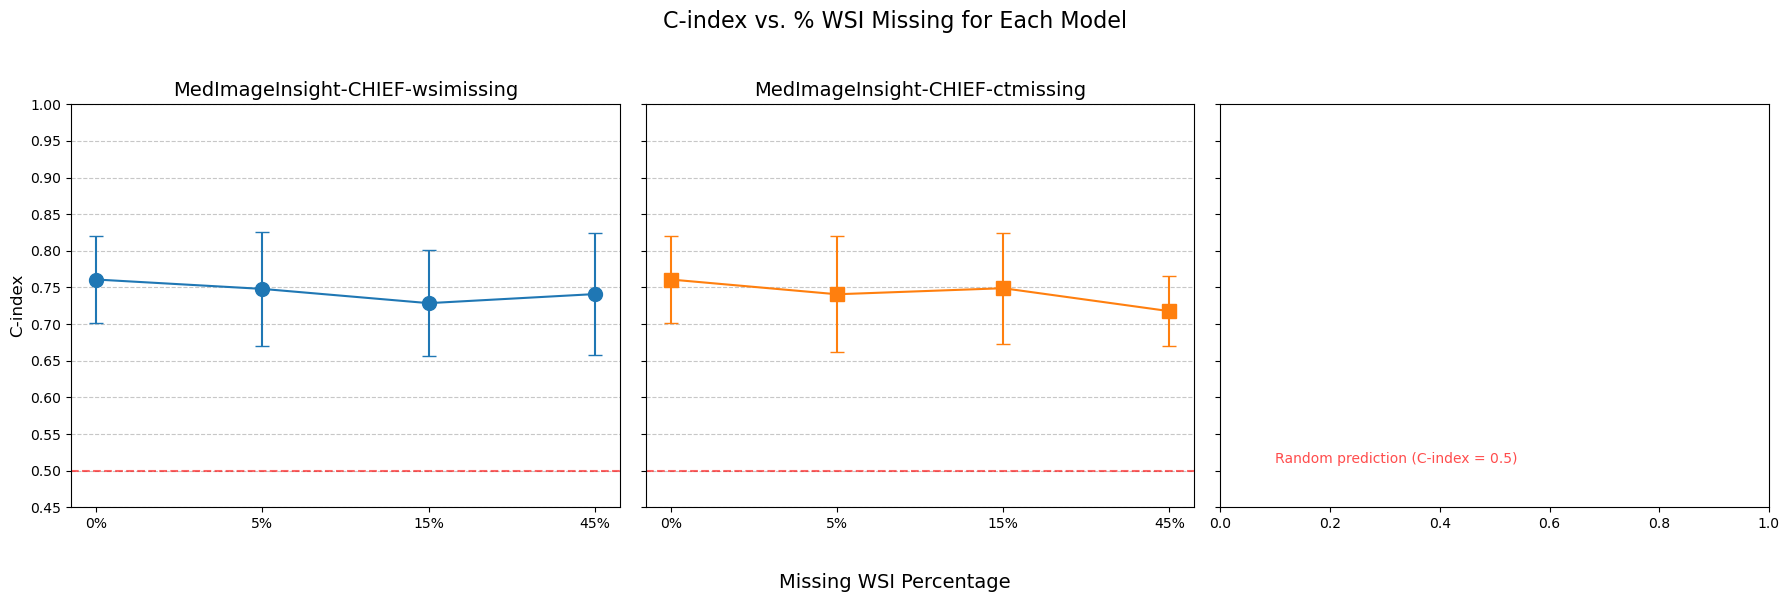

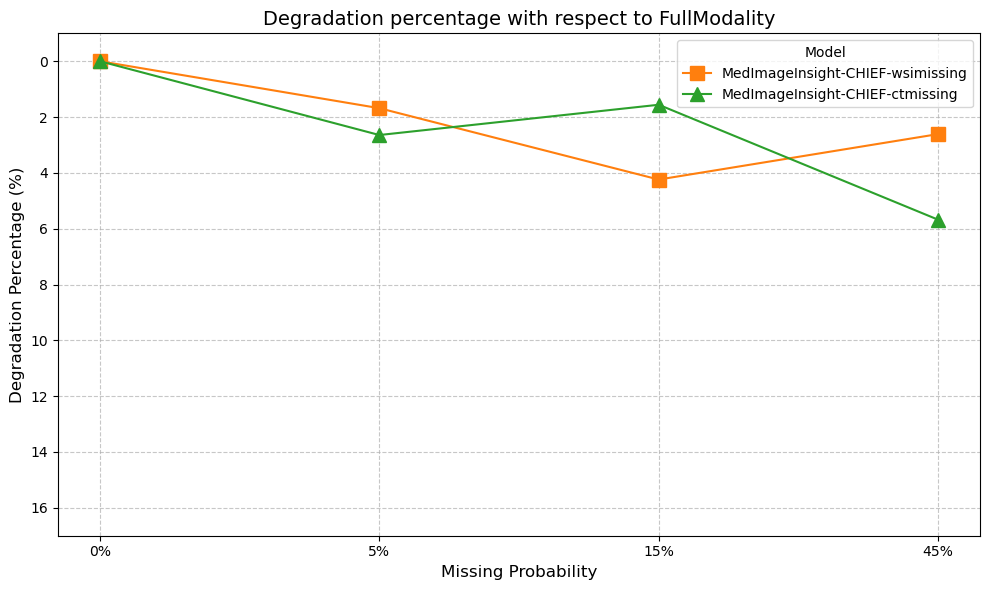

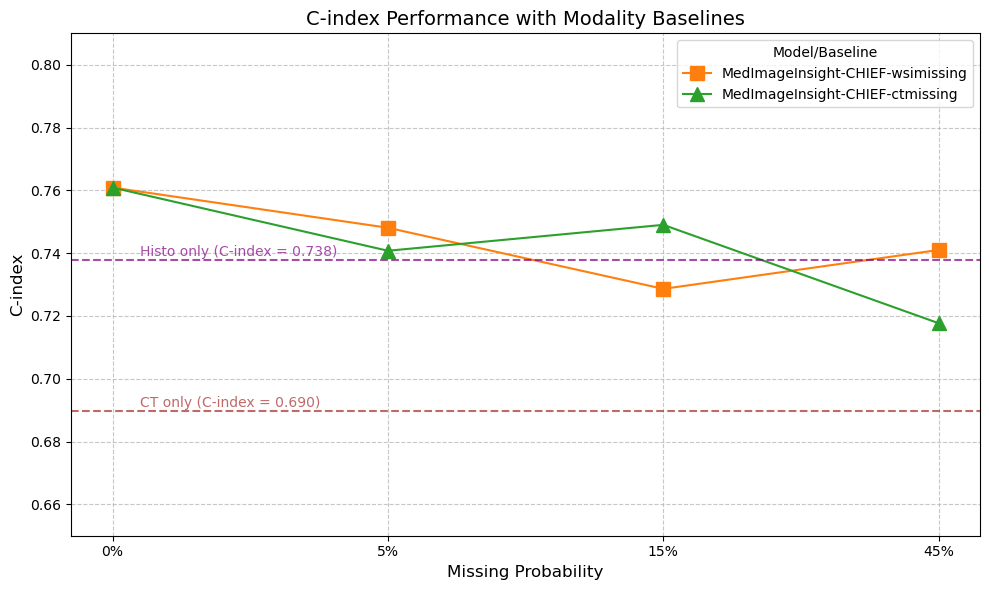

In [25]:
# Andamento performance con wsi missing
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# --- Function to process result JSON ---
def process_result_file(file_content, model_name, condition):
    data = json.loads(file_content) if isinstance(file_content, str) else file_content
    cindex_values = [fold['best_metrics']['val_cindex'] for fold in data['fold_results']]
    return {
        'Model': model_name,
        'Condition': condition,
        'Mean': data['mean_metrics']['val_cindex'],
        'Std': data['std_metrics']['val_cindex'],
        'Values': cindex_values
    }

# --- Define model results ---
models = {
    # "MedImageInsight-Madeleine": [
    #     {"data": json.load(open("./models/ckpts/CPTACPDA_madeleine_medimsights_ctpathobench/cv_results.json")), "condition": "FullModality"},
    #     {"data": json.load(open("./models/ckpts/CPTACPDA_madeleine_medimsights_wsimissing_nvals05/cv_results.json")), "condition": "Missing_WSI_5%"},
    #     {"data": json.load(open("./models/ckpts/CPTACPDA_madeleine_medimsights_wsimissing_nvals15/cv_results.json")), "condition": "Missing_WSI_15%"},
    #     {"data": json.load(open("./models/ckpts/CPTACPDA_madeleine_medimsights_wsimissing_nvals45/cv_results.json")), "condition": "Missing_WSI_45%"},
    # ],
    "MedImageInsight-CHIEF-wsimissing": [
        {"data": json.load(open("./models/ckpts/CPTACPDA_medimsights_chief_ctonly_NEWMODEL2.6Skip/cv_results.json")), "condition": "FullModality"},
        {"data": json.load(open("./models/ckpts/CPTACPDA_medimsights_chief_wsimissing_nvals05_NEWMODEL2.6Skip/cv_results.json")), "condition": "Missing_WSI_5%"},
        {"data": json.load(open("./models/ckpts/CPTACPDA_medimsights_chief_wsimissing_nvals15_NEWMODEL2.6Skip/cv_results.json")), "condition": "Missing_WSI_15%"},
        {"data": json.load(open("./models/ckpts/CPTACPDA_medimsights_chief_wsimissing_nvals45_NEWMODEL2.6Skip/cv_results.json")), "condition": "Missing_WSI_45%"},
    ],
    "MedImageInsight-CHIEF-ctmissing": [
        {"data": json.load(open("./models/ckpts/CPTACPDA_medimsights_chief_ctonly_NEWMODEL2.6Skip/cv_results.json")), "condition": "FullModality"},
        {"data": json.load(open("./models/ckpts/CPTACPDA_medimsight_chief_ctmissing_nvals05_NEMODEL2.6Skip/cv_results.json")), "condition": "Missing_WSI_5%"},
        {"data": json.load(open("./models/ckpts/CPTACPDA_medimsight_chief_ctmissing_nvals15_NEMODEL2.6Skip/cv_results.json")), "condition": "Missing_WSI_15%"},
        {"data": json.load(open("./models/ckpts/CPTACPDA_medimsight_chief_ctmissing_nvals45_NEMODEL2.6Skip/cv_results.json")), "condition": "Missing_WSI_45%"},
    ],
}

# --- Process all results ---
all_results = []
for model_name, entries in models.items():
    for entry in entries:
        result = process_result_file(entry['data'], model_name, entry['condition'])
        all_results.append(result)

df_results = pd.DataFrame(all_results)

# --- Plotting ---
condition_order = ['FullModality', 'Missing_WSI_5%', 'Missing_WSI_15%', 'Missing_WSI_45%']
x_labels = ['0%', '5%', '15%', '45%']
x_vals = np.arange(len(x_labels))

fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
markers = ['o', 's', '^']
models_list = list(models.keys())

for i, model_name in enumerate(models_list):
    ax = axs[i]
    means, stds = [], []

    for cond in condition_order:
        row = next((r for r in all_results if r['Model'] == model_name and r['Condition'] == cond), None)
        if row:
            means.append(row['Mean'])
            stds.append(row['Std'])
        else:
            means.append(np.nan)
            stds.append(0)

    # Connect dots and add error bars
    ax.plot(x_vals, means, color=colors[i], linestyle='-', marker=markers[i], markersize=10, label=model_name)
    ax.errorbar(x_vals, means, yerr=stds, fmt='none', capsize=5, color=colors[i])

    # Titles and axes
    ax.set_title(model_name, fontsize=14)
    ax.set_xticks(x_vals)
    ax.set_xticklabels(x_labels)
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    ax.set_ylim(0.45, 1.0)
    ax.set_yticks(np.arange(0.45, 1.01, 0.05))

    # Add red horizontal line with label only once
    if i == 0:
        ax.axhline(y=0.5, color='red', linestyle='--', label='Random prediction (C-index = 0.5)', alpha=0.6)
        ax.set_ylabel('C-index', fontsize=12)
    else:
        ax.axhline(y=0.5, color='red', linestyle='--', alpha=0.6)
        plt.text(0.1, 0.51, 'Random prediction (C-index = 0.5)', color='r', alpha=0.7)


# Final touches
fig.suptitle('C-index vs. % WSI Missing for Each Model', fontsize=16)
fig.supxlabel('Missing WSI Percentage', fontsize=14)
#axs[0].legend(loc='lower left', fontsize=10)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('cindex_subplots_with_lines.png', dpi=300)
plt.show()


# ----------------------------
# PLOT 2: Degradazione percentuale
# ----------------------------
plt.figure(figsize=(10, 6))

model_colors = {
    #"MedImageInsight-Madeleine": '#1f77b4',
    "MedImageInsight-CHIEF-wsimissing": '#ff7f0e',
    "MedImageInsight-CHIEF-ctmissing": '#2ca02c'
}

model_markers = {
    #"MedImageInsight-Madeleine": 'o',
    "MedImageInsight-CHIEF-wsimissing": 's',
    "MedImageInsight-CHIEF-ctmissing": '^'
}

x_labels = ['0%', '5%', '15%', '45%']
condition_order = ['FullModality', 'Missing_WSI_5%', 'Missing_WSI_15%', 'Missing_WSI_45%']

for model_name in models_list:
    baseline_data = next((r for r in all_results if r['Model'] == model_name and r['Condition'] == 'FullModality'), None)
    if baseline_data:
        baseline_value = baseline_data['Mean']
        degradation_y = []
        for cond in condition_order:
            result = next((r for r in all_results if r['Model'] == model_name and r['Condition'] == cond), None)
            if result:
                degradation = (1 - result['Mean'] / baseline_value) * 100
                degradation_y.append(degradation)
            
        plt.plot(x_labels, degradation_y, marker=model_markers[model_name],
                 color=model_colors[model_name], markersize=10, label=model_name)

plt.title('Degradation percentage with respect to FullModality', fontsize=14)
plt.xlabel('Missing Probability', fontsize=12)
plt.ylabel('Degradation Percentage (%)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Model')
plt.ylim([-1,17])
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig('percentage_degradation_points.png', dpi=300)
# ----------------------------
# PLOT 3: Actual C-index performance with baselines (no std)
# ----------------------------
plt.figure(figsize=(10, 6))

# Define baseline values from pathobench
histo_only_cindex = 0.7379541924860094
ct_only_cindex = 0.6898782308029501

# Plot actual C-index values
for model_name in models_list:
    cindex_values = []
    
    for cond in condition_order:
        result = next((r for r in all_results if r['Model'] == model_name and r['Condition'] == cond), None)
        if result:
            cindex_values.append(result['Mean'])
    
    plt.plot(x_labels, cindex_values, marker=model_markers[model_name],
             color=model_colors[model_name], markersize=10, label=model_name)

# Add baseline dotted lines
plt.axhline(y=histo_only_cindex, color='purple', linestyle='--', alpha=0.7)
plt.text(0.1, histo_only_cindex +0.001, f'Histo only (C-index = {histo_only_cindex:.3f})', color='purple', alpha=0.7)

plt.axhline(y=ct_only_cindex, color='brown', linestyle='--', alpha=0.7)
plt.text(0.1, ct_only_cindex +0.001, f'CT only (C-index = {ct_only_cindex:.3f})', color='brown', alpha=0.7)

plt.title('C-index Performance with Modality Baselines', fontsize=14)
plt.xlabel('Missing Probability', fontsize=12)
plt.ylabel('C-index', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Model/Baseline')
plt.ylim([0.65, 0.81])
plt.tight_layout()
plt.savefig('cindex_with_baselines.png', dpi=300)

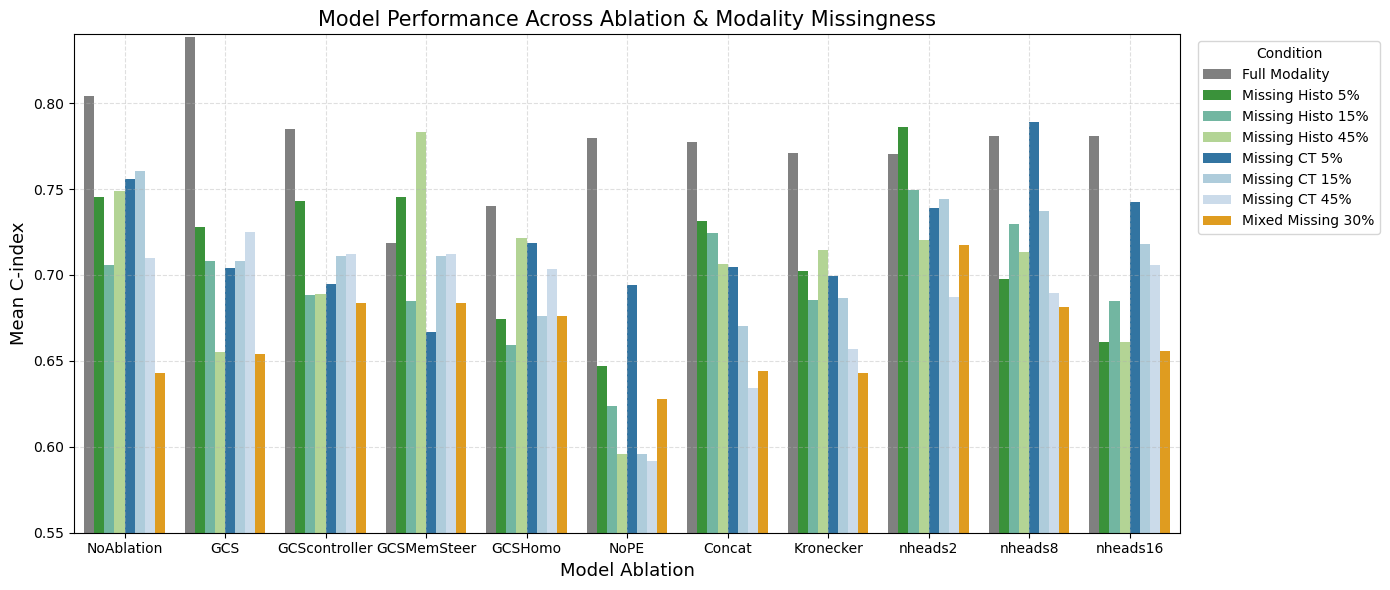

In [ ]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# --- Function to process result JSON ---
def process_result_file(file_path, model_name, condition):
    try:
        with open(file_path) as f:
            data = json.load(f)
        cindex_values = [fold['best_metrics']['val_cindex'] for fold in data['fold_results']]
        return {
            'Model': model_name,
            'Condition': condition,
            'Mean': data['mean_metrics']['val_cindex'],
        }
    except Exception as e:
        print(f"Error loading {file_path}: {e}")
        return None

# --- Define model groups and their paths ---
model_groups = {
    "NoAblation": {
        "base": "./models/ckpts/CPTACPDA_medimsight_titan_CTOnly_NEWMODEL2.6Skip/cv_results.json",
        "histomissing5": "./models/ckpts/CPTACPDA_medimsights_titan_wsimissing_nvals05_NEWMODEL2.6Skip/cv_results.json",
        "histomissing15": "./models/ckpts/CPTACPDA_medimsights_titan_wsimissing_nvals15_NEWMODEL2.6Skip/cv_results.json",
        "histomissing45": "./models/ckpts/CPTACPDA_medimsights_titan_wsimissing_nvals45_NEWMODEL2.6Skip/cv_results.json",
        "ctmissing5":  "./models/ckpts/CPTACPDA_medimsights_titan_ctmissing_nvals05_NEWMODEL2.6Skip/cv_results.json",
        "ctmissing15": "./models/ckpts/CPTACPDA_medimsights_titan_ctmissing_nvals15_NEWMODEL2.6Skip/cv_results.json",
        "ctmissing45": "./models/ckpts/CPTACPDA_medimsights_titan_ctmissing_nvals45_NEWMODEL2.6Skip/cv_results.json",
        "mixedmissing":  "./models/ckpts/CPTACPDA_medimsight_titan_CTOnly_NEWMODEL2.6Skip_bothmissing30/cv_results.json"
    },
    "GCS": {
        "base": "./models/ckpts/CPTACPDA_medimsight_titan_CTOnly_NEWMODEL2.6Skip_GCS/cv_results.json",
        "histomissing5": "./models/ckpts/CPTACPDA_medimsight_titan_CTOnly_NEWMODEL2.6Skip_GCS_ctmissing5/cv_results.json",
        "histomissing15": "./models/ckpts/CPTACPDA_medimsight_titan_CTOnly_NEWMODEL2.6Skip_GCS_ctmissing15/cv_results.json",
        "histomissing45": "./models/ckpts/CPTACPDA_medimsight_titan_CTOnly_NEWMODEL2.6Skip_GCS_ctmissing45/cv_results.json",
        "ctmissing5":  "./models/ckpts/CPTACPDA_medimsight_titan_CTOnly_NEWMODEL2.6Skip_GCS_histomissing5/cv_results.json",
        "ctmissing15": "./models/ckpts/CPTACPDA_medimsight_titan_CTOnly_NEWMODEL2.6Skip_GCS_histomissing15/cv_results.json",
        "ctmissing45": "./models/ckpts/CPTACPDA_medimsight_titan_CTOnly_NEWMODEL2.6Skip_GCS_histomissing45/cv_results.json",
        "mixedmissing":  "./models/ckpts/CPTACPDA_medimsight_titan_CTOnly_NEWMODEL2.6Skip_GCS_bothmissing30/cv_results.json"
    },
    "GCScontroller": {
        "base": "./models/ckpts/CPTACPDA_medimsight_titan_CTOnly_NEWMODEL2.6Skip_GCS_controller/cv_results.json",
        "histomissing5": "./models/ckpts/CPTACPDA_medimsight_titan_CTOnly_NEWMODEL2.6Skip_GCScontroller_histomissing5/cv_results.json",
        "histomissing15": "./models/ckpts/CPTACPDA_medimsight_titan_CTOnly_NEWMODEL2.6Skip_GCScontroller_histomissing15/cv_results.json",
        "histomissing45": "./models/ckpts/CPTACPDA_medimsight_titan_CTOnly_NEWMODEL2.6Skip_GCScontroller_histomissing45/cv_results.json",
        "ctmissing5":  "./models/ckpts/CPTACPDA_medimsight_titan_CTOnly_NEWMODEL2.6Skip_GCS_controller_ctmissing5/cv_results.json",
        "ctmissing15": "./models/ckpts/CPTACPDA_medimsight_titan_CTOnly_NEWMODEL2.6Skip_GCScontroller_ctmissing15/cv_results.json",
        "ctmissing45": "./models/ckpts/CPTACPDA_medimsight_titan_CTOnly_NEWMODEL2.6Skip_GCScontroller_ctmissing45/cv_results.json",
        "mixedmissing":  "./models/ckpts/CPTACPDA_medimsight_titan_CTOnly_NEWMODEL2.6Skip_GCScontroller_bothmissing30/cv_results.json"
    },
    "GCSMemSteer": {
        "base": "./models/ckpts/CPTACPDA_medimsight_titan_CTOnly_NEWMODEL2.6Skip_GCSHomo/cv_results.json",
        "histomissing5": "./models/ckpts/CPTACPDA_medimsight_titan_CTOnly_NEWMODEL2.6Skip_GCSHomo_histomissing5/cv_results.json",
        "histomissing15": "./models/ckpts/CPTACPDA_medimsight_titan_CTOnly_NEWMODEL2.6Skip_GCSHomo_histomissing15/cv_results.json",
        "histomissing45": "./models/ckpts/CPTACPDA_medimsight_titan_CTOnly_NEWMODEL2.6Skip_GCSHomo_histomissing45/cv_results.json",
        "ctmissing5":  "./models/ckpts/CPTACPDA_medimsight_titan_CTOnly_NEWMODEL2.6Skip_GCScontroller_ctmissing5/cv_results.json",
        "ctmissing15": "./models/ckpts/CPTACPDA_medimsight_titan_CTOnly_NEWMODEL2.6Skip_GCScontroller_ctmissing15/cv_results.json",
        "ctmissing45": "./models/ckpts/CPTACPDA_medimsight_titan_CTOnly_NEWMODEL2.6Skip_GCScontroller_ctmissing45/cv_results.json",
        "mixedmissing":  "./models/ckpts/CPTACPDA_medimsight_titan_CTOnly_NEWMODEL2.6Skip_GCScontroller_bothmissing30/cv_results.json"
    },
    "GCSHomo": {
        "base": "./models/ckpts/CPTACPDA_medimsight_titan_CTOnly_NEWMODEL2.6Skip_GCSmemsteering/cv_results.json",
        "histomissing5": "./models/ckpts/CPTACPDA_medimsight_titan_CTOnly_NEWMODEL2.6Skip_GCSmemsteering_histomissing5/cv_results.json",
        "histomissing15": "./models/ckpts/CPTACPDA_medimsight_titan_CTOnly_NEWMODEL2.6Skip_GCSmemsteering_histomissing15/cv_results.json",
        "histomissing45": "./models/ckpts/CPTACPDA_medimsight_titan_CTOnly_NEWMODEL2.6Skip_GCSmemsteering_histomissing45/cv_results.json",
        "ctmissing5":  "./models/ckpts/CPTACPDA_medimsight_titan_CTOnly_NEWMODEL2.6Skip_GCSmemsteering_ctmissing5/cv_results.json",
        "ctmissing15": "./models/ckpts/CPTACPDA_medimsight_titan_CTOnly_NEWMODEL2.6Skip_GCSmemsteering_ctmissing15/cv_results.json",
        "ctmissing45": "./models/ckpts/CPTACPDA_medimsight_titan_CTOnly_NEWMODEL2.6Skip_GCSmemsteering_ctmissing45/cv_results.json",
        "mixedmissing":  "./models/ckpts/CPTACPDA_medimsight_titan_CTOnly_NEWMODEL2.6Skip_GCSmemsteering_bothmissing30/cv_results.json"
    },
    "NoPE": {
        "base": "./models/ckpts/CPTACPDA_medimsight_titan_CTOnly_NEWMODEL2.6Skip_nope_ablation/cv_results.json",
        "histomissing5": "./models/ckpts/CPTACPDA_medimsight_titan_CTOnly_NEWMODEL2.6Skip_nope_histomissing5/cv_results.json",
        "histomissing15": "./models/ckpts/CPTACPDA_medimsight_titan_CTOnly_NEWMODEL2.6Skip_nope_histomissing15/cv_results.json",
        "histomissing45": "./models/ckpts/CPTACPDA_medimsight_titan_CTOnly_NEWMODEL2.6Skip_nope_histomissing45/cv_results.json",
        "ctmissing5":  "./models/ckpts/CPTACPDA_medimsight_titan_CTOnly_NEWMODEL2.6Skip_nope_ctmissing5/cv_results.json",
        "ctmissing15": "./models/ckpts/CPTACPDA_medimsight_titan_CTOnly_NEWMODEL2.6Skip_nope_ctmissing15/cv_results.json",
        "ctmissing45": "./models/ckpts/CPTACPDA_medimsight_titan_CTOnly_NEWMODEL2.6Skip_nope_ctmissing45/cv_results.json",
        "mixedmissing": "./models/ckpts/CPTACPDA_medimsight_titan_CTOnly_NEWMODEL2.6Skip_nope_bothmissing30/cv_results.json"
    },
    "Concat": {
        "base": "./models/ckpts/CPTACPDA_medimsight_titan_CTOnly_NEWMODEL2.6Skip_concat_ablation/cv_results.json",
        "histomissing5": "./models/ckpts/CPTACPDA_medimsight_titan_CTOnly_NEWMODEL2.6Skip_concat_ablation_histomissing5/cv_results.json",
        "histomissing15": "./models/ckpts/CPTACPDA_medimsight_titan_CTOnly_NEWMODEL2.6Skip_concat_ablation_histomissing15/cv_results.json",
        "histomissing45": "./models/ckpts/CPTACPDA_medimsights_titan_ctonly_2.6Skip_concat_ablation_histomissing45/cv_results.json",
        "ctmissing5": "./models/ckpts/CPTACPDA_medimsights_titan_CTOnly_NEWMODEL2.6Skip_concat_ablation_ctmissing5/cv_results.json",
        "ctmissing15": "./models/ckpts/CPTACPDA_medimsights_titan_CTOnly_NEWMODEL2.6Skip_concat_ablation_ctmissing15/cv_results.json",
        "ctmissing45": "./models/ckpts/CPTACPDA_medimsights_titan_CTOnly_NEWMODEL2.6Skip_concat_ablation_ctmissing45/cv_results.json",
        "mixedmissing": "./models/ckpts/CPTACPDA_medimsight_titan_CTOnly_NEWMODEL2.6Skip_concat_ablation_bothmissing30/cv_results.json"
    },
    
    "Kronecker": {
        "base": "./models/ckpts/CPTACPDA_medimsight_titan_CTOnly_NEWMODEL2.6Skip_kronecker_ablation/cv_results.json",
        "histomissing5": "./models/ckpts/CPTACPDA_medimsight_titan_CTOnly_NEWMODEL2.6Skip_kronecker_ablation_histomissing5/cv_results.json",
        "histomissing15": "./models/ckpts/CPTACPDA_medimsight_titan_CTOnly_NEWMODEL2.6Skip_kronecker_ablation_histomissing15/cv_results.json",
        "histomissing45": "./models/ckpts/CPTACPDA_medimsight_titan_CTOnly_NEWMODEL2.6Skip_kronecker_ablation_histomissing45/cv_results.json",
        "ctmissing5": "./models/ckpts/CPTACPDA_medimsight_titan_CTOnly_NEWMODEL2.6Skip_kronecker_ablation_ctmissing5/cv_results.json",
        "ctmissing15": "./models/ckpts/CPTACPDA_medimsight_titan_CTOnly_NEWMODEL2.6Skip_kronecker_ablation_ctmissing15/cv_results.json",
        "ctmissing45": "./models/ckpts/CPTACPDA_medimsight_titan_CTOnly_NEWMODEL2.6Skip_kronecker_ablation_ctmissing45/cv_results.json",
        "mixedmissing": "./models/ckpts/CPTACPDA_medimsight_titan_CTOnly_NEWMODEL2.6Skip_kronecker_bothmissing30/cv_results.json"
        },
    "nheads2":{
        "base": "./models/ckpts/CPTACPDA_medimsight_titan_CTOnly_NEWMODEL2.6Skip_nheads2/cv_results.json",
        "histomissing5": "./models/ckpts/CPTACPDA_medimsight_titan_CTOnly_NEWMODEL2.6Skip_nheads2_histomissing5/cv_results.json",
        "histomissing15": "./models/ckpts/CPTACPDA_medimsight_titan_CTOnly_NEWMODEL2.6Skip_nheads2_histomissing15/cv_results.json",
        "histomissing45": "./models/ckpts/CPTACPDA_medimsight_titan_CTOnly_NEWMODEL2.6Skip_nheads2_histomissing45/cv_results.json",
        "ctmissing5": "./models/ckpts/CPTACPDA_medimsight_titan_CTOnly_NEWMODEL2.6Skip_nheads2_ctmissing5/cv_results.json",
        "ctmissing15": "./models/ckpts/CPTACPDA_medimsight_titan_CTOnly_NEWMODEL2.6Skip_nheads2_ctmissing15/cv_results.json",
        "ctmissing45": "./models/ckpts/CPTACPDA_medimsight_titan_CTOnly_NEWMODEL2.6Skip_nheads2_ctmissing45/cv_results.json",
        "mixedmissing": "./models/ckpts/CPTACPDA_medimsight_titan_CTOnly_NEWMODEL2.6Skip_nheads2_bothmissing30/cv_results.json"
    },
    "nheads8":{
        "base": "./models/ckpts/CPTACPDA_medimsight_titan_CTOnly_NEWMODEL2.6Skip_nheads8/cv_results.json",
        "histomissing5": "./models/ckpts/CPTACPDA_medimsight_titan_CTOnly_NEWMODEL2.6Skip_nheads8_histomissing5/cv_results.json",
        "histomissing15": "./models/ckpts/CPTACPDA_medimsight_titan_CTOnly_NEWMODEL2.6Skip_nheads8_histomissing15/cv_results.json",
        "histomissing45": "./models/ckpts/CPTACPDA_medimsight_titan_CTOnly_NEWMODEL2.6Skip_nheads8_histomissing45/cv_results.json",
        "ctmissing5": "./models/ckpts/CPTACPDA_medimsight_titan_CTOnly_NEWMODEL2.6Skip_nheads8_ctmissing5/cv_results.json",
        "ctmissing15": "./models/ckpts/CPTACPDA_medimsight_titan_CTOnly_NEWMODEL2.6Skip_nheads8_ctmissing15/cv_results.json",
        "ctmissing45": "./models/ckpts/CPTACPDA_medimsight_titan_CTOnly_NEWMODEL2.6Skip_nheads8_ctmissing45/cv_results.json",
        "mixedmissing": "./models/ckpts/CPTACPDA_medimsight_titan_CTOnly_NEWMODEL2.6Skip_nheads8_bothmissing30/cv_results.json"
    },
    "nheads16":{
        "base": "./models/ckpts/CPTACPDA_medimsight_titan_CTOnly_NEWMODEL2.6Skip_nheads16/cv_results.json",
        "histomissing5": "./models/ckpts/CPTACPDA_medimsight_titan_CTOnly_NEWMODEL2.6Skip_nheads16_histomissing5/cv_results.json",
        "histomissing15": "./models/ckpts/CPTACPDA_medimsight_titan_CTOnly_NEWMODEL2.6Skip_nheads16_histomissing15/cv_results.json",
        "histomissing45": "./models/ckpts/CPTACPDA_medimsight_titan_CTOnly_NEWMODEL2.6Skip_nheads16_histomissing45/cv_results.json",
        "ctmissing5": "./models/ckpts/CPTACPDA_medimsight_titan_CTOnly_NEWMODEL2.6Skip_nheads16_ctmissing5/cv_results.json",
        "ctmissing15": "./models/ckpts/CPTACPDA_medimsight_titan_CTOnly_NEWMODEL2.6Skip_nheads16_ctmissing15/cv_results.json",
        "ctmissing45": "./models/ckpts/CPTACPDA_medimsight_titan_CTOnly_NEWMODEL2.6Skip_nheads16_ctmissing45/cv_results.json",
        "mixedmissing": "./models/ckpts/CPTACPDA_medimsight_titan_CTOnly_NEWMODEL2.6Skip_nheads16_bothmissing30/cv_results.json"
    }
}

# --- Load all results ---
all_results = []

for model_type, paths in model_groups.items():
    for config_key, file_path in paths.items():
        if not os.path.exists(file_path):
            continue
        if config_key == "base":
            condition = "Full Modality"
        elif "histomissing" in config_key:
            pct = config_key.replace("histomissing", "")
            condition = f"Missing Histo {pct}%"
        elif "ctmissing" in config_key:
            pct = config_key.replace("ctmissing", "")
            condition = f"Missing CT {pct}%"
        elif "mixedmissing" in config_key:
            condition = "Mixed Missing 30%"
        else:
            condition = config_key
        result = process_result_file(file_path, model_type, condition)
        if result:
            all_results.append(result)

df = pd.DataFrame(all_results)

# --- Define color palette by condition type ---
palette = {
    "Full Modality": "gray",
    "Missing Histo 5%": "#2ca02c",
    "Missing Histo 15%": "#66c2a5",
    "Missing Histo 45%": "#b2df8a",
    "Missing CT 5%": "#1f77b4",
    "Missing CT 15%": "#a6cee3",
    "Missing CT 45%": "#c6dbef",
    "Mixed Missing 30%": "orange"
}

# --- Plotting Barplot ---
plt.figure(figsize=(14, 6))
sns.barplot(
    data=df,
    x="Model",
    y="Mean",
    hue="Condition",
    palette=palette
)

# Define baseline values from pathobench
histo_only_cindex = 0.7743257840573744
ct_only_cindex = 0.6898782308029501

# Add baseline dotted lines
plt.axhline(y=histo_only_cindex, color='purple', linestyle='--', alpha=0.7)
plt.text(0.8, histo_only_cindex +0.001, f'Histo only (C-index = {histo_only_cindex:.3f})', color='purple', alpha=0.7)

plt.axhline(y=ct_only_cindex, color='brown', linestyle='--', alpha=0.7)
plt.text(0.1, ct_only_cindex +0.001, f'CT only (C-index = {ct_only_cindex:.3f})', color='brown', alpha=0.7)


plt.ylabel("Mean C-index", fontsize=13)
plt.xlabel("Model Ablation", fontsize=13)
plt.title("Model Performance Across Ablation & Modality Missingness", fontsize=15)
plt.grid(True, linestyle='--', alpha=0.4)
plt.ylim(0.55, 0.84)
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left', title="Condition")
plt.tight_layout()
plt.savefig("barplot_ablation_cindex.png", dpi=300)
plt.show()


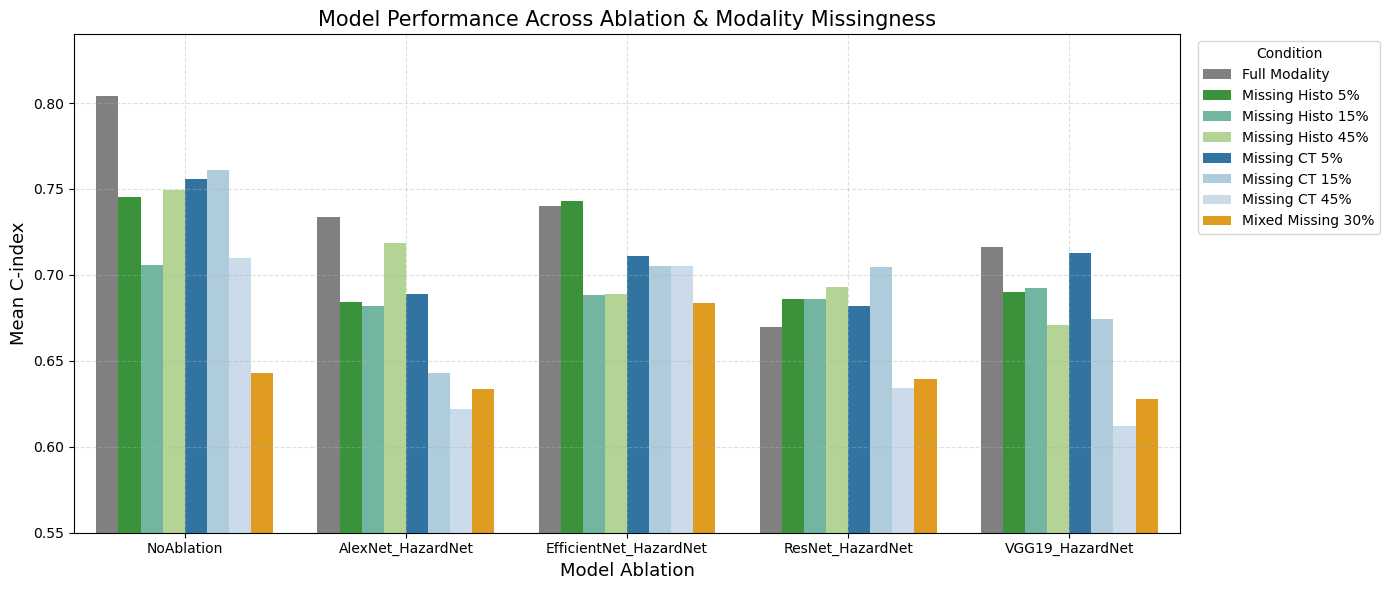

In [1]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# --- Function to process result JSON ---
def process_result_file(file_path, model_name, condition):
    try:
        with open(file_path) as f:
            data = json.load(f)
        cindex_values = [fold['best_metrics']['val_cindex'] for fold in data['fold_results']]
        return {
            'Model': model_name,
            'Condition': condition,
            'Mean': data['mean_metrics']['val_cindex'],
        }
    except Exception as e:
        print(f"Error loading {file_path}: {e}")
        return None

# --- Define model groups and their paths ---
model_groups = {
    "NoAblation": {
        "base": "./models/ckpts/CPTACPDA_medimsight_titan_CTOnly_NEWMODEL2.6Skip/cv_results.json",
        "histomissing5": "./models/ckpts/CPTACPDA_medimsights_titan_wsimissing_nvals05_NEWMODEL2.6Skip/cv_results.json",
        "histomissing15": "./models/ckpts/CPTACPDA_medimsights_titan_wsimissing_nvals15_NEWMODEL2.6Skip/cv_results.json",
        "histomissing45": "./models/ckpts/CPTACPDA_medimsights_titan_wsimissing_nvals45_NEWMODEL2.6Skip/cv_results.json",
        "ctmissing5":  "./models/ckpts/CPTACPDA_medimsights_titan_ctmissing_nvals05_NEWMODEL2.6Skip/cv_results.json",
        "ctmissing15": "./models/ckpts/CPTACPDA_medimsights_titan_ctmissing_nvals15_NEWMODEL2.6Skip/cv_results.json",
        "ctmissing45": "./models/ckpts/CPTACPDA_medimsights_titan_ctmissing_nvals45_NEWMODEL2.6Skip/cv_results.json",
        "mixedmissing":  "./models/ckpts/CPTACPDA_medimsight_titan_CTOnly_NEWMODEL2.6Skip_bothmissing30/cv_results.json"
    },
    "AlexNet_HazardNet": {
        "base": "./models/ckpts/CPTACPDA_medimsight_titan_CTOnly_NEWMODEL2.6Skip_alexnetclass/cv_results.json",
        "ctmissing5": "./models/ckpts/CPTACPDA_medimsight_titan_CTOnly_NEWMODEL2.6Skip_alexnetclass_ctmissing5/cv_results.json",
        "ctmissing15": "./models/ckpts/CPTACPDA_medimsight_titan_CTOnly_NEWMODEL2.6Skip_alexnetclass_ctmissing15/cv_results.json",
        "ctmissing45": "./models/ckpts/CPTACPDA_medimsight_titan_CTOnly_NEWMODEL2.6Skip_alexnetclass_ctmissing45/cv_results.json",
        "histomissing5":  "./models/ckpts/CPTACPDA_medimsight_titan_CTOnly_NEWMODEL2.6Skip_alexnetclass_histomissing5/cv_results.json",
        "histomissing15": "./models/ckpts/CPTACPDA_medimsight_titan_CTOnly_NEWMODEL2.6Skip_alexnetclass_histomissing15/cv_results.json",
        "histomissing45": "./models/ckpts/CPTACPDA_medimsight_titan_CTOnly_NEWMODEL2.6Skip_alexnetclass_histomissing45/cv_results.json",
        "mixedmissing":  "./models/ckpts/CPTACPDA_medimsight_titan_CTOnly_NEWMODEL2.6Skip_alexnetclass_bothmissing30/cv_results.json"
    },
    "EfficientNet_HazardNet": {
        "base": "./models/ckpts/CPTACPDA_medimsight_titan_CTOnly_NEWMODEL2.6Skip_efficientnetclass/cv_results.json",
        "histomissing5": "./models/ckpts/CPTACPDA_medimsight_titan_CTOnly_NEWMODEL2.6Skip_GCScontroller_histomissing5/cv_results.json",
        "histomissing15": "./models/ckpts/CPTACPDA_medimsight_titan_CTOnly_NEWMODEL2.6Skip_GCScontroller_histomissing15/cv_results.json",
        "histomissing45": "./models/ckpts/CPTACPDA_medimsight_titan_CTOnly_NEWMODEL2.6Skip_GCScontroller_histomissing45/cv_results.json",
        "ctmissing5":  "./models/ckpts/CPTACPDA_medimsight_titan_CTOnly_NEWMODEL2.6Skip_efficientnetclass_ctmissing5/cv_results.json",
        "ctmissing15": "./models/ckpts/CPTACPDA_medimsight_titan_CTOnly_NEWMODEL2.6Skip_efficientnetclass_ctmissing15/cv_results.json",
        "ctmissing45": "./models/ckpts/CPTACPDA_medimsight_titan_CTOnly_NEWMODEL2.6Skip_efficientnetclass_ctmissing45/cv_results.json",
        "mixedmissing":  "./models/ckpts/CPTACPDA_medimsight_titan_CTOnly_NEWMODEL2.6Skip_GCScontroller_bothmissing30/cv_results.json"
    },
    "ResNet_HazardNet": {
        "base": "./models/ckpts/CPTACPDA_medimsight_titan_CTOnly_NEWMODEL2.6Skip_resnet18class/cv_results.json",
        "histomissing5": "./models/ckpts/CPTACPDA_medimsight_titan_CTOnly_NEWMODEL2.6Skip_resnet18class_histomissing5/cv_results.json",
        "histomissing15": "./models/ckpts/CPTACPDA_medimsight_titan_CTOnly_NEWMODEL2.6Skip_resnet18class_histomissing15/cv_results.json",
        "histomissing45": "./models/ckpts/CPTACPDA_medimsight_titan_CTOnly_NEWMODEL2.6Skip_resnet18class_histomissing45/cv_results.json",
        "ctmissing5":  "./models/ckpts/CPTACPDA_medimsight_titan_CTOnly_NEWMODEL2.6Skip_resnet18class_ctmissing5/cv_results.json",
        "ctmissing15": "./models/ckpts/CPTACPDA_medimsight_titan_CTOnly_NEWMODEL2.6Skip_resnet18class_ctmissing15/cv_results.json",
        "ctmissing45": "./models/ckpts/CPTACPDA_medimsight_titan_CTOnly_NEWMODEL2.6Skip_resnet18class_ctmissing45/cv_results.json",
        "mixedmissing": "./models/ckpts/CPTACPDA_medimsight_titan_CTOnly_NEWMODEL2.6Skip_resnet18class_bothmissing30/cv_results.json"
    },
    "VGG19_HazardNet": {
        "base": "./models/ckpts/CPTACPDA_medimsight_titan_CTOnly_NEWMODEL2.6Skip_vgg19class/cv_results.json",
        "histomissing5": "./models/ckpts/CPTACPDA_medimsight_titan_CTOnly_NEWMODEL2.6Skip_vgg19class_histomissing5/cv_results.json",
        "histomissing15": "./models/ckpts/CPTACPDA_medimsight_titan_CTOnly_NEWMODEL2.6Skip_vgg19class_histomissing15/cv_results.json",
        "histomissing45": "./models/ckpts/CPTACPDA_medimsight_titan_CTOnly_NEWMODEL2.6Skip_vgg19class_histomissing45/cv_results.json",
        "ctmissing5": "./models/ckpts/CPTACPDA_medimsight_titan_CTOnly_NEWMODEL2.6Skip_vgg19class_ctmissing5/cv_results.json",
        "ctmissing15": "./models/ckpts/CPTACPDA_medimsight_titan_CTOnly_NEWMODEL2.6Skip_vgg19class_ctmissing15/cv_results.json",
        "ctmissing45": "./models/ckpts/CPTACPDA_medimsight_titan_CTOnly_NEWMODEL2.6Skip_vgg19class_ctmissing45/cv_results.json",
        "mixedmissing": "./models/ckpts/CPTACPDA_medimsight_titan_CTOnly_NEWMODEL2.6Skip_vgg19class_bothmissing30/cv_results.json"
    }
}

# --- Load all results ---
all_results = []

for model_type, paths in model_groups.items():
    for config_key, file_path in paths.items():
        if not os.path.exists(file_path):
            continue
        if config_key == "base":
            condition = "Full Modality"
        elif "histomissing" in config_key:
            pct = config_key.replace("histomissing", "")
            condition = f"Missing Histo {pct}%"
        elif "ctmissing" in config_key:
            pct = config_key.replace("ctmissing", "")
            condition = f"Missing CT {pct}%"
        elif "mixedmissing" in config_key:
            condition = "Mixed Missing 30%"
        else:
            condition = config_key
        result = process_result_file(file_path, model_type, condition)
        if result:
            all_results.append(result)

df = pd.DataFrame(all_results)

# --- Define color palette by condition type ---
palette = {
    "Full Modality": "gray",
    "Missing Histo 5%": "#2ca02c",
    "Missing Histo 15%": "#66c2a5",
    "Missing Histo 45%": "#b2df8a",
    "Missing CT 5%": "#1f77b4",
    "Missing CT 15%": "#a6cee3",
    "Missing CT 45%": "#c6dbef",
    "Mixed Missing 30%": "orange"
}

# --- Plotting Barplot ---
plt.figure(figsize=(14, 6))
sns.barplot(
    data=df,
    x="Model",
    y="Mean",
    hue="Condition",
    palette=palette
)

plt.ylabel("Mean C-index", fontsize=13)
plt.xlabel("Model Ablation", fontsize=13)
plt.title("Model Performance Across Ablation & Modality Missingness", fontsize=15)
plt.grid(True, linestyle='--', alpha=0.4)
plt.ylim(0.55, 0.84)
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left', title="Condition")
plt.tight_layout()
plt.savefig("barplot_ablation_cindex.png", dpi=300)
plt.show()


# CHIEF Plots

/tmp/ipykernel_827172/1277254018.py:44: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(checkpoint_path)
/tmp/ipykernel_827172/1277254018.py:98: Future

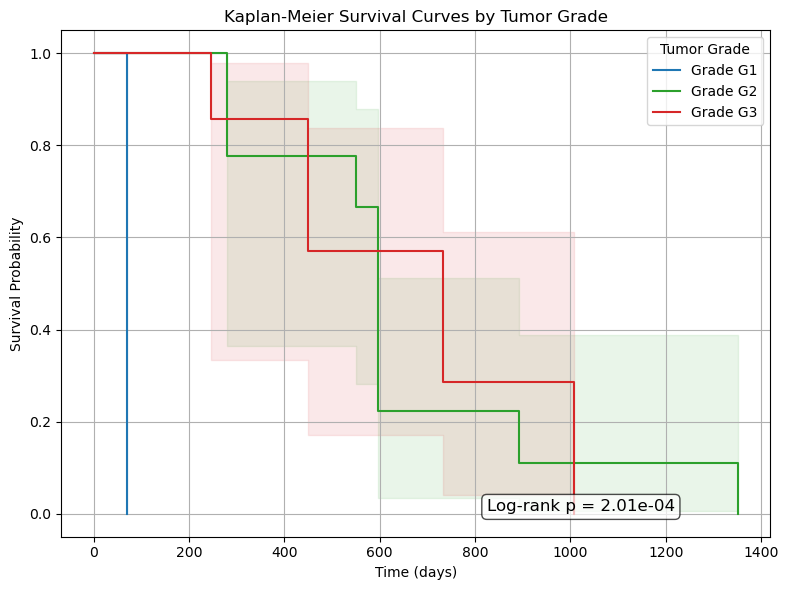

/home/users/pietro.caforio/anaconda3/envs/research_biocv_proj/lib/python3.9/site-packages/lifelines/utils/__init__.py:1185: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)
/home/users/pietro.caforio/anaconda3/envs/research_biocv_proj/lib/python3.9/site-packages/lifelines/utils/__init__.py:1185: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)
/home/users/pietro.caforio/anaconda3/envs/research_biocv_proj/lib/python3.9/site-packages/lifelines/utils/__init__.py:1185: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do con

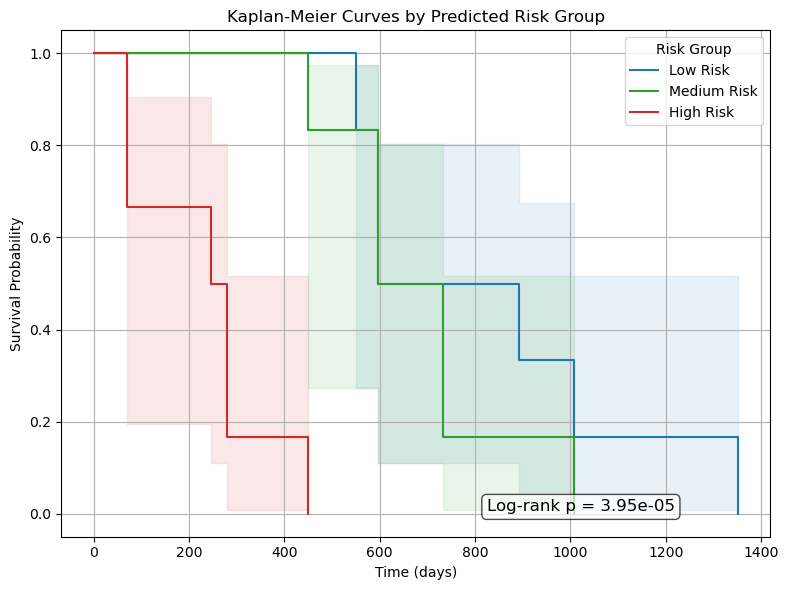

/tmp/ipykernel_827172/1277254018.py:206: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="tumor_grade", y="hazard", palette=custom_palette, order = ["G1", "G2", "G3"])


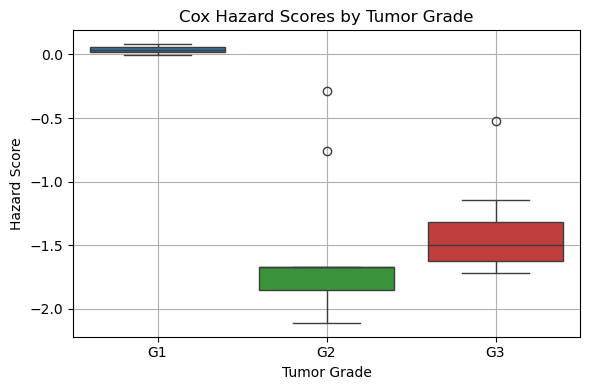

In [7]:
import random
import numpy as np
import torch
SEED = 0

def set_global_seed(seed=SEED):
    """
    Set a global seed for reproducibility across different libraries and random number generators.
    
    Args:
        seed (int): Seed value to be used
    """
    # Python's built-in random module
    random.seed(seed)
    
    # Numpy
    np.random.seed(seed)
    
    # PyTorch
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)  # For multi-GPU setups
    
    # Configure PyTorch to make computations deterministic
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
import torch
from models.dpe.main_model_nobackbone_surv import MADPENetNoBackbonesSurv
# Kaplan Meier sulle previsioni in base a grado del tumore


# Penso che devo fare il loading del checkpoint the miglior modello (sul miglior fold)
# -> Scelgo titan su ct-only fold 1
set_global_seed()
"""Load training checkpoint."""
model = MADPENetNoBackbonesSurv(
            rad_input_dim = 1024,
            histo_input_dim = 768,
            inter_dim = 256,
            token_dim = 128,
            dim_hider=256
        )
checkpoint_path = "models/ckpts/CPTACPDA_chief_medimsights_CTOnly/fold_1/CPTACPDA_chief_medimsights_CTOnly_fold_1/CPTACPDA_chief_medimsights_CTOnly_fold_1_best.pth"
checkpoint = torch.load(checkpoint_path)
model.load_state_dict(checkpoint["model_state_dict"])


# Trovare i tumor grade per sample del test del fold scelto
# Calcolare gli hazard score previsti su ogni sotto gruppo
# Fare questa conversione degli hazard score sul tempo tipo aiuto
# Calcolare le kaplan meier su ogni sottogruppo del test

# Trovare i tumor grade per sample del test del fold scelto
from data.multimodal_features_surv import MultimodalCTWSIDatasetSurv
from torch.utils.data import DataLoader

# Calcolare gli hazard score previsti su ogni sotto gruppo
test_dataset = MultimodalCTWSIDatasetSurv(
            fold = 1,
            split = "test",
            ct_path= "../MedImageInsights/embeddings_output_cptacpda_93",
            wsi_path= "../../chiefCPTACPDA/10x_256px_0px_overlap/slide_features_chief/",
            labels_splits_path= "./data/processed/processed_CPTAC_PDA_survival/k=all.tsv",
            missing_modality_prob=0.0,
            require_both_modalities=True,
            pairing_mode="one_to_one",
            allow_repeats=True,
            pairs_per_patient= None           
        )


test_loader = DataLoader(
    test_dataset,
    batch_size=1,
    shuffle=False,
    num_workers=0,
    pin_memory=True,
    # collate_fn=MultimodalCTWSIDataset.collate_fn
)


#Let's try to plot kaplan meier curves of the test set, given the grades
import pandas as pd
labels = pd.read_csv("data/metadata_annotations/clinical_annotations.tsv", sep="\t")
df = pd.DataFrame(columns= ["patient_id", "hazard", "tumor_grade", "censor", "survtime"])
model.eval()
for batch in test_loader:
    #print(batch.keys())
    row = labels[labels["case_submitter_id"] == batch["patient_id"][0]]
    entry = pd.DataFrame.from_dict({
        "patient_id": [batch["patient_id"][0]],
        "hazard": [model(batch["ct_feature"],batch["wsi_feature"],batch["modality_mask"])["hazard"][0][0].item()],
        "tumor_grade": [row["tumor_grade"].values[0]],
        "survtime": [batch["survtime"][0].item()],
        "censor": [batch["censor"][0].item()]
    })
    
    df = pd.concat([df, entry], ignore_index=True)
    #print(batch["patient_id"][0], model(batch["ct_feature"],batch["wsi_feature"],batch["modality_mask"])["hazard"], labels[labels["case_submitter_id"] == batch["patient_id"][0]]["tumor_grade"].values[0])
# Fare questa conversione degli hazard score sul tempo tipo aiuto

# Calcolare le kaplan meier su ogni sottogruppo del test
#df
#avg_hazard = df.groupby("patient_id")["hazard"].transform("mean")
#df["hazard"] = avg_hazard
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt
from lifelines.statistics import multivariate_logrank_test
# Initialize the KM fitter
kmf = KaplanMeierFitter()

# Set up the figure
plt.figure(figsize=(8, 6))

# Define the grades to loop through
grades = ["G1", "G2", "G3"]
colors = ["tab:blue", "tab:green", "tab:red"]  # Optional: specify colors

# Loop through each grade
for grade, color in zip(grades, colors):
    df_grade = df[df["tumor_grade"] == grade]
    kmf.fit(df_grade["survtime"], event_observed=~df_grade["censor"], label=f"Grade {grade}")
    kmf.plot(ci_show=True, ci_alpha = 0.1, color=color)  # ci_show=False to hide confidence intervals

# Perform multivariate log-rank test across all 3 tumor_grade groups
results_risk = multivariate_logrank_test(
    df["survtime"], 
    df["tumor_grade"], 
    event_observed=~df["censor"]
)

# Extract the p-value to display on the plot
p_value = results_risk.p_value
# Annotate p-value on the plot
plt.text(
    0.6, 0.05,  # Adjust coordinates as needed
    f"Log-rank p = {p_value:.2e}",
    transform=plt.gca().transAxes,
    fontsize=12,
    bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.7)
)

# Customize the plot
plt.title("Kaplan-Meier Survival Curves by Tumor Grade")
plt.xlabel("Time (days)")
plt.ylabel("Survival Probability")
plt.grid(True)
plt.legend(title="Tumor Grade")
plt.tight_layout()
plt.savefig("kaplan-meier_cptacpda_all_grades.png", dpi=300)
plt.show()

import pandas as pd
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter

# Define tertile thresholds
df["risk_group"] = pd.qcut(df["hazard"], q=3, labels=["Low Risk", "Medium Risk", "High Risk"])

# Plot KM curves for each risk group
kmf = KaplanMeierFitter()
plt.figure(figsize=(8, 6))

for group, color in zip(["Low Risk", "Medium Risk", "High Risk"], ["tab:blue", "tab:green", "tab:red"]):
    group_df = df[df["risk_group"] == group]
    kmf.fit(group_df["survtime"], event_observed=~group_df["censor"], label=group)
    kmf.plot(ci_show=True, ci_alpha = 0.1, color=color)


# Perform multivariate log-rank test across all 3 risk groups
results_risk = multivariate_logrank_test(
    df["survtime"], 
    df["risk_group"], 
    event_observed=~df["censor"]
)

# Extract the p-value to display on the plot
p_value = results_risk.p_value
# Annotate p-value on the plot
plt.text(
    0.6, 0.05,  # Adjust coordinates as needed
    f"Log-rank p = {p_value:.2e}",
    transform=plt.gca().transAxes,
    fontsize=12,
    bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.7)
)

plt.title("Kaplan-Meier Curves by Predicted Risk Group")
plt.xlabel("Time (days)")
plt.ylabel("Survival Probability")
plt.grid(True)
plt.legend(title="Risk Group")
plt.tight_layout()
plt.savefig("km_by_hazard_risk_groups.png", dpi=300)
plt.show()

df
df.groupby("tumor_grade")["hazard"].describe()
import seaborn as sns
custom_palette = {
    "G1": "tab:blue",
    "G2": "tab:green",
    "G3": "tab:red"
}
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x="tumor_grade", y="hazard", palette=custom_palette, order = ["G1", "G2", "G3"])
plt.title("Cox Hazard Scores by Tumor Grade")
plt.ylabel("Hazard Score")
plt.xlabel("Tumor Grade")
plt.grid(True)
plt.tight_layout()
plt.savefig("hazard_by_grade.png", dpi=300)
plt.show()


# TITAN plots

/tmp/ipykernel_827172/3426554535.py:35: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(checkpoint_path)
/tmp/ipykernel_827172/3426554535.py:82: Future

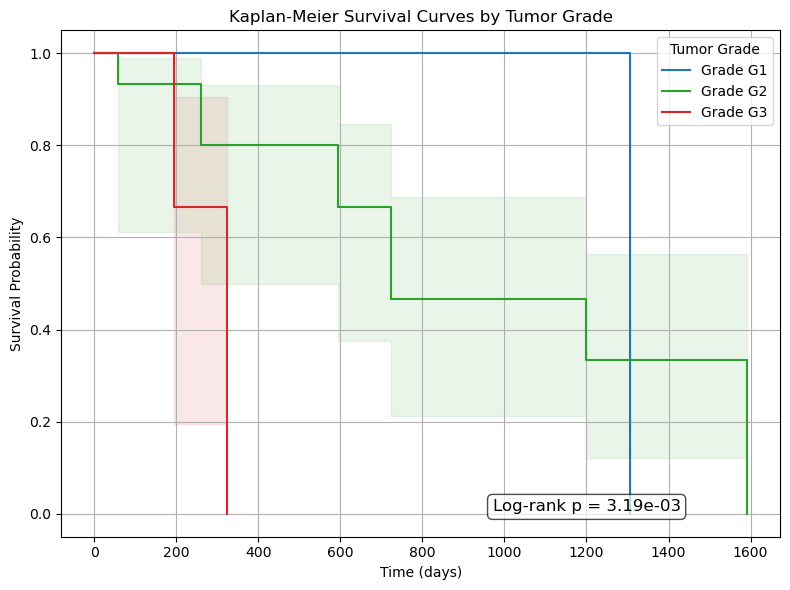

/home/users/pietro.caforio/anaconda3/envs/research_biocv_proj/lib/python3.9/site-packages/lifelines/utils/__init__.py:1185: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)
/home/users/pietro.caforio/anaconda3/envs/research_biocv_proj/lib/python3.9/site-packages/lifelines/utils/__init__.py:1185: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)
/home/users/pietro.caforio/anaconda3/envs/research_biocv_proj/lib/python3.9/site-packages/lifelines/utils/__init__.py:1185: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do con

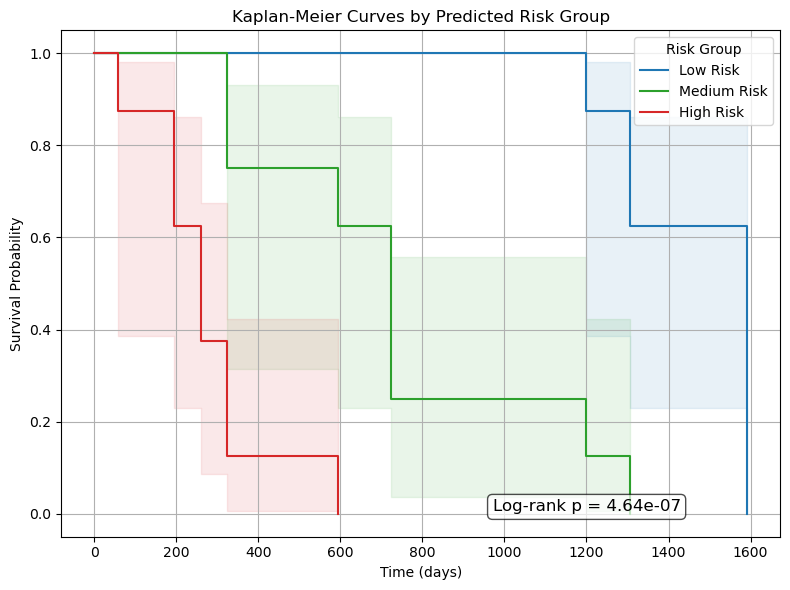

/tmp/ipykernel_827172/3426554535.py:190: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="tumor_grade", y="hazard", palette=custom_palette, order = ["G1", "G2", "G3"])


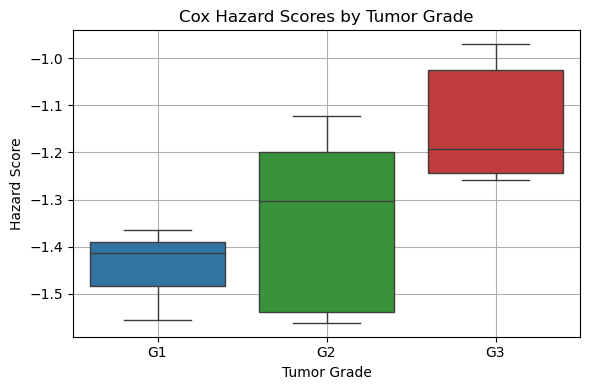

In [5]:
import random
import numpy as np
SEED = 0

def set_global_seed(seed=SEED):
    """
    Set a global seed for reproducibility across different libraries and random number generators.
    
    Args:
        seed (int): Seed value to be used
    """
    # Python's built-in random module
    random.seed(seed)
    
    # Numpy
    np.random.seed(seed)
    
    # PyTorch
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)  # For multi-GPU setups
    
    # Configure PyTorch to make computations deterministic
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
set_global_seed()
model = MADPENetNoBackbonesSurv(
            rad_input_dim = 1024,
            histo_input_dim = 768,
            inter_dim = 256,
            token_dim = 128,
            dim_hider=256
        )
checkpoint_path = "models/ckpts/CPTACPDA_Titan_MedIMSights1/fold_2/CPTACPDA_Titan_MedIMSights1_fold_2/CPTACPDA_Titan_MedIMSights1_fold_2_best.pth"
checkpoint = torch.load(checkpoint_path)
model.load_state_dict(checkpoint["model_state_dict"])
# Trovare i tumor grade per sample del test del fold scelto
from data.multimodal_features_surv import MultimodalCTWSIDatasetSurv
from torch.utils.data import DataLoader

# Calcolare gli hazard score previsti su ogni sotto gruppo
test_dataset = MultimodalCTWSIDatasetSurv(
            fold = 2,
            split = "test",
            ct_path= "../MedImageInsights/embeddings_output_cptacpda_93",
            wsi_path= "../../TitanCPTACPDA/20x_512px_0px_overlap/slide_features_titan",
            labels_splits_path= "./data/processed/processed_CPTAC_PDA_survival/k=all.tsv",
            missing_modality_prob=0.0,
            require_both_modalities=True,
            pairing_mode="one_to_one",
            allow_repeats=True,
            pairs_per_patient= None           
        )


test_loader = DataLoader(
    test_dataset,
    batch_size=1,
    shuffle=False,
    num_workers=0,
    pin_memory=True,
    # collate_fn=MultimodalCTWSIDataset.collate_fn
)


#Let's try to plot kaplan meier curves of the test set, given the grades
import pandas as pd
labels = pd.read_csv("data/metadata_annotations/clinical_annotations.tsv", sep="\t")
df = pd.DataFrame(columns= ["patient_id", "hazard", "tumor_grade", "censor", "survtime"])
model.eval()
for batch in test_loader:
    #print(batch.keys())
    row = labels[labels["case_submitter_id"] == batch["patient_id"][0]]
    entry = pd.DataFrame.from_dict({
        "patient_id": [batch["patient_id"][0]],
        "hazard": [model(batch["ct_feature"],batch["wsi_feature"],batch["modality_mask"])["hazard"][0][0].item()],
        "tumor_grade": [row["tumor_grade"].values[0]],
        "survtime": [batch["survtime"][0].item()],
        "censor": [batch["censor"][0].item()]
    })
    
    df = pd.concat([df, entry], ignore_index=True)
    #print(batch["patient_id"][0], model(batch["ct_feature"],batch["wsi_feature"],batch["modality_mask"])["hazard"], labels[labels["case_submitter_id"] == batch["patient_id"][0]]["tumor_grade"].values[0])
# Fare questa conversione degli hazard score sul tempo tipo aiuto

# Calcolare le kaplan meier su ogni sottogruppo del test
#df
#avg_hazard = df.groupby("patient_id")["hazard"].transform("mean")
#df["hazard"] = avg_hazard
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt
from lifelines.statistics import multivariate_logrank_test
# Initialize the KM fitter
kmf = KaplanMeierFitter()

# Set up the figure
plt.figure(figsize=(8, 6))

# Define the grades to loop through
grades = ["G1", "G2", "G3"]
colors = ["tab:blue", "tab:green", "tab:red"]  # Optional: specify colors

# Loop through each grade
for grade, color in zip(grades, colors):
    df_grade = df[df["tumor_grade"] == grade]
    kmf.fit(df_grade["survtime"], event_observed=~df_grade["censor"], label=f"Grade {grade}")
    kmf.plot(ci_show=True, ci_alpha = 0.1, color=color)  # ci_show=False to hide confidence intervals

# Perform multivariate log-rank test across all 3 tumor_grade groups
results_risk = multivariate_logrank_test(
    df["survtime"], 
    df["tumor_grade"], 
    event_observed=~df["censor"]
)

# Extract the p-value to display on the plot
p_value = results_risk.p_value
# Annotate p-value on the plot
plt.text(
    0.6, 0.05,  # Adjust coordinates as needed
    f"Log-rank p = {p_value:.2e}",
    transform=plt.gca().transAxes,
    fontsize=12,
    bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.7)
)

# Customize the plot
plt.title("Kaplan-Meier Survival Curves by Tumor Grade")
plt.xlabel("Time (days)")
plt.ylabel("Survival Probability")
plt.grid(True)
plt.legend(title="Tumor Grade")
plt.tight_layout()
plt.savefig("kaplan-meier_cptacpda_all_grades.png", dpi=300)
plt.show()

import pandas as pd
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter

# Define tertile thresholds
df["risk_group"] = pd.qcut(df["hazard"], q=3, labels=["Low Risk", "Medium Risk", "High Risk"])

# Plot KM curves for each risk group
kmf = KaplanMeierFitter()
plt.figure(figsize=(8, 6))

for group, color in zip(["Low Risk", "Medium Risk", "High Risk"], ["tab:blue", "tab:green", "tab:red"]):
    group_df = df[df["risk_group"] == group]
    kmf.fit(group_df["survtime"], event_observed=~group_df["censor"], label=group)
    kmf.plot(ci_show=True, ci_alpha = 0.1, color=color)


# Perform multivariate log-rank test across all 3 risk groups
results_risk = multivariate_logrank_test(
    df["survtime"], 
    df["risk_group"], 
    event_observed=~df["censor"]
)

# Extract the p-value to display on the plot
p_value = results_risk.p_value
# Annotate p-value on the plot
plt.text(
    0.6, 0.05,  # Adjust coordinates as needed
    f"Log-rank p = {p_value:.2e}",
    transform=plt.gca().transAxes,
    fontsize=12,
    bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.7)
)

plt.title("Kaplan-Meier Curves by Predicted Risk Group")
plt.xlabel("Time (days)")
plt.ylabel("Survival Probability")
plt.grid(True)
plt.legend(title="Risk Group")
plt.tight_layout()
plt.savefig("km_by_hazard_risk_groups.png", dpi=300)
plt.show()

df
df.groupby("tumor_grade")["hazard"].describe()
import seaborn as sns
custom_palette = {
    "G1": "tab:blue",
    "G2": "tab:green",
    "G3": "tab:red"
}
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x="tumor_grade", y="hazard", palette=custom_palette, order = ["G1", "G2", "G3"])
plt.title("Cox Hazard Scores by Tumor Grade")
plt.ylabel("Hazard Score")
plt.xlabel("Tumor Grade")
plt.grid(True)
plt.tight_layout()
plt.savefig("hazard_by_grade.png", dpi=300)
plt.show()

## Fold 1

/tmp/ipykernel_827172/2327653692.py:12: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(checkpoint_path)
/tmp/ipykernel_827172/2327653692.py:58: Future

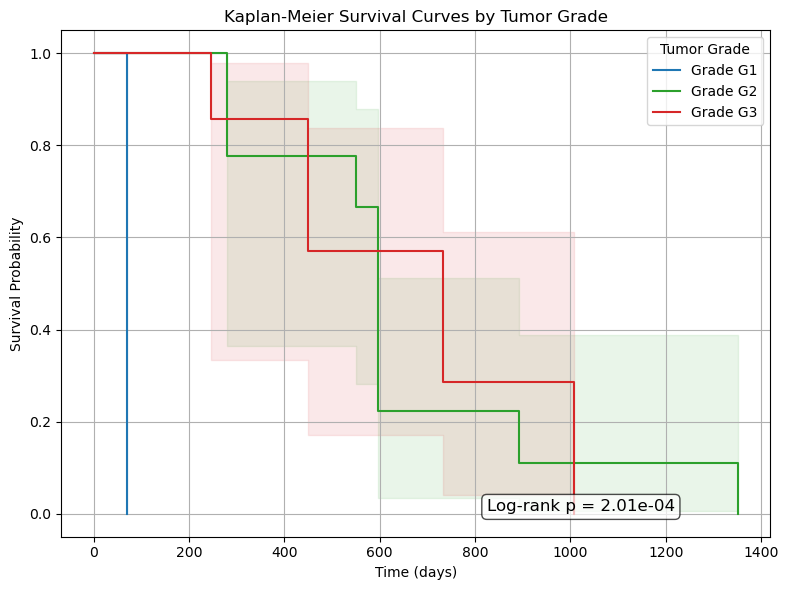

/home/users/pietro.caforio/anaconda3/envs/research_biocv_proj/lib/python3.9/site-packages/lifelines/utils/__init__.py:1185: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)
/home/users/pietro.caforio/anaconda3/envs/research_biocv_proj/lib/python3.9/site-packages/lifelines/utils/__init__.py:1185: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)
/home/users/pietro.caforio/anaconda3/envs/research_biocv_proj/lib/python3.9/site-packages/lifelines/utils/__init__.py:1185: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do con

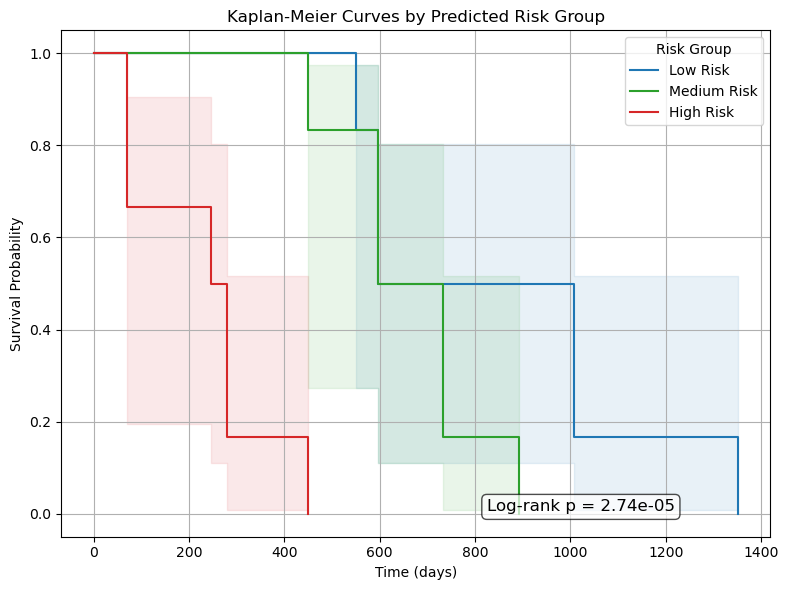

/tmp/ipykernel_827172/2327653692.py:166: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="tumor_grade", y="hazard", palette=custom_palette, order = ["G1", "G2", "G3"])


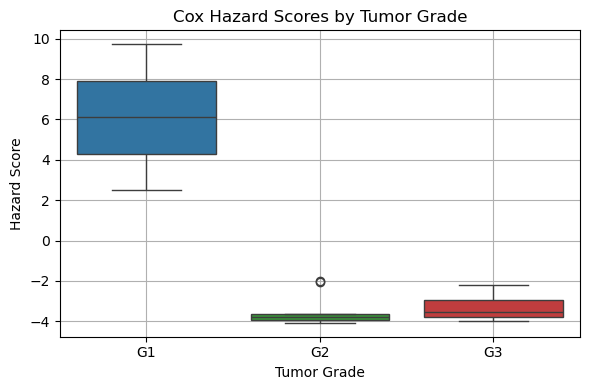

In [4]:
import torch
from models.dpe.main_model_nobackbone_surv import MADPENetNoBackbonesSurv

model = MADPENetNoBackbonesSurv(
            rad_input_dim = 1024,
            histo_input_dim = 768,
            inter_dim = 256,
            token_dim = 128,
            dim_hider=256
        )
checkpoint_path = "models/ckpts/CPTACPDA_Titan_MedIMSights1/fold_1/CPTACPDA_Titan_MedIMSights1_fold_1/CPTACPDA_Titan_MedIMSights1_fold_1_best.pth"
checkpoint = torch.load(checkpoint_path)
model.load_state_dict(checkpoint["model_state_dict"])
# Trovare i tumor grade per sample del test del fold scelto
from data.multimodal_features_surv import MultimodalCTWSIDatasetSurv
from torch.utils.data import DataLoader

# Calcolare gli hazard score previsti su ogni sotto gruppo
test_dataset = MultimodalCTWSIDatasetSurv(
            fold = 1,
            split = "test",
            ct_path= "../MedImageInsights/embeddings_output_cptacpda_93",
            wsi_path= "../../TitanCPTACPDA/20x_512px_0px_overlap/slide_features_titan",
            labels_splits_path= "./data/processed/processed_CPTAC_PDA_survival/k=all.tsv",
            missing_modality_prob=0.0,
            require_both_modalities=True,
            pairing_mode="one_to_one",
            allow_repeats=True,
            pairs_per_patient= None           
        )


test_loader = DataLoader(
    test_dataset,
    batch_size=1,
    shuffle=False,
    num_workers=0,
    pin_memory=True,
    # collate_fn=MultimodalCTWSIDataset.collate_fn
)

#Let's try to plot kaplan meier curves of the test set, given the grades
import pandas as pd
labels = pd.read_csv("data/metadata_annotations/clinical_annotations.tsv", sep="\t")
df = pd.DataFrame(columns= ["patient_id", "hazard", "tumor_grade", "censor", "survtime"])
model.eval()
for batch in test_loader:
    #print(batch.keys())
    row = labels[labels["case_submitter_id"] == batch["patient_id"][0]]
    entry = pd.DataFrame.from_dict({
        "patient_id": [batch["patient_id"][0]],
        "hazard": [model(batch["ct_feature"],batch["wsi_feature"],batch["modality_mask"])["hazard"][0][0].item()],
        "tumor_grade": [row["tumor_grade"].values[0]],
        "survtime": [batch["survtime"][0].item()],
        "censor": [batch["censor"][0].item()]
    })
    
    df = pd.concat([df, entry], ignore_index=True)
    #print(batch["patient_id"][0], model(batch["ct_feature"],batch["wsi_feature"],batch["modality_mask"])["hazard"], labels[labels["case_submitter_id"] == batch["patient_id"][0]]["tumor_grade"].values[0])
# Fare questa conversione degli hazard score sul tempo tipo aiuto

# Calcolare le kaplan meier su ogni sottogruppo del test
#df
#avg_hazard = df.groupby("patient_id")["hazard"].transform("mean")
#df["hazard"] = avg_hazard
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt
from lifelines.statistics import multivariate_logrank_test
# Initialize the KM fitter
kmf = KaplanMeierFitter()

# Set up the figure
plt.figure(figsize=(8, 6))

# Define the grades to loop through
grades = ["G1", "G2", "G3"]
colors = ["tab:blue", "tab:green", "tab:red"]  # Optional: specify colors

# Loop through each grade
for grade, color in zip(grades, colors):
    df_grade = df[df["tumor_grade"] == grade]
    kmf.fit(df_grade["survtime"], event_observed=~df_grade["censor"], label=f"Grade {grade}")
    kmf.plot(ci_show=True, ci_alpha = 0.1, color=color)  # ci_show=False to hide confidence intervals

# Perform multivariate log-rank test across all 3 tumor_grade groups
results_risk = multivariate_logrank_test(
    df["survtime"], 
    df["tumor_grade"], 
    event_observed=~df["censor"]
)

# Extract the p-value to display on the plot
p_value = results_risk.p_value
# Annotate p-value on the plot
plt.text(
    0.6, 0.05,  # Adjust coordinates as needed
    f"Log-rank p = {p_value:.2e}",
    transform=plt.gca().transAxes,
    fontsize=12,
    bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.7)
)

# Customize the plot
plt.title("Kaplan-Meier Survival Curves by Tumor Grade")
plt.xlabel("Time (days)")
plt.ylabel("Survival Probability")
plt.grid(True)
plt.legend(title="Tumor Grade")
plt.tight_layout()
plt.savefig("kaplan-meier_cptacpda_all_grades.png", dpi=300)
plt.show()

import pandas as pd
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter

# Define tertile thresholds
df["risk_group"] = pd.qcut(df["hazard"], q=3, labels=["Low Risk", "Medium Risk", "High Risk"])

# Plot KM curves for each risk group
kmf = KaplanMeierFitter()
plt.figure(figsize=(8, 6))

for group, color in zip(["Low Risk", "Medium Risk", "High Risk"], ["tab:blue", "tab:green", "tab:red"]):
    group_df = df[df["risk_group"] == group]
    kmf.fit(group_df["survtime"], event_observed=~group_df["censor"], label=group)
    kmf.plot(ci_show=True, ci_alpha = 0.1, color=color)


# Perform multivariate log-rank test across all 3 risk groups
results_risk = multivariate_logrank_test(
    df["survtime"], 
    df["risk_group"], 
    event_observed=~df["censor"]
)

# Extract the p-value to display on the plot
p_value = results_risk.p_value
# Annotate p-value on the plot
plt.text(
    0.6, 0.05,  # Adjust coordinates as needed
    f"Log-rank p = {p_value:.2e}",
    transform=plt.gca().transAxes,
    fontsize=12,
    bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.7)
)

plt.title("Kaplan-Meier Curves by Predicted Risk Group")
plt.xlabel("Time (days)")
plt.ylabel("Survival Probability")
plt.grid(True)
plt.legend(title="Risk Group")
plt.tight_layout()
plt.savefig("km_by_hazard_risk_groups.png", dpi=300)
plt.show()

df
df.groupby("tumor_grade")["hazard"].describe()
import seaborn as sns
custom_palette = {
    "G1": "tab:blue",
    "G2": "tab:green",
    "G3": "tab:red"
}
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x="tumor_grade", y="hazard", palette=custom_palette, order = ["G1", "G2", "G3"])
plt.title("Cox Hazard Scores by Tumor Grade")
plt.ylabel("Hazard Score")
plt.xlabel("Tumor Grade")
plt.grid(True)
plt.tight_layout()
plt.savefig("hazard_by_grade.png", dpi=300)
plt.show()


# Madeleine Plots

/tmp/ipykernel_827172/2483674839.py:44: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(checkpoint_path)
/tmp/ipykernel_827172/2483674839.py:98: Future

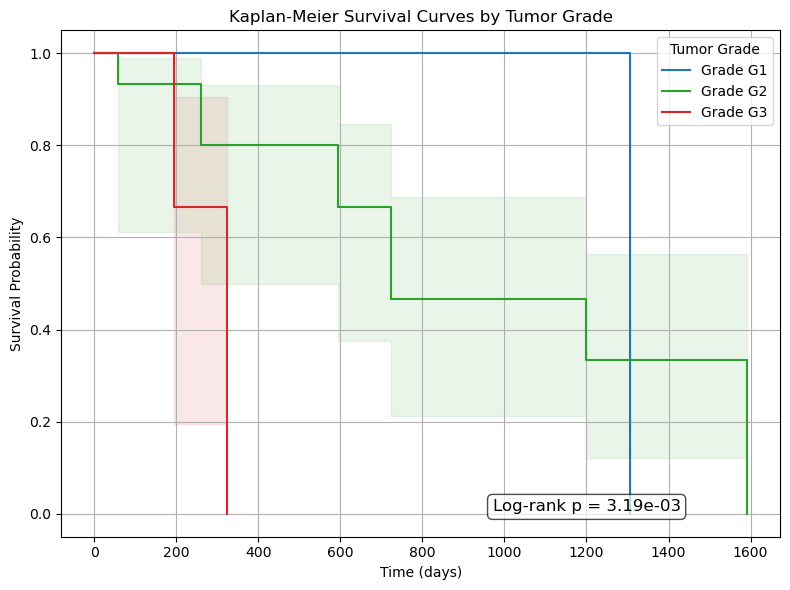

/home/users/pietro.caforio/anaconda3/envs/research_biocv_proj/lib/python3.9/site-packages/lifelines/utils/__init__.py:1185: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)
/home/users/pietro.caforio/anaconda3/envs/research_biocv_proj/lib/python3.9/site-packages/lifelines/utils/__init__.py:1185: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)
/home/users/pietro.caforio/anaconda3/envs/research_biocv_proj/lib/python3.9/site-packages/lifelines/utils/__init__.py:1185: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do con

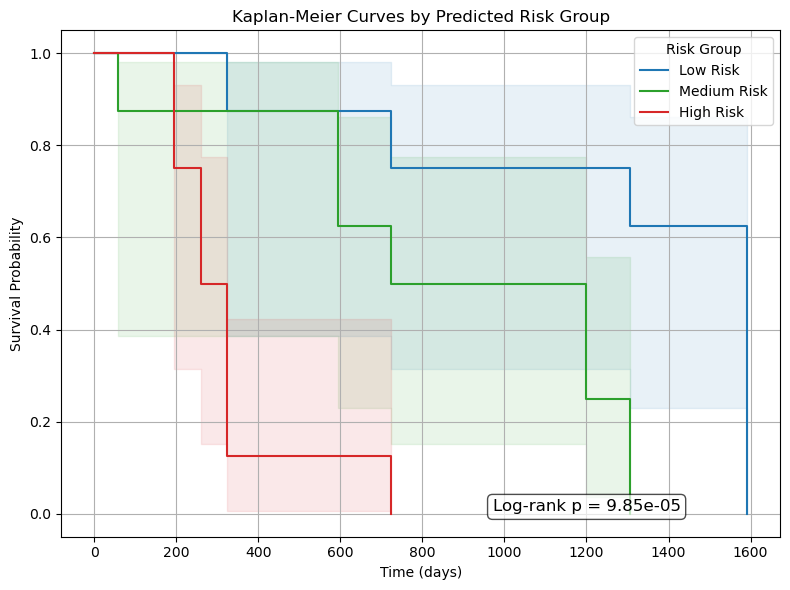

/tmp/ipykernel_827172/2483674839.py:206: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="tumor_grade", y="hazard", palette=custom_palette, order = ["G1", "G2", "G3"])


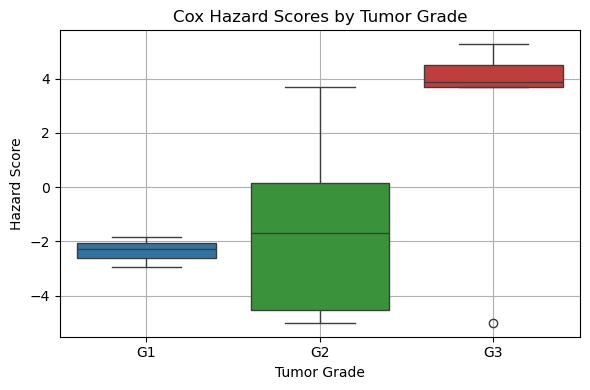

In [6]:

import random
import numpy as np
import torch
SEED = 0

def set_global_seed(seed=SEED):
    """
    Set a global seed for reproducibility across different libraries and random number generators.
    
    Args:
        seed (int): Seed value to be used
    """
    # Python's built-in random module
    random.seed(seed)
    
    # Numpy
    np.random.seed(seed)
    
    # PyTorch
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)  # For multi-GPU setups
    
    # Configure PyTorch to make computations deterministic
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
import torch
from models.dpe.main_model_nobackbone_surv import MADPENetNoBackbonesSurv
# Kaplan Meier sulle previsioni in base a grado del tumore


# Penso che devo fare il loading del checkpoint the miglior modello (sul miglior fold)
# -> Scelgo titan su ct-only fold 1
set_global_seed()
"""Load training checkpoint."""
model = MADPENetNoBackbonesSurv(
            rad_input_dim = 1024,
            histo_input_dim = 512,
            inter_dim = 256,
            token_dim = 128,
            dim_hider=256
        )
checkpoint_path = "models/ckpts/CPTACPDA_madeleine_medimsights_ctpathobench/fold_2/CPTACPDA_madeleine_medimsights_ctpathobench_fold_2/CPTACPDA_madeleine_medimsights_ctpathobench_fold_2_best.pth"
checkpoint = torch.load(checkpoint_path)
model.load_state_dict(checkpoint["model_state_dict"])


# Trovare i tumor grade per sample del test del fold scelto
# Calcolare gli hazard score previsti su ogni sotto gruppo
# Fare questa conversione degli hazard score sul tempo tipo aiuto
# Calcolare le kaplan meier su ogni sottogruppo del test

# Trovare i tumor grade per sample del test del fold scelto
from data.multimodal_features_surv import MultimodalCTWSIDatasetSurv
from torch.utils.data import DataLoader

# Calcolare gli hazard score previsti su ogni sotto gruppo
test_dataset = MultimodalCTWSIDatasetSurv(
            fold = 2,
            split = "test",
            ct_path= "../MedImageInsights/embeddings_output_cptacpda_93",
            wsi_path= "../trident/trident_processed/10x_256px_0px_overlap/slide_features_madeleine",
            labels_splits_path= "./data/processed/processed_CPTAC_PDA_survival/k=all.tsv",
            missing_modality_prob=0.0,
            require_both_modalities=True,
            pairing_mode="one_to_one",
            allow_repeats=True,
            pairs_per_patient= None           
        )


test_loader = DataLoader(
    test_dataset,
    batch_size=1,
    shuffle=False,
    num_workers=0,
    pin_memory=True,
    # collate_fn=MultimodalCTWSIDataset.collate_fn
)


#Let's try to plot kaplan meier curves of the test set, given the grades
import pandas as pd
labels = pd.read_csv("data/metadata_annotations/clinical_annotations.tsv", sep="\t")
df = pd.DataFrame(columns= ["patient_id", "hazard", "tumor_grade", "censor", "survtime"])
model.eval()
for batch in test_loader:
    #print(batch.keys())
    row = labels[labels["case_submitter_id"] == batch["patient_id"][0]]
    entry = pd.DataFrame.from_dict({
        "patient_id": [batch["patient_id"][0]],
        "hazard": [model(batch["ct_feature"],batch["wsi_feature"],batch["modality_mask"])["hazard"][0][0].item()],
        "tumor_grade": [row["tumor_grade"].values[0]],
        "survtime": [batch["survtime"][0].item()],
        "censor": [batch["censor"][0].item()]
    })
    
    df = pd.concat([df, entry], ignore_index=True)
    #print(batch["patient_id"][0], model(batch["ct_feature"],batch["wsi_feature"],batch["modality_mask"])["hazard"], labels[labels["case_submitter_id"] == batch["patient_id"][0]]["tumor_grade"].values[0])
# Fare questa conversione degli hazard score sul tempo tipo aiuto

# Calcolare le kaplan meier su ogni sottogruppo del test
#df
#avg_hazard = df.groupby("patient_id")["hazard"].transform("mean")
#df["hazard"] = avg_hazard
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt
from lifelines.statistics import multivariate_logrank_test
# Initialize the KM fitter
kmf = KaplanMeierFitter()

# Set up the figure
plt.figure(figsize=(8, 6))

# Define the grades to loop through
grades = ["G1", "G2", "G3"]
colors = ["tab:blue", "tab:green", "tab:red"]  # Optional: specify colors

# Loop through each grade
for grade, color in zip(grades, colors):
    df_grade = df[df["tumor_grade"] == grade]
    kmf.fit(df_grade["survtime"], event_observed=~df_grade["censor"], label=f"Grade {grade}")
    kmf.plot(ci_show=True, ci_alpha = 0.1, color=color)  # ci_show=False to hide confidence intervals

# Perform multivariate log-rank test across all 3 tumor_grade groups
results_risk = multivariate_logrank_test(
    df["survtime"], 
    df["tumor_grade"], 
    event_observed=~df["censor"]
)

# Extract the p-value to display on the plot
p_value = results_risk.p_value
# Annotate p-value on the plot
plt.text(
    0.6, 0.05,  # Adjust coordinates as needed
    f"Log-rank p = {p_value:.2e}",
    transform=plt.gca().transAxes,
    fontsize=12,
    bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.7)
)

# Customize the plot
plt.title("Kaplan-Meier Survival Curves by Tumor Grade")
plt.xlabel("Time (days)")
plt.ylabel("Survival Probability")
plt.grid(True)
plt.legend(title="Tumor Grade")
plt.tight_layout()
plt.savefig("kaplan-meier_cptacpda_all_grades.png", dpi=300)
plt.show()

import pandas as pd
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter

# Define tertile thresholds
df["risk_group"] = pd.qcut(df["hazard"], q=3, labels=["Low Risk", "Medium Risk", "High Risk"])

# Plot KM curves for each risk group
kmf = KaplanMeierFitter()
plt.figure(figsize=(8, 6))

for group, color in zip(["Low Risk", "Medium Risk", "High Risk"], ["tab:blue", "tab:green", "tab:red"]):
    group_df = df[df["risk_group"] == group]
    kmf.fit(group_df["survtime"], event_observed=~group_df["censor"], label=group)
    kmf.plot(ci_show=True, ci_alpha = 0.1, color=color)


# Perform multivariate log-rank test across all 3 risk groups
results_risk = multivariate_logrank_test(
    df["survtime"], 
    df["risk_group"], 
    event_observed=~df["censor"]
)

# Extract the p-value to display on the plot
p_value = results_risk.p_value
# Annotate p-value on the plot
plt.text(
    0.6, 0.05,  # Adjust coordinates as needed
    f"Log-rank p = {p_value:.2e}",
    transform=plt.gca().transAxes,
    fontsize=12,
    bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.7)
)

plt.title("Kaplan-Meier Curves by Predicted Risk Group")
plt.xlabel("Time (days)")
plt.ylabel("Survival Probability")
plt.grid(True)
plt.legend(title="Risk Group")
plt.tight_layout()
plt.savefig("km_by_hazard_risk_groups.png", dpi=300)
plt.show()

df
df.groupby("tumor_grade")["hazard"].describe()
import seaborn as sns
custom_palette = {
    "G1": "tab:blue",
    "G2": "tab:green",
    "G3": "tab:red"
}
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x="tumor_grade", y="hazard", palette=custom_palette, order = ["G1", "G2", "G3"])
plt.title("Cox Hazard Scores by Tumor Grade")
plt.ylabel("Hazard Score")
plt.xlabel("Tumor Grade")
plt.grid(True)
plt.tight_layout()
plt.savefig("hazard_by_grade.png", dpi=300)
plt.show()
